In [1]:
import pandas as pd
pd.set_option('display.max_columns', 60)
import csv

import nltk
import string
import numpy as np
import re
import json
from pathlib import Path
import re

import matplotlib.pyplot as plt
import scipy.stats as st

from master_thesis.src import utils

In [2]:
TV_path = '/home/ruecker/data/Daten_INWT/201112_dataNLP_SZ_TV/201112_TV.txt'
SZ_path = '/home/ruecker/data/Daten_INWT/201112_dataNLP_SZ_TV/201112_SZ.txt'

NOZ_path = '/home/ruecker/data/Daten_INWT/201117_dataNLP_NOZ/201117_NOZ.txt'

bonn_path = '/home/ruecker/data/Daten_INWT/201211_dataNLP_bonn/201211_bonn.txt'

In [3]:
TV = pd.read_csv(TV_path, engine='python', quoting=csv.QUOTE_ALL, escapechar = '\\', index_col = 'articleId')
SZ = pd.read_csv(SZ_path, engine='python', quoting=csv.QUOTE_ALL, escapechar = '\\', index_col = 'articleId')

NOZ = pd.read_csv(NOZ_path, engine='python', quoting=csv.QUOTE_ALL, escapechar = '\\', index_col = 'articleId')

bonn = pd.read_csv(bonn_path, engine='python', quoting=csv.QUOTE_ALL, escapechar = '\\', index_col = 'articleId')

In [4]:
TV.shape, SZ.shape, NOZ.shape, bonn.shape

((21484, 21), (32272, 21), (44004, 15), (20202, 15))

In [5]:
TV.head()

,pageviews,exits,entrances,bounces,timeOnPage,category,rubric,titelGA,text,text_ohne_einzug,titel,teaser,readTime,readTimeNum,date,titelAPAcrawling,prozentDpa,prozentVerlag,zeilen,pagePath,dpaGuid
articleId,,,,,,,,,,,,,,,,,,,,,
4862095,2207,776,836,21,43249,NaN,NaN,redaktion,Redaktion EifelE-Mail: eifel@volksfreund.de,NaN,Redaktion,Ihr Draht zur Redaktion: Wer ist Ansprechpartn...,Eine Minute,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4862097,5487,1953,1933,75,128868,NaN,NaN,redaktion,REDAKTION Mosel/Hunsrück,NaN,Kontakt : Redaktion,Ihr Draht zur Redaktion: Wer ist Ansprechpartn...,Eine Minute,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4862371,111,51,49,0,1649,NaN,NaN,sportgruppen-fuer-herz-kreislauf-patienten,"Ein Herzinfarkt muss nicht bedeuten, dass der ...",NaN,Sportgruppen für Herz-Kreislauf-Patienten,"Professor Bernd Krönig, Leiter der Herzsportgr...",2 Minuten,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4862500,210,91,91,6,2171,magazin,familie,die-moerschieder-burr-ist-der-hoehepunkt,Kempfeld/Idar-Oberstein. Alle Wege führen nich...,NaN,Die Mörschieder Burr ist der Höhepunkt,Teil 5: Von der Wildenburg nach Idar-Oberstein...,2 Minuten,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4862625,333,78,78,0,6357,archiv1234,NaN,bunte-gedanken-gegen-den-schmerz,Die Zehnjährige aus Saarburg ist eines von sec...,NaN,Bunte Gedanken gegen den Schmerz,"Neun von zehn Jugendlichen wissen, wie sich Ko...",2 Minuten,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
NOZ.head()

,pageviews,exits,entrances,bounces,timeOnPage,category,rubric,title,date,titel,prozentDpa,prozentVerlag,zeilen,pagePath,dpaGuid
articleId,,,,,,,,,,,,,,,
32,99,10,8,1,14309.0,lokales,osnabrueck,elefantenbullen-nuka-und-dinkar-kommen-nach-os...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,473,70,65,18,97618.0,lokales,bad-essen,test-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,117,60,14,2,6018.0,deutschland-und-welt,politik,2706-ein-agrar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,5874,5328,5381,1157,258306.0,lokales,osnabrueck,2906-gzw-achso,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,283,232,232,80,22915.0,lokales,osnabrueck,lo-hundefuehrerschein,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bonn.head()

,pageviews,exits,entrances,bounces,timeOnPage,category,rubric,title,date,titel,prozentDpa,prozentVerlag,zeilen,pagePath,dpaGuid
articleId,,,,,,,,,,,,,,,
1234,122123,112733,112733,104972,1945753,region,koeln-und-rheinland,corona-virus-in-koeln-zwei-verdachtsfaelle-nic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39817699,464,194,191,100,32878,bonn,stadt-bonn,gdws-in-bonn-das-macht-die-wasserstrassen-und-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39817731,120,46,44,26,8837,bonn,stadt-bonn,rhein-in-flammen-2019-bonner-rheinaue-ganz-im-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39817747,111,5,4,0,1336,fotos,events,rhein-in-flammen-2019-1_bid-39817747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39817829,264,22,4,1,5730,fotos,bilder-des-tages,bilder-des-tages-juli_bid-39817829,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
NOZ.loc[409]

pageviews                          283
exits                              232
entrances                          232
bounces                             80
timeOnPage                       22915
category                       lokales
rubric                      osnabrueck
title            lo-hundefuehrerschein
date                               NaN
titel                              NaN
prozentDpa                         NaN
prozentVerlag                      NaN
zeilen                             NaN
pagePath                           NaN
dpaGuid                            NaN
Name: 409, dtype: object

In [9]:
SZ.readTime.describe()

count           32271
unique             17
top       Eine Minute
freq             9989
Name: readTime, dtype: object

In [10]:
import re

In [11]:
utils.get_text('TV', 4862625)[:600]

'Neun von zehn Jugendlichen wissen, wie sich Kopfschmerzen anfühlen. Hilfe für chronisch betroffene Kinder bietet das Training "Stopp den Kopfschmerz" in der Villa Kunterbunt in Trier. Es gibt in acht Wochen den jungen Teilnehmern Informationen an die Hand, um zu lernen, mit dem Schmerz umzugehen. Es drückt und hämmert im Kopf. Zwei bis dreimal die Woche plagten Inga Turbing heftige Kopfschmerzen. Schlecht gelaunt sei sie, wenn sich urplötzlich eine Attacke anbahnt. Seit zwei Jahren hat sie massiv damit zu kämpfen. Wenn die Schmerzen auftauchen, bleiben sie bis in die Nacht, manchmal sogar bis '

In [12]:
utils.get_text('SZ', 17146)[:600]

'Alfons Hewener heiratete erst spät. Wadgassen. Alfons Hewener, Jahrgang 1952, wuchs in einem katholischen Elternhaus in Wadgassen in unmittelbarer Nachbarschaft der Wadgassener Kirche Maria Heimsuchung auf. Er ist der ältere von zwei Brüdern. Sein Vater war Stuckateurmeister, hatte einen eigenen Betrieb.Nach der Volksschule in Wadgassen wechselte er 1962 auf das Saarlouiser Gymnasium am Stadtgarten, ging jedoch da noch vor der Mittleren Reife ab. \x84Er wollte Stuckateur, den Beruf seines Vaters, lernen. Das war ihm wichtig Er begann seine Lehre im elterlichen Betrieb\x93, erzählt seine Frau Christa'

In [13]:
utils.get_text('NOZ', 1945084)[:600]

'Rechtsfragen auf dem Weihnachtsmarkt: Darf ich den Glühwein-Becher behalten, wenn ich Pfand dafür bezahlt habe? Osnabrück. Viele Weihnachtsmarkt-Besucher behalten den Glühwein-Becher als Souvenir, wenn sie Pfand dafür bezahlt haben. Ist das legal? Glühwein, Grog und Punsch ziehen jedes Jahr zur Weihnachtszeit tausende Besucher auf die deutschen Weihnachtsmärkte. Vor allem die kreativ gestalteten Becher verleiten viele Besucher dazu, sie nach dem Austrinken als Souvenir mit nach Hause zu nehmen: Weil sie Pfand dafür bezahlt haben, gehen viele davon aus, dass sie im Recht sind. Doch ist das tats'

In [14]:
utils.get_text('bonn', 39817731)[:600]

'Großes Spektakel in Bonn und der Region : So war Rhein in Flammen 2019 Bonn Am Samstag stand die Bonner Rheinaue wieder ganz im Zeichen von Rhein in Flammen. Auch wenn es zwischenzeitlich kräftig regnete, erlebten die Besucher ein tolles Spektakel. Von den berauschenden Besucherzahlen des Vorjahres war Rhein in Flammen 2019 zwar weit entfernt. Trotzdem haben Zehntausende Schaulustige am Samstag zwischen Bonn und Remagen bei Regenschauern und Temperaturen um 6 Grad farbenprächtige Feuerwerke genossen. Die Organisatoren von der Tourismus & Congress GmbH zogen am Sonntag Bilanz und meldeten 10.00'

# append MY text from html parsing

In [15]:
#for n, ID in enumerate(TV.index):
#    print(n, ID)
#    text = utils.get_text('TV', ID)
#    #print(text[:100])
#    TV.loc[ID, "article_text"] = text

#for n, ID in enumerate(SZ.index):
#    print(n, ID)
#    text = utils.get_text('SZ', ID)
#    #print(text[:100])
#    SZ.loc[ID, "article_text"] = text


#for n, ID in enumerate(NOZ.index):
#    print(n, ID)
#    text = utils.get_text('NOZ', ID)
#    #print(text[:100])
#    NOZ.loc[ID, "article_text"] = text


#for n, ID in enumerate(bonn.index):
#    print(n, ID)
#    text = utils.get_text('bonn', ID)
#    #print(text[:100])
#    bonn.loc[ID, "article_text"] = text

0 1234
1 39817699
2 39817731
3 39817747
4 39817829
5 39817839
6 39817937
7 39817941
8 39817945
9 39817973
10 39818015
11 39818023
12 39818027
13 39818031
14 39818039
15 39818059
16 39818065
17 39818069
18 39818097
19 39818101
20 39818109
21 39818125
22 39818129
23 39818159
24 39818163
25 39818167
26 39818187
27 39818193
28 39818199
29 39818207
30 39818215
31 39818233
32 39818277
33 39818303
34 39818329
35 39818547
36 39818583
37 39818589
38 39818611
39 39818619
40 39818643
41 39818659
42 39818725
43 39818757
44 39818847
45 39818873
46 39818877
47 39818881
48 39818889
49 39818893
50 39818913
51 39818921
52 39818929
53 39818953
54 39818969
55 39818977
56 39818991
57 39819009
58 39819025
59 39819045
60 39874163
61 39874305
62 39874501
63 39875761
64 39875805
65 39875855
66 39875877
67 39875909
68 39875917
69 39875945
70 39875949
71 39875981
72 39876017
73 39876029
74 39876047
75 39876059
76 39876065
77 39876081
78 39876085
79 39876145
80 39876153
81 39876171
82 39876185
83 39876193
84 398

664 40904337
665 40904533
666 40906381
667 40906565
668 40906613
669 40907273
670 40913117
671 40913533
672 40916113
673 40917889
674 40922485
675 40923185
676 40925309
677 40927269
678 40927989
679 40932013
680 40935097
681 40938449
682 40939233
683 40943183
684 40943767
685 40944575
686 40945535
687 40951947
688 40954431
689 40958549
690 40959749
691 40961329
692 40962629
693 40968405
694 40971553
695 40971805
696 40972761
697 40974661
698 40977947
699 40978931
700 40979455
701 40983551
702 40983793
703 40984517
704 40988613
705 40989123
706 40990933
707 40992029
708 40992037
709 40992055
710 40992921
711 40997537
712 40998629
713 40999575
714 41001083
715 41001809
716 41005061
717 41005357
718 41006745
719 41009087
720 41009599
721 41017875
722 41018651
723 41022031
724 41023171
725 41024879
726 41028451
727 41029413
728 41033975
729 41036937
730 41037559
731 41039241
732 41040561
733 41041487
734 41041491
735 41042349
736 41043837
737 41052307
738 41052327
739 41055931
740 41057627

1278 41661519
1279 41662691
1280 41663495
1281 41665107
1282 41665959
1283 41666715
1284 41667081
1285 41667719
1286 41668473
1287 41671139
1288 41671447
1289 41672135
1290 41672191
1291 41675319
1292 41675563
1293 41676003
1294 41676191
1295 41676435
1296 41677203
1297 41678035
1298 41678223
1299 41678975
1300 41679163
1301 41681027
1302 41681323
1303 41681989
1304 41682245
1305 41682813
1306 41684671
1307 41685607
1308 41686299
1309 41686889
1310 41686969
1311 41689949
1312 41690117
1313 41690405
1314 41694787
1315 41698683
1316 41698961
1317 41700127
1318 41700571
1319 41702117
1320 41706069
1321 41706753
1322 41712297
1323 41712565
1324 41712833
1325 41713069
1326 41713135
1327 41714497
1328 41714683
1329 41714947
1330 41715323
1331 41715735
1332 41716143
1333 41717721
1334 41717879
1335 41717887
1336 41719523
1337 41720475
1338 41721555
1339 41721681
1340 41721787
1341 41723809
1342 41725051
1343 41725331
1344 41729689
1345 41730261
1346 41730273
1347 41730333
1348 41734363
1349 4

1886 42320753
1887 42323065
1888 42324775
1889 42324857
1890 42327901
1891 42329105
1892 42331075
1893 42332029
1894 42333347
1895 42333971
1896 42334791
1897 42334985
1898 42339407
1899 42339411
1900 42339655
1901 42341653
1902 42342357
1903 42343431
1904 42345595
1905 42345605
1906 42345689
1907 42345707
1908 42345759
1909 42345919
1910 42345941
1911 42347335
1912 42350245
1913 42351251
1914 42355341
1915 42356223
1916 42360331
1917 42360873
1918 42360935
1919 42362321
1920 42362599
1921 42362615
1922 42363027
1923 42363077
1924 42364175
1925 42364237
1926 42364421
1927 42364787
1928 42366215
1929 42366377
1930 42367143
1931 42368063
1932 42368115
1933 42369669
1934 42373753
1935 42375273
1936 42375357
1937 42377147
1938 42378183
1939 42378403
1940 42378433
1941 42380041
1942 42380657
1943 42380985
1944 42383525
1945 42388419
1946 42389429
1947 42389995
1948 42390633
1949 42390911
1950 42391459
1951 42391483
1952 42391639
1953 42393267
1954 42394527
1955 42394529
1956 42394977
1957 4

2485 42874761
2486 42875323
2487 42878229
2488 42878643
2489 42878739
2490 42878829
2491 42879359
2492 42880469
2493 42880477
2494 42880769
2495 42882291
2496 42882997
2497 42883387
2498 42884519
2499 42884759
2500 42885211
2501 42885217
2502 42885353
2503 42885931
2504 42886699
2505 42887553
2506 42887729
2507 42888295
2508 42889907
2509 42891143
2510 42891163
2511 42896143
2512 42898659
2513 42900017
2514 42901267
2515 42904573
2516 42904915
2517 42905085
2518 42905559
2519 42905847
2520 42907001
2521 42907373
2522 42907469
2523 42907667
2524 42908343
2525 42915899
2526 42916319
2527 42917903
2528 42917939
2529 42917951
2530 42920299
2531 42920701
2532 42920761
2533 42920837
2534 42921309
2535 42921477
2536 42923091
2537 42923289
2538 42923673
2539 42927353
2540 42928257
2541 42928905
2542 42928969
2543 42929561
2544 42932429
2545 42932515
2546 42933287
2547 42933467
2548 42933631
2549 42935335
2550 42935937
2551 42937315
2552 42938881
2553 42942879
2554 42944847
2555 42945127
2556 4

3128 43349895
3129 43350477
3130 43350891
3131 43351329
3132 43351423
3133 43352559
3134 43352735
3135 43353639
3136 43354801
3137 43355665
3138 43355857
3139 43355869
3140 43356491
3141 43357901
3142 43358013
3143 43358313
3144 43358675
3145 43358837
3146 43359029
3147 43360651
3148 43361373
3149 43361477
3150 43361553
3151 43361733
3152 43362189
3153 43362827
3154 43362943
3155 43363207
3156 43363411
3157 43363711
3158 43363977
3159 43364381
3160 43364633
3161 43364867
3162 43364891
3163 43364907
3164 43365373
3165 43365937
3166 43366639
3167 43366721
3168 43366857
3169 43367611
3170 43367667
3171 43368031
3172 43368745
3173 43368963
3174 43369001
3175 43369161
3176 43370535
3177 43370603
3178 43371539
3179 43371979
3180 43372449
3181 43372729
3182 43372733
3183 43373063
3184 43373473
3185 43373597
3186 43373653
3187 43375865
3188 43376029
3189 43376647
3190 43376895
3191 43377203
3192 43378683
3193 43379091
3194 43379211
3195 43379255
3196 43379275
3197 43379287
3198 43379977
3199 4

3763 43619351
3764 43619365
3765 43619457
3766 43620365
3767 43620425
3768 43621223
3769 43621299
3770 43621335
3771 43621739
3772 43621939
3773 43622143
3774 43622383
3775 43622695
3776 43622707
3777 43622783
3778 43623599
3779 43623647
3780 43623865
3781 43624061
3782 43625031
3783 43625663
3784 43625927
3785 43626123
3786 43626179
3787 43626535
3788 43626537
3789 43626543
3790 43626563
3791 43627093
3792 43627245
3793 43627717
3794 43627917
3795 43628145
3796 43629707
3797 43629867
3798 43630439
3799 43630791
3800 43630967
3801 43631083
3802 43631559
3803 43631599
3804 43632585
3805 43632677
3806 43632813
3807 43635933
3808 43636455
3809 43636463
3810 43636879
3811 43637199
3812 43638155
3813 43638171
3814 43638361
3815 43638631
3816 43639003
3817 43639233
3818 43639401
3819 43639505
3820 43639793
3821 43640605
3822 43642743
3823 43643675
3824 43643791
3825 43644027
3826 43644043
3827 43644121
3828 43644355
3829 43644361
3830 43644389
3831 43644835
3832 43645243
3833 43645331
3834 4

4382 43832963
4383 43834455
4384 43834897
4385 43835105
4386 43835237
4387 43835265
4388 43835273
4389 43835597
4390 43835643
4391 43835775
4392 43835895
4393 43835947
4394 43836015
4395 43836059
4396 43836685
4397 43836709
4398 43836773
4399 43836817
4400 43837367
4401 43837443
4402 43838353
4403 43838519
4404 43838551
4405 43839051
4406 43839141
4407 43839153
4408 43839233
4409 43839473
4410 43839571
4411 43839749
4412 43839757
4413 43839765
4414 43839831
4415 43839851
4416 43840167
4417 43840239
4418 43840333
4419 43840613
4420 43840795
4421 43841507
4422 43842011
4423 43842015
4424 43842115
4425 43842303
4426 43842315
4427 43842335
4428 43842439
4429 43842455
4430 43842639
4431 43842929
4432 43843085
4433 43843363
4434 43843553
4435 43843809
4436 43843819
4437 43843887
4438 43843923
4439 43844165
4440 43844273
4441 43844819
4442 43844955
4443 43844983
4444 43845077
4445 43845313
4446 43845331
4447 43845553
4448 43845627
4449 43845845
4450 43845897
4451 43845981
4452 43846053
4453 4

4992 43974463
4993 43974543
4994 43974923
4995 43974959
4996 43974963
4997 43975199
4998 43975515
4999 43975679
5000 43975771
5001 43976055
5002 43976299
5003 43976745
5004 43976771
5005 43976915
5006 43977191
5007 43977259
5008 43977271
5009 43977507
5010 43977555
5011 43977659
5012 43977703
5013 43977967
5014 43978147
5015 43978623
5016 43979119
5017 43979191
5018 43979243
5019 43979699
5020 43980027
5021 43980515
5022 43980535
5023 43981063
5024 43981563
5025 43981735
5026 43981951
5027 43981999
5028 43982051
5029 43982371
5030 43982555
5031 43982559
5032 43982619
5033 43982729
5034 43983951
5035 43984171
5036 43984547
5037 43984715
5038 43984763
5039 43985519
5040 43985615
5041 43985759
5042 43986539
5043 43987159
5044 43987463
5045 43987847
5046 43988107
5047 43988133
5048 43988251
5049 43988395
5050 43988421
5051 43988487
5052 43988519
5053 43988563
5054 43988599
5055 43988867
5056 43989183
5057 43989567
5058 43989859
5059 43990023
5060 43990339
5061 43990391
5062 43991647
5063 4

5601 44031379
5602 44031411
5603 44031467
5604 44031475
5605 44031513
5606 44031607
5607 44031619
5608 44031655
5609 44031763
5610 44031859
5611 44031935
5612 44031951
5613 44031967
5614 44031983
5615 44032003
5616 44032067
5617 44032083
5618 44032091
5619 44032115
5620 44032143
5621 44032379
5622 44032403
5623 44032423
5624 44032643
5625 44032967
5626 44033127
5627 44033131
5628 44033135
5629 44033199
5630 44033259
5631 44033275
5632 44033315
5633 44033327
5634 44033339
5635 44033359
5636 44033507
5637 44033539
5638 44033607
5639 44033611
5640 44033651
5641 44033719
5642 44033747
5643 44033783
5644 44033791
5645 44033831
5646 44033899
5647 44033911
5648 44033921
5649 44033927
5650 44033931
5651 44033963
5652 44033983
5653 44033987
5654 44034035
5655 44034083
5656 44034095
5657 44034127
5658 44034167
5659 44034211
5660 44034215
5661 44034235
5662 44034239
5663 44034247
5664 44034275
5665 44034419
5666 44034439
5667 44034443
5668 44034487
5669 44034543
5670 44034551
5671 44034619
5672 4

6205 44343067
6206 44343213
6207 44343233
6208 44343321
6209 44343337
6210 44343373
6211 44343431
6212 44343463
6213 44343557
6214 44343609
6215 44343661
6216 44343665
6217 44343817
6218 44343831
6219 44343839
6220 44343895
6221 44343917
6222 44343929
6223 44343959
6224 44344041
6225 44344113
6226 44344155
6227 44344161
6228 44344165
6229 44352345
6230 44607215
6231 44607285
6232 44607337
6233 44607421
6234 44607493
6235 44607509
6236 44607549
6237 44607689
6238 44607721
6239 44607737
6240 44607825
6241 44607897
6242 44607937
6243 44608025
6244 44608061
6245 44608131
6246 44608191
6247 44608207
6248 44620591
6249 44624885
6250 44625869
6251 44629407
6252 44645177
6253 44645321
6254 44647759
6255 44649759
6256 44743889
6257 44746131
6258 44751223
6259 44783267
6260 44783363
6261 44783367
6262 44783379
6263 44783419
6264 44783423
6265 44783441
6266 44783457
6267 44783467
6268 44783481
6269 44783507
6270 44783593
6271 44783613
6272 44783635
6273 44783707
6274 44783769
6275 44783773
6276 4

6799 46157971
6800 46161733
6801 46163399
6802 46164167
6803 46165139
6804 46169085
6805 46169361
6806 46170093
6807 46170875
6808 46171791
6809 46172125
6810 46172437
6811 46172505
6812 46187337
6813 46190007
6814 46190697
6815 46196927
6816 46202423
6817 46202563
6818 46205321
6819 46206447
6820 46207009
6821 46213423
6822 46213963
6823 46215167
6824 46218179
6825 46228081
6826 46228657
6827 46228927
6828 46229509
6829 46231357
6830 46231545
6831 46231555
6832 46233505
6833 46234349
6834 46236823
6835 46237363
6836 46240899
6837 46242793
6838 46244239
6839 46247233
6840 46247881
6841 46251511
6842 46251965
6843 46253529
6844 46253621
6845 46253741
6846 46254261
6847 46254571
6848 46254889
6849 46254905
6850 46255297
6851 46255653
6852 46257715
6853 46258493
6854 46259821
6855 46261625
6856 46261971
6857 46266675
6858 46271017
6859 46273739
6860 46277533
6861 46278511
6862 46286143
6863 46287815
6864 46287923
6865 46288613
6866 46296911
6867 46299199
6868 46300135
6869 46305573
6870 4

7434 47382627
7435 47388597
7436 47392603
7437 47398535
7438 47401333
7439 47404919
7440 47408587
7441 47409149
7442 47420489
7443 47420635
7444 47421271
7445 47422049
7446 47424831
7447 47427635
7448 47428699
7449 47434145
7450 47434193
7451 47435143
7452 47435435
7453 47435759
7454 47437295
7455 47445085
7456 47445221
7457 47446025
7458 47448581
7459 47450195
7460 47450253
7461 47452833
7462 47455953
7463 47457987
7464 47458479
7465 47460005
7466 47461235
7467 47462101
7468 47462217
7469 47462447
7470 47464369
7471 47470673
7472 47471753
7473 47472133
7474 47472265
7475 47472637
7476 47474119
7477 47475045
7478 47479009
7479 47480057
7480 47483365
7481 47483681
7482 47488347
7483 47489157
7484 47491161
7485 47491491
7486 47494429
7487 47494605
7488 47496301
7489 47497593
7490 47498347
7491 47499897
7492 47502187
7493 47504141
7494 47507955
7495 47510427
7496 47510569
7497 47511055
7498 47512143
7499 47513575
7500 47514219
7501 47516637
7502 47519973
7503 47521239
7504 47521823
7505 4

8026 48295215
8027 48295741
8028 48297269
8029 48299681
8030 48300003
8031 48300519
8032 48301531
8033 48301577
8034 48301821
8035 48301865
8036 48304465
8037 48304505
8038 48304903
8039 48307019
8040 48308579
8041 48308687
8042 48309109
8043 48309325
8044 48309947
8045 48310463
8046 48310471
8047 48310527
8048 48310547
8049 48310623
8050 48310641
8051 48310733
8052 48312927
8053 48313319
8054 48316405
8055 48321321
8056 48324257
8057 48324283
8058 48326133
8059 48327065
8060 48327325
8061 48327605
8062 48329815
8063 48330273
8064 48330915
8065 48330921
8066 48331889
8067 48331965
8068 48331969
8069 48332037
8070 48332273
8071 48332483
8072 48332663
8073 48333747
8074 48333927
8075 48335959
8076 48339451
8077 48340743
8078 48341291
8079 48341885
8080 48342999
8081 48343283
8082 48344119
8083 48347087
8084 48349227
8085 48350387
8086 48350759
8087 48351121
8088 48351203
8089 48351639
8090 48352643
8091 48353337
8092 48353585
8093 48353795
8094 48355681
8095 48355687
8096 48356711
8097 4

8645 48685591
8646 48686049
8647 48686281
8648 48686445
8649 48686745
8650 48687187
8651 48687197
8652 48687329
8653 48687341
8654 48687493
8655 48687503
8656 48687511
8657 48687639
8658 48687911
8659 48688079
8660 48688125
8661 48688233
8662 48688359
8663 48688397
8664 48688449
8665 48688515
8666 48688607
8667 48688717
8668 48688941
8669 48689183
8670 48689247
8671 48689329
8672 48689387
8673 48689431
8674 48689511
8675 48689577
8676 48689665
8677 48689765
8678 48691955
8679 48691969
8680 48692163
8681 48692199
8682 48692297
8683 48692303
8684 48692603
8685 48692829
8686 48693003
8687 48694391
8688 48694581
8689 48695411
8690 48695929
8691 48696147
8692 48696431
8693 48696545
8694 48696569
8695 48697013
8696 48698157
8697 48698731
8698 48698797
8699 48700387
8700 48700481
8701 48701149
8702 48702091
8703 48702575
8704 48703417
8705 48703577
8706 48703909
8707 48704155
8708 48704259
8709 48704621
8710 48705947
8711 48705993
8712 48706521
8713 48706555
8714 48706563
8715 48706585
8716 4

9265 48942631
9266 48942693
9267 48942947
9268 48944101
9269 48944379
9270 48944567
9271 48944945
9272 48945959
9273 48946081
9274 48946247
9275 48946393
9276 48946423
9277 48946505
9278 48947177
9279 48947461
9280 48947727
9281 48947835
9282 48947863
9283 48948005
9284 48948171
9285 48948277
9286 48948629
9287 48948781
9288 48948909
9289 48948981
9290 48949195
9291 48949343
9292 48949373
9293 48949415
9294 48949423
9295 48949471
9296 48949821
9297 48949999
9298 48950537
9299 48950641
9300 48951161
9301 48951285
9302 48951469
9303 48951503
9304 48952117
9305 48953965
9306 48954145
9307 48954523
9308 48954709
9309 48955527
9310 48957517
9311 48959581
9312 48961313
9313 48961865
9314 48962319
9315 48963449
9316 48964325
9317 48966241
9318 48966597
9319 48967303
9320 48967383
9321 48967639
9322 48968235
9323 48968251
9324 48969769
9325 48971155
9326 48971241
9327 48971357
9328 48971451
9329 48971541
9330 48971647
9331 48971891
9332 48972449
9333 48972593
9334 48972807
9335 48972883
9336 4

9882 49229839
9883 49229965
9884 49230457
9885 49230647
9886 49231245
9887 49231361
9888 49231893
9889 49231987
9890 49232159
9891 49232255
9892 49232563
9893 49233017
9894 49233439
9895 49234797
9896 49236831
9897 49237191
9898 49237809
9899 49238787
9900 49239079
9901 49239273
9902 49239357
9903 49239817
9904 49239895
9905 49240397
9906 49242123
9907 49242397
9908 49242863
9909 49245235
9910 49245291
9911 49245483
9912 49245603
9913 49246241
9914 49246269
9915 49246553
9916 49246573
9917 49246621
9918 49246967
9919 49247559
9920 49247811
9921 49248193
9922 49248757
9923 49248971
9924 49249101
9925 49249531
9926 49249929
9927 49249977
9928 49250207
9929 49250245
9930 49250847
9931 49251091
9932 49251719
9933 49252217
9934 49252601
9935 49252917
9936 49253179
9937 49253991
9938 49254575
9939 49267293
9940 49267423
9941 49267635
9942 49267681
9943 49267811
9944 49267871
9945 49267969
9946 49268217
9947 49270235
9948 49270993
9949 49271737
9950 49271927
9951 49272371
9952 49272587
9953 4

10443 49442219
10444 49442339
10445 49442673
10446 49445335
10447 49445553
10448 49446451
10449 49447343
10450 49447557
10451 49447691
10452 49447757
10453 49447823
10454 49448487
10455 49448959
10456 49449031
10457 49449351
10458 49449653
10459 49450063
10460 49450183
10461 49450663
10462 49451099
10463 49451801
10464 49452465
10465 49452561
10466 49452609
10467 49453035
10468 49453057
10469 49455319
10470 49455777
10471 49457603
10472 49457789
10473 49457999
10474 49458133
10475 49458251
10476 49459357
10477 49459385
10478 49459647
10479 49459735
10480 49459951
10481 49459993
10482 49460001
10483 49460013
10484 49460131
10485 49460227
10486 49460359
10487 49460393
10488 49460471
10489 49460517
10490 49460581
10491 49460593
10492 49460657
10493 49460937
10494 49461991
10495 49463109
10496 49463251
10497 49463777
10498 49464131
10499 49464461
10500 49464501
10501 49465055
10502 49465295
10503 49465327
10504 49465385
10505 49465433
10506 49466283
10507 49466393
10508 49466535
10509 4946

11035 49675829
11036 49675953
11037 49676455
11038 49676651
11039 49676737
11040 49676779
11041 49676831
11042 49676839
11043 49676869
11044 49676997
11045 49677035
11046 49677101
11047 49677111
11048 49677187
11049 49677193
11050 49677199
11051 49677251
11052 49677357
11053 49677399
11054 49677469
11055 49677499
11056 49677633
11057 49678269
11058 49678611
11059 49679315
11060 49680739
11061 49680765
11062 49680797
11063 49681145
11064 49681275
11065 49681353
11066 49681641
11067 49681799
11068 49681927
11069 49682279
11070 49682993
11071 49683831
11072 49684687
11073 49686465
11074 49687195
11075 49687665
11076 49687825
11077 49689077
11078 49690223
11079 49691111
11080 49691437
11081 49691733
11082 49691943
11083 49692083
11084 49692151
11085 49692335
11086 49692689
11087 49692865
11088 49692963
11089 49693043
11090 49693155
11091 49693269
11092 49693275
11093 49693381
11094 49693397
11095 49693421
11096 49693511
11097 49693621
11098 49693669
11099 49694217
11100 49695361
11101 4969

11622 49891937
11623 49892031
11624 49892145
11625 49892345
11626 49893427
11627 49893529
11628 49893673
11629 49895013
11630 49895311
11631 49895717
11632 49895827
11633 49896177
11634 49896279
11635 49897067
11636 49897233
11637 49897335
11638 49897353
11639 49897687
11640 49897929
11641 49898083
11642 49898935
11643 49899343
11644 49900145
11645 49900387
11646 49902669
11647 49902705
11648 49903883
11649 49905109
11650 49905265
11651 49905413
11652 49905423
11653 49906925
11654 49906999
11655 49907293
11656 49907409
11657 49907651
11658 49907671
11659 49908501
11660 49909213
11661 49909655
11662 49909667
11663 49909739
11664 49910309
11665 49910417
11666 49910445
11667 49910557
11668 49910727
11669 49910791
11670 49911265
11671 49911921
11672 49912015
11673 49912133
11674 49912233
11675 49912373
11676 49912451
11677 49912477
11678 49912545
11679 49912611
11680 49912739
11681 49912813
11682 49912995
11683 49913129
11684 49914813
11685 49914831
11686 49914879
11687 49914979
11688 4991

12174 50110027
12175 50110035
12176 50111215
12177 50111665
12178 50111677
12179 50111911
12180 50111977
12181 50112925
12182 50113047
12183 50113475
12184 50113729
12185 50115877
12186 50116849
12187 50116951
12188 50117427
12189 50117591
12190 50117639
12191 50117989
12192 50118755
12193 50118855
12194 50121319
12195 50121673
12196 50122117
12197 50122263
12198 50122319
12199 50122367
12200 50122383
12201 50122639
12202 50122757
12203 50122823
12204 50122881
12205 50122957
12206 50122977
12207 50123069
12208 50123247
12209 50123403
12210 50123577
12211 50123627
12212 50123667
12213 50123675
12214 50123855
12215 50123869
12216 50123973
12217 50124045
12218 50124311
12219 50124445
12220 50124671
12221 50125449
12222 50125575
12223 50125607
12224 50125711
12225 50127307
12226 50128113
12227 50128861
12228 50131653
12229 50131717
12230 50132295
12231 50132463
12232 50133003
12233 50133933
12234 50134737
12235 50135363
12236 50135691
12237 50136335
12238 50136539
12239 50136915
12240 5013

12733 50339423
12734 50340359
12735 50341161
12736 50341245
12737 50341767
12738 50341917
12739 50341945
12740 50341953
12741 50342007
12742 50342289
12743 50342357
12744 50342381
12745 50342449
12746 50342551
12747 50342631
12748 50342997
12749 50343051
12750 50343251
12751 50343261
12752 50343313
12753 50343371
12754 50343383
12755 50343411
12756 50343427
12757 50343463
12758 50343499
12759 50343723
12760 50344195
12761 50345343
12762 50345371
12763 50346321
12764 50347217
12765 50347311
12766 50347531
12767 50347663
12768 50347693
12769 50347901
12770 50348097
12771 50348239
12772 50348325
12773 50350191
12774 50350385
12775 50351443
12776 50351713
12777 50352007
12778 50352683
12779 50353809
12780 50354115
12781 50354247
12782 50355143
12783 50355201
12784 50355433
12785 50355451
12786 50355467
12787 50355511
12788 50355661
12789 50355809
12790 50355829
12791 50356085
12792 50356257
12793 50356271
12794 50356339
12795 50356367
12796 50356555
12797 50356683
12798 50356729
12799 5035

13291 51081329
13292 51090033
13293 51092737
13294 51104771
13295 51105343
13296 51105969
13297 51106085
13298 51106277
13299 51108055
13300 51108169
13301 51108745
13302 51108889
13303 51109601
13304 51109669
13305 51109733
13306 51110007
13307 51110133
13308 51110369
13309 51110423
13310 51110471
13311 51110575
13312 51111109
13313 51111149
13314 51111211
13315 51111223
13316 51111315
13317 51111321
13318 51111397
13319 51111451
13320 51112187
13321 51112217
13322 51112317
13323 51112407
13324 51112425
13325 51112457
13326 51112463
13327 51113695
13328 51118847
13329 51122061
13330 51157685
13331 51157837
13332 51157953
13333 51159591
13334 51159841
13335 51160999
13336 51161069
13337 51161251
13338 51161719
13339 51161785
13340 51161907
13341 51162899
13342 51167049
13343 51167087
13344 51167391
13345 51167523
13346 51167683
13347 51167817
13348 51168441
13349 51170031
13350 51171479
13351 51171517
13352 51171665
13353 51171839
13354 51172491
13355 51172661
13356 51172669
13357 5117

13848 51363813
13849 51363817
13850 51364023
13851 51364043
13852 51364049
13853 51364093
13854 51364121
13855 51364145
13856 51364183
13857 51364339
13858 51365559
13859 51365877
13860 51366681
13861 51368047
13862 51368103
13863 51368827
13864 51369069
13865 51369639
13866 51370119
13867 51370171
13868 51370855
13869 51371237
13870 51371427
13871 51372071
13872 51372325
13873 51372985
13874 51373135
13875 51373651
13876 51374611
13877 51374655
13878 51374675
13879 51376575
13880 51377043
13881 51378377
13882 51378385
13883 51378753
13884 51379465
13885 51379717
13886 51382249
13887 51382293
13888 51382417
13889 51382737
13890 51382833
13891 51383453
13892 51383607
13893 51383703
13894 51383727
13895 51383889
13896 51383905
13897 51385293
13898 51385519
13899 51385571
13900 51385587
13901 51385661
13902 51385789
13903 51386093
13904 51386257
13905 51386301
13906 51386487
13907 51386497
13908 51386587
13909 51386815
13910 51386949
13911 51387261
13912 51388737
13913 51389409
13914 5138

14433 51623437
14434 51624011
14435 51624035
14436 51624167
14437 51624203
14438 51624601
14439 51624775
14440 51625009
14441 51625151
14442 51625235
14443 51625411
14444 51625849
14445 51625855
14446 51625883
14447 51626039
14448 51626153
14449 51626265
14450 51626273
14451 51626523
14452 51626633
14453 51627155
14454 51627269
14455 51627961
14456 51628137
14457 51628253
14458 51628389
14459 51629891
14460 51629985
14461 51630931
14462 51631763
14463 51632737
14464 51632821
14465 51633141
14466 51633701
14467 51634919
14468 51636901
14469 51639041
14470 51639097
14471 51639137
14472 51639225
14473 51639729
14474 51640049
14475 51640627
14476 51641809
14477 51642097
14478 51642115
14479 51642311
14480 51642363
14481 51642403
14482 51642435
14483 51642459
14484 51642501
14485 51642549
14486 51642619
14487 51642635
14488 51642785
14489 51642877
14490 51642917
14491 51643041
14492 51643899
14493 51644085
14494 51644135
14495 51646369
14496 51653403
14497 51659141
14498 51659745
14499 5166

14987 51908113
14988 51908613
14989 51908617
14990 51908621
14991 51908625
14992 51908629
14993 51908633
14994 51908637
14995 51908641
14996 51908645
14997 51908649
14998 51908653
14999 51908661
15000 51908665
15001 51908673
15002 51908677
15003 51908685
15004 51908689
15005 51908697
15006 51908701
15007 51908705
15008 51908709
15009 51908713
15010 51908717
15011 51908721
15012 51908845
15013 51909629
15014 51910891
15015 51911157
15016 51917199
15017 51918521
15018 51919231
15019 51920863
15020 51922467
15021 51923287
15022 51924645
15023 51925887
15024 51928169
15025 51928263
15026 51928583
15027 51929063
15028 51929365
15029 51929785
15030 51930045
15031 51930095
15032 51930155
15033 51930261
15034 51931195
15035 51933241
15036 51933625
15037 51936065
15038 51938515
15039 51940899
15040 51941343
15041 51944865
15042 51946707
15043 51948679
15044 51948935
15045 51949105
15046 51949429
15047 51949541
15048 51950291
15049 51950837
15050 51951077
15051 51951513
15052 51951901
15053 5195

15575 52234015
15576 52234589
15577 52234657
15578 52234673
15579 52234717
15580 52234835
15581 52234883
15582 52234927
15583 52234955
15584 52235783
15585 52236745
15586 52237075
15587 52237117
15588 52237941
15589 52238567
15590 52241069
15591 52242101
15592 52243531
15593 52244115
15594 52244515
15595 52244747
15596 52244989
15597 52245607
15598 52245791
15599 52247217
15600 52247289
15601 52247383
15602 52247737
15603 52249707
15604 52249985
15605 52250883
15606 52252273
15607 52253053
15608 52253553
15609 52254587
15610 52254865
15611 52255747
15612 52256259
15613 52257197
15614 52257203
15615 52257755
15616 52258047
15617 52258255
15618 52259281
15619 52259287
15620 52259309
15621 52259369
15622 52259435
15623 52259449
15624 52259691
15625 52259863
15626 52259895
15627 52260001
15628 52260031
15629 52260077
15630 52260115
15631 52260197
15632 52260217
15633 52260257
15634 52260391
15635 52261171
15636 52261257
15637 52261285
15638 52261363
15639 52261463
15640 52261597
15641 5226

16144 52422913
16145 52423007
16146 52423389
16147 52424399
16148 52424493
16149 52425465
16150 52425473
16151 52426797
16152 52427515
16153 52428007
16154 52428329
16155 52429453
16156 52429501
16157 52429559
16158 52429877
16159 52429927
16160 52430555
16161 52430863
16162 52431009
16163 52431701
16164 52431821
16165 52432131
16166 52432323
16167 52432457
16168 52432465
16169 52432627
16170 52433071
16171 52433173
16172 52433499
16173 52433735
16174 52434203
16175 52434381
16176 52434389
16177 52434697
16178 52435909
16179 52436065
16180 52436859
16181 52436909
16182 52437229
16183 52437417
16184 52439151
16185 52439983
16186 52440085
16187 52440459
16188 52440951
16189 52441113
16190 52441157
16191 52441187
16192 52441253
16193 52441307
16194 52441329
16195 52441367
16196 52442421
16197 52445361
16198 52445775
16199 52446845
16200 52447429
16201 52448487
16202 52449067
16203 52449443
16204 52450041
16205 52450071
16206 52451041
16207 52451167
16208 52451335
16209 52452683
16210 5245

16715 52631525
16716 52631585
16717 52631827
16718 52631885
16719 52632089
16720 52632123
16721 52632207
16722 52632331
16723 52632369
16724 52632495
16725 52633397
16726 52633625
16727 52633667
16728 52633681
16729 52634097
16730 52634207
16731 52634231
16732 52634623
16733 52634741
16734 52636515
16735 52636603
16736 52636817
16737 52637021
16738 52637075
16739 52637107
16740 52637847
16741 52637857
16742 52638079
16743 52638543
16744 52638829
16745 52639185
16746 52639515
16747 52639689
16748 52641035
16749 52641065
16750 52641195
16751 52641381
16752 52641483
16753 52641825
16754 52642541
16755 52642921
16756 52643095
16757 52643753
16758 52645541
16759 52645641
16760 52646269
16761 52647383
16762 52647585
16763 52648279
16764 52648583
16765 52648627
16766 52649435
16767 52649771
16768 52650235
16769 52652685
16770 52652779
16771 52652803
16772 52652943
16773 52653647
16774 52653847
16775 52653949
16776 52653973
16777 52654127
16778 52654189
16779 52654283
16780 52654307
16781 5265

17283 52812089
17284 52812111
17285 52812197
17286 52812379
17287 52812523
17288 52813007
17289 52813173
17290 52813931
17291 52813937
17292 52814567
17293 52814915
17294 52814941
17295 52815511
17296 52816541
17297 52816667
17298 52816835
17299 52817411
17300 52817525
17301 52817757
17302 52817967
17303 52818201
17304 52818431
17305 52818761
17306 52818851
17307 52818891
17308 52819293
17309 52819409
17310 52819429
17311 52819471
17312 52819635
17313 52819691
17314 52819951
17315 52820101
17316 52820237
17317 52820247
17318 52820359
17319 52820571
17320 52820781
17321 52821693
17322 52822135
17323 52822773
17324 52822793
17325 52823013
17326 52823189
17327 52823271
17328 52823895
17329 52824081
17330 52824711
17331 52825507
17332 52825575
17333 52826227
17334 52826253
17335 52826263
17336 52826303
17337 52826695
17338 52827151
17339 52828153
17340 52828163
17341 52828357
17342 52828659
17343 52828877
17344 52829425
17345 52829441
17346 52829597
17347 52830063
17348 52830377
17349 5283

17847 52989251
17848 52989277
17849 52989441
17850 52989617
17851 52989633
17852 52989801
17853 52989915
17854 52990133
17855 52990273
17856 52990285
17857 52990439
17858 52990617
17859 52990631
17860 52990785
17861 52990845
17862 52990955
17863 52991071
17864 52991373
17865 52991551
17866 52991867
17867 52991881
17868 52991915
17869 52992065
17870 52992349
17871 52992879
17872 52993275
17873 52993525
17874 52993721
17875 52993897
17876 52994005
17877 52994031
17878 52994401
17879 52994453
17880 52996855
17881 52996883
17882 52997021
17883 52997287
17884 52997863
17885 52997977
17886 52998173
17887 52998699
17888 52998735
17889 52998757
17890 52998997
17891 53000113
17892 53000141
17893 53000711
17894 53000985
17895 53003659
17896 53005425
17897 53006919
17898 53007139
17899 53007417
17900 53007611
17901 53007947
17902 53008049
17903 53008087
17904 53008165
17905 53008237
17906 53008731
17907 53008741
17908 53009081
17909 53009211
17910 53009429
17911 53009449
17912 53009677
17913 5300

18403 53156921
18404 53157193
18405 53157315
18406 53157405
18407 53157907
18408 53158083
18409 53158447
18410 53158789
18411 53159727
18412 53159745
18413 53160103
18414 53160113
18415 53160771
18416 53160961
18417 53161217
18418 53161629
18419 53161665
18420 53162093
18421 53162283
18422 53162921
18423 53163705
18424 53163763
18425 53164251
18426 53164513
18427 53164905
18428 53165047
18429 53165077
18430 53165117
18431 53165343
18432 53165481
18433 53166041
18434 53166119
18435 53166145
18436 53166335
18437 53166907
18438 53167367
18439 53168067
18440 53168125
18441 53168281
18442 53168409
18443 53168449
18444 53168827
18445 53168955
18446 53169227
18447 53169595
18448 53169609
18449 53169755
18450 53169793
18451 53169861
18452 53170799
18453 53171305
18454 53171611
18455 53171737
18456 53171969
18457 53172309
18458 53172687
18459 53172719
18460 53172801
18461 53172841
18462 53173063
18463 53173079
18464 53173175
18465 53173227
18466 53173303
18467 53173503
18468 53174405
18469 5317

18957 53330767
18958 53331639
18959 53331791
18960 53332123
18961 53332479
18962 53333819
18963 53334031
18964 53334099
18965 53336615
18966 53337201
18967 53337281
18968 53337293
18969 53337901
18970 53338799
18971 53338941
18972 53339135
18973 53340053
18974 53340727
18975 53341687
18976 53341969
18977 53342803
18978 53343103
18979 53343653
18980 53343785
18981 53344401
18982 53345107
18983 53345411
18984 53345449
18985 53345461
18986 53345571
18987 53345785
18988 53346337
18989 53347003
18990 53347151
18991 53347531
18992 53348853
18993 53349635
18994 53349827
18995 53349981
18996 53350441
18997 53350445
18998 53350639
18999 53350671
19000 53351045
19001 53351581
19002 53352349
19003 53352783
19004 53353021
19005 53353121
19006 53353141
19007 53353977
19008 53353995
19009 53354237
19010 53354871
19011 53354955
19012 53355091
19013 53355493
19014 53355621
19015 53355703
19016 53356933
19017 53357025
19018 53357045
19019 53357275
19020 53358197
19021 53358385
19022 53358419
19023 5335

19509 53517267
19510 53517429
19511 53519701
19512 53519943
19513 53520417
19514 53520497
19515 53520801
19516 53520835
19517 53521711
19518 53522779
19519 53522823
19520 53522989
19521 53523367
19522 53523451
19523 53523703
19524 53524089
19525 53525515
19526 53526179
19527 53526819
19528 53527289
19529 53527481
19530 53527517
19531 53527797
19532 53528001
19533 53528173
19534 53528615
19535 53528833
19536 53529333
19537 53529753
19538 53529865
19539 53529869
19540 53530039
19541 53530183
19542 53530321
19543 53530331
19544 53530407
19545 53531107
19546 53531431
19547 53531481
19548 53531493
19549 53531621
19550 53531751
19551 53532421
19552 53532451
19553 53532467
19554 53532561
19555 53533007
19556 53534267
19557 53534303
19558 53535129
19559 53535357
19560 53535965
19561 53535977
19562 53536693
19563 53536771
19564 53536813
19565 53536855
19566 53536975
19567 53537311
19568 53537441
19569 53537525
19570 53537901
19571 53538139
19572 53538595
19573 53538647
19574 53538787
19575 5353

20058 53699599
20059 53699607
20060 53699715
20061 53700269
20062 53700293
20063 53700635
20064 53700657
20065 53701149
20066 53701185
20067 53725769
20068 53726465
20069 53739233
20070 53761475
20071 53773283
20072 53778077
20073 53778105
20074 53778167
20075 53778553
20076 53778647
20077 53778785
20078 53778799
20079 53779533
20080 53779637
20081 53779761
20082 53779851
20083 53779889
20084 53780667
20085 53780671
20086 53780713
20087 53780795
20088 53780927
20089 53781377
20090 53781711
20091 53782471
20092 53783023
20093 53783553
20094 53783559
20095 53783685
20096 53783743
20097 53784033
20098 53784417
20099 53784545
20100 53784901
20101 53786583
20102 53786631
20103 53786969
20104 53787137
20105 53787297
20106 53787511
20107 53787553
20108 53787585
20109 53787671
20110 53787677
20111 53788015
20112 53788381
20113 53788811
20114 53788965
20115 53789451
20116 53789561
20117 53790091
20118 53790217
20119 53791199
20120 53791519
20121 53791901
20122 53792161
20123 53792245
20124 5379

In [45]:
TV.head()

,pageviews,exits,entrances,bounces,timeOnPage,category,rubric,titelGA,text,text_ohne_einzug,titel,teaser,readTime,readTimeNum,date,titelAPAcrawling,prozentDpa,prozentVerlag,zeilen,pagePath,dpaGuid
articleId,,,,,,,,,,,,,,,,,,,,,
4862095,2207,776,836,21,43249,NaN,NaN,redaktion,Redaktion EifelE-Mail: eifel@volksfreund.de,NaN,Redaktion,Ihr Draht zur Redaktion: Wer ist Ansprechpartn...,Eine Minute,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4862097,5487,1953,1933,75,128868,NaN,NaN,redaktion,REDAKTION Mosel/Hunsrück,NaN,Kontakt : Redaktion,Ihr Draht zur Redaktion: Wer ist Ansprechpartn...,Eine Minute,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4862371,111,51,49,0,1649,NaN,NaN,sportgruppen-fuer-herz-kreislauf-patienten,"Ein Herzinfarkt muss nicht bedeuten, dass der ...",NaN,Sportgruppen für Herz-Kreislauf-Patienten,"Professor Bernd Krönig, Leiter der Herzsportgr...",2 Minuten,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4862500,210,91,91,6,2171,magazin,familie,die-moerschieder-burr-ist-der-hoehepunkt,Kempfeld/Idar-Oberstein. Alle Wege führen nich...,NaN,Die Mörschieder Burr ist der Höhepunkt,Teil 5: Von der Wildenburg nach Idar-Oberstein...,2 Minuten,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4862625,333,78,78,0,6357,archiv1234,NaN,bunte-gedanken-gegen-den-schmerz,Die Zehnjährige aus Saarburg ist eines von sec...,NaN,Bunte Gedanken gegen den Schmerz,"Neun von zehn Jugendlichen wissen, wie sich Ko...",2 Minuten,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
NOZ[3000:3006]

,pageviews,exits,entrances,bounces,timeOnPage,category,rubric,title,date,titel,prozentDpa,prozentVerlag,zeilen,pagePath,dpaGuid,article_text
articleId,,,,,,,,,,,,,,,,
1624484,670,212,51,31,82811.0,lokales,lotte,lotte-visionaer-sporthotel-schwimmschule-skate...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sportpark 2030 und viel Arbeit: Lotte visionär...
1624485,99,44,31,18,10877.0,lokales,bramsche,in-hesepe-schiessen-in-zukunft-auch-frauen-auf...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jahreshauptversammlung der Schützen: In Hesepe...
1624495,829,344,188,69,68503.0,sport,vfl-osnabrueck,ein-ziel-des-vfl-osnabrueck-mehr-chancen-aus-b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ab Montag Trainingslager in Belek: Ein Ziel de...
1624519,173,76,53,41,13222.0,deutschland-und-welt,politik,bundesfinanzminister-olaf-scholz-sieht-aufschw...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deutschland droht böses Erwachen Osnabrück. Bu...
1624530,233,142,82,68,12354.0,sport,artland-dragons,artland-dragons-feiern-111-56-kantersieg-gegen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Acht Dreier von Neuzugang Oliver: Artland Drag...
1624533,234,89,48,31,21115.0,lokales,soegel,huemmling-hospital-in-soegel-ehrt-und-verabsch...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Während einer Feierstunde: Hümmling-Hospital i...


In [16]:
bonn.head()

,pageviews,exits,entrances,bounces,timeOnPage,category,rubric,title,date,titel,prozentDpa,prozentVerlag,zeilen,pagePath,dpaGuid,article_text
articleId,,,,,,,,,,,,,,,,
1234,122123,112733,112733,104972,1945753,region,koeln-und-rheinland,corona-virus-in-koeln-zwei-verdachtsfaelle-nic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peugeot 106: Sparsam und geräumig Der Peugeot ...
39817699,464,194,191,100,32878,bonn,stadt-bonn,gdws-in-bonn-das-macht-die-wasserstrassen-und-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Behörden in Bonn : Das macht die Wasserstraßen...
39817731,120,46,44,26,8837,bonn,stadt-bonn,rhein-in-flammen-2019-bonner-rheinaue-ganz-im-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Großes Spektakel in Bonn und der Region : So w...
39817747,111,5,4,0,1336,fotos,events,rhein-in-flammen-2019-1_bid-39817747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
39817829,264,22,4,1,5730,fotos,bilder-des-tages,bilder-des-tages-juli_bid-39817829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [19]:
#SZ = SZ.fillna('')  # replacing Nan with emtpy string
#SZ.dropna(subset = ["text"], inplace=True)

In [18]:
NOZ_extra = pd.read_csv('/home/ruecker/data/Daten_INWT/201117_dataNLP_NOZ/201117_NOZ_extra.txt', sep="\t", 
                        index_col="articleId")

bonn_extra = pd.read_csv('/home/ruecker/data/Daten_INWT/201211_dataNLP_bonn/201211_bonn_extra.txt', sep="\t", 
                        index_col="articleId")

In [19]:
NOZ_extra[200:210]

,titel_html,teaser,article_body,full_article,other_content
articleId,,,,,
NOZ_1968022,Haus hat lange Geschichte: St. Servatiusheim i...,"Berge . Das St. Servatiusheim in Berge, das eh...",Das an der Hauptstraße 18 gelegene Servatiushe...,Haus hat lange Geschichte: St. Servatiusheim i...,no
NOZ_1962037,Tipps für lila-weisse Fußball-Touristen: VfL i...,Heidenheim. Osnabrück beginnt die Rückrunde am...,Heidenheim. An der Brenz. Dieser Zusatz ist wi...,Tipps für lila-weisse Fußball-Touristen: VfL i...,no
NOZ_1988747,Grundwasserschutz: Faktencheck: Warum Bauern u...,Berlin. Beim Grundwasserschutz liegen Brüssel ...,Deutschlands Bauern sind zornig: Erst 2017 war...,Grundwasserschutz: Faktencheck: Warum Bauern u...,yes
NOZ_907330,Marco bei Instagram und Facebook: Bachelorette...,Berlin. Marco hofft bei der „Bachelorette 2017...,Bachelorette 2017: Marco Cerullo ist einer von...,Marco bei Instagram und Facebook: Bachelorette...,no
NOZ_2108967,Unterricht in Corona-Zeiten: So soll der Schul...,Freren/Thuine. Die Zahl der Corona-Infektionen...,Alle Kinder werden nach Ende der Ferien wieder...,Unterricht in Corona-Zeiten: So soll der Schul...,no
NOZ_1995322,Erinnerung an Freddie Mercury: Queen-Tribute-S...,Lingen. Nach einer ersten Tour durch Deutschla...,Kaum ein Sänger hat die Musikgeschichte so gep...,Erinnerung an Freddie Mercury: Queen-Tribute-S...,no
NOZ_2098989,Bundestagsabgeordnete: Welche Politiker haben ...,"Berlin. Über 25,1 Millionen Euro haben Politik...","Politiker halten Vorträge, beraten Unternehmen...",Bundestagsabgeordnete: Welche Politiker haben ...,yes
NOZ_2071552,"Neubau für 2,4 Millionen Euro: So soll die neu...",Walchum. Es wird das wohl teuerste Bauvorhaben...,Seit 2018 hat der Kindergarten mit akutem Plat...,"Neubau für 2,4 Millionen Euro: So soll die neu...",no
NOZ_1989329,Zum Tod des früheren Ortsbürgermeisters: Franz...,Lingen. Franz Beckmann und Darme - oder Darme ...,Bestürzung und Trauer hat die Nachricht vom To...,Zum Tod des früheren Ortsbürgermeisters: Franz...,no


In [20]:
bonn_extra[200:210]

,titel_html,teaser,article_body,full_article,other_content
articleId,,,,,
bonn_50474157,Mordkommission ermittelt : 23-Jähriger schwer ...,Köln Zwei Passanten haben am Samstagabend...,Nach einem versuchten Tötungsdelikt in Bergisc...,Mordkommission ermittelt : 23-Jähriger schwer ...,no
bonn_39970063,Das Würfelspiel an der Theke,Im Rheinland wird an vielen Theken in vielen K...,"Bonn. ""Jawoll"" ertönt es aus einer Ecke des ""P...",Das Würfelspiel an der Theke\nIm Rheinland wir...,no
bonn_49639237,Corona-Krise : Mehr als 60 Helfer in Wachtberg...,Wachtberg Wachtbergs Ex-Bürgermeister The...,Eigentlich hatte Theo Hüfel seine Idee einer E...,Corona-Krise : Mehr als 60 Helfer in Wachtberg...,no
bonn_46947203,NaN,NaN,NaN,NaN,no
bonn_43411523,Schaukeln gegen die Schwerkraft : Estnische Na...,"BONN Jugendliche aus Bonn haben Kiiking, ...",Wie beim Tennis schwenken die Köpfe der Zuscha...,Schaukeln gegen die Schwerkraft : Estnische Na...,no
bonn_44024543,Einkaufen am Hauptbahnhof : Wie das Maximilian...,Bonn Für die Projektplaner ist das Unterg...,Jeden Tag kommen rund 100.000 Reisende am Bonn...,Einkaufen am Hauptbahnhof : Wie das Maximilian...,no
bonn_52898597,Unter Auflagen : Bonner Freibadsaison bis Ende...,Bonn Die Freibäder in Bonn haben in diese...,Die Bonner Freibäder bleiben noch bis zum 27. ...,Unter Auflagen : Bonner Freibadsaison bis Ende...,no
bonn_48998041,Nach 1:4 in Düsseldorf : Kölner Haie können nu...,Düsseldorf Die Mannschaft von Trainer Mik...,Als der Negativrekord ein weiteres Stück näher...,Nach 1:4 in Düsseldorf : Kölner Haie können nu...,no
bonn_53039381,Ende der Geisterspiele? : Seehofer: „Zuschauer...,Berlin Bundesinnenminister Horst Seehofer...,„Wir können Zuschauer langsam wieder in die St...,Ende der Geisterspiele? : Seehofer: „Zuschauer...,no


In [22]:
#for n, ID in enumerate(NOZ.index):
#    NOZ_ID = f"NOZ_{ID}"
#    print(n, ID, NOZ_ID)
#    NOZ.loc[ID, "titel_html"] = NOZ_extra.loc[NOZ_ID, "titel_html"]
#    NOZ.loc[ID, "other_content"] = NOZ_extra.loc[NOZ_ID, "other_content"]
#    NOZ.loc[ID, "teaser"] = NOZ_extra.loc[NOZ_ID, "teaser"]
#    NOZ.loc[ID, "article_body"] = NOZ_extra.loc[NOZ_ID, "article_body"]
    
#for n, ID in enumerate(bonn.index):
#    bonn_ID = f"bonn_{ID}"
#    print(n, ID, bonn_ID)
#    bonn.loc[ID, "titel_html"] = bonn_extra.loc[bonn_ID, "titel_html"]
#    bonn.loc[ID, "other_content"] = bonn_extra.loc[bonn_ID, "other_content"]
#    bonn.loc[ID, "teaser"] = bonn_extra.loc[bonn_ID, "teaser"]
#    bonn.loc[ID, "article_body"] = bonn_extra.loc[bonn_ID, "article_body"]

0 1234 bonn_1234
1 39817699 bonn_39817699
2 39817731 bonn_39817731
3 39817747 bonn_39817747
4 39817829 bonn_39817829
5 39817839 bonn_39817839
6 39817937 bonn_39817937
7 39817941 bonn_39817941
8 39817945 bonn_39817945
9 39817973 bonn_39817973
10 39818015 bonn_39818015
11 39818023 bonn_39818023
12 39818027 bonn_39818027
13 39818031 bonn_39818031
14 39818039 bonn_39818039
15 39818059 bonn_39818059
16 39818065 bonn_39818065
17 39818069 bonn_39818069
18 39818097 bonn_39818097
19 39818101 bonn_39818101
20 39818109 bonn_39818109
21 39818125 bonn_39818125
22 39818129 bonn_39818129
23 39818159 bonn_39818159
24 39818163 bonn_39818163
25 39818167 bonn_39818167
26 39818187 bonn_39818187
27 39818193 bonn_39818193
28 39818199 bonn_39818199
29 39818207 bonn_39818207
30 39818215 bonn_39818215
31 39818233 bonn_39818233
32 39818277 bonn_39818277
33 39818303 bonn_39818303
34 39818329 bonn_39818329
35 39818547 bonn_39818547
36 39818583 bonn_39818583
37 39818589 bonn_39818589
38 39818611 bonn_39818611
39 3

331 40304597 bonn_40304597
332 40305489 bonn_40305489
333 40306661 bonn_40306661
334 40309297 bonn_40309297
335 40312333 bonn_40312333
336 40313301 bonn_40313301
337 40313609 bonn_40313609
338 40317061 bonn_40317061
339 40317373 bonn_40317373
340 40323257 bonn_40323257
341 40323977 bonn_40323977
342 40325417 bonn_40325417
343 40326529 bonn_40326529
344 40328289 bonn_40328289
345 40330017 bonn_40330017
346 40332893 bonn_40332893
347 40337033 bonn_40337033
348 40338285 bonn_40338285
349 40339753 bonn_40339753
350 40340057 bonn_40340057
351 40342053 bonn_40342053
352 40342123 bonn_40342123
353 40342425 bonn_40342425
354 40343801 bonn_40343801
355 40345601 bonn_40345601
356 40350519 bonn_40350519
357 40351795 bonn_40351795
358 40351857 bonn_40351857
359 40352957 bonn_40352957
360 40356645 bonn_40356645
361 40357361 bonn_40357361
362 40357365 bonn_40357365
363 40357393 bonn_40357393
364 40358109 bonn_40358109
365 40358493 bonn_40358493
366 40360981 bonn_40360981
367 40364157 bonn_40364157
3

644 40868409 bonn_40868409
645 40871521 bonn_40871521
646 40879917 bonn_40879917
647 40880685 bonn_40880685
648 40881181 bonn_40881181
649 40882833 bonn_40882833
650 40883661 bonn_40883661
651 40883957 bonn_40883957
652 40883973 bonn_40883973
653 40886389 bonn_40886389
654 40890233 bonn_40890233
655 40890265 bonn_40890265
656 40891573 bonn_40891573
657 40891961 bonn_40891961
658 40893809 bonn_40893809
659 40894113 bonn_40894113
660 40899677 bonn_40899677
661 40901251 bonn_40901251
662 40901725 bonn_40901725
663 40901745 bonn_40901745
664 40904337 bonn_40904337
665 40904533 bonn_40904533
666 40906381 bonn_40906381
667 40906565 bonn_40906565
668 40906613 bonn_40906613
669 40907273 bonn_40907273
670 40913117 bonn_40913117
671 40913533 bonn_40913533
672 40916113 bonn_40916113
673 40917889 bonn_40917889
674 40922485 bonn_40922485
675 40923185 bonn_40923185
676 40925309 bonn_40925309
677 40927269 bonn_40927269
678 40927989 bonn_40927989
679 40932013 bonn_40932013
680 40935097 bonn_40935097
6

958 41322991 bonn_41322991
959 41323091 bonn_41323091
960 41323131 bonn_41323131
961 41325187 bonn_41325187
962 41325537 bonn_41325537
963 41329451 bonn_41329451
964 41330147 bonn_41330147
965 41332623 bonn_41332623
966 41333355 bonn_41333355
967 41333597 bonn_41333597
968 41336029 bonn_41336029
969 41336915 bonn_41336915
970 41337131 bonn_41337131
971 41338745 bonn_41338745
972 41339019 bonn_41339019
973 41342337 bonn_41342337
974 41342733 bonn_41342733
975 41342811 bonn_41342811
976 41343033 bonn_41343033
977 41344675 bonn_41344675
978 41345263 bonn_41345263
979 41347883 bonn_41347883
980 41348433 bonn_41348433
981 41348441 bonn_41348441
982 41349141 bonn_41349141
983 41353357 bonn_41353357
984 41353635 bonn_41353635
985 41354055 bonn_41354055
986 41354533 bonn_41354533
987 41354659 bonn_41354659
988 41355065 bonn_41355065
989 41356183 bonn_41356183
990 41356975 bonn_41356975
991 41357925 bonn_41357925
992 41358455 bonn_41358455
993 41358507 bonn_41358507
994 41358813 bonn_41358813
9

1255 41636273 bonn_41636273
1256 41636377 bonn_41636377
1257 41636801 bonn_41636801
1258 41637673 bonn_41637673
1259 41637703 bonn_41637703
1260 41638737 bonn_41638737
1261 41640241 bonn_41640241
1262 41641625 bonn_41641625
1263 41642089 bonn_41642089
1264 41642311 bonn_41642311
1265 41643493 bonn_41643493
1266 41644789 bonn_41644789
1267 41646521 bonn_41646521
1268 41650863 bonn_41650863
1269 41650973 bonn_41650973
1270 41651795 bonn_41651795
1271 41654853 bonn_41654853
1272 41657935 bonn_41657935
1273 41659523 bonn_41659523
1274 41659867 bonn_41659867
1275 41660339 bonn_41660339
1276 41660911 bonn_41660911
1277 41661089 bonn_41661089
1278 41661519 bonn_41661519
1279 41662691 bonn_41662691
1280 41663495 bonn_41663495
1281 41665107 bonn_41665107
1282 41665959 bonn_41665959
1283 41666715 bonn_41666715
1284 41667081 bonn_41667081
1285 41667719 bonn_41667719
1286 41668473 bonn_41668473
1287 41671139 bonn_41671139
1288 41671447 bonn_41671447
1289 41672135 bonn_41672135
1290 41672191 bonn_4

1572 41962987 bonn_41962987
1573 41964979 bonn_41964979
1574 41965779 bonn_41965779
1575 41967957 bonn_41967957
1576 41967969 bonn_41967969
1577 41968153 bonn_41968153
1578 41969217 bonn_41969217
1579 41971433 bonn_41971433
1580 41972451 bonn_41972451
1581 41975047 bonn_41975047
1582 41976107 bonn_41976107
1583 41979679 bonn_41979679
1584 41979801 bonn_41979801
1585 41981229 bonn_41981229
1586 41982087 bonn_41982087
1587 41982549 bonn_41982549
1588 41984565 bonn_41984565
1589 41985617 bonn_41985617
1590 41985833 bonn_41985833
1591 41988605 bonn_41988605
1592 41990397 bonn_41990397
1593 41990603 bonn_41990603
1594 41991695 bonn_41991695
1595 41994461 bonn_41994461
1596 41997341 bonn_41997341
1597 41997477 bonn_41997477
1598 41997521 bonn_41997521
1599 41998031 bonn_41998031
1600 42000459 bonn_42000459
1601 42002255 bonn_42002255
1602 42002783 bonn_42002783
1603 42003377 bonn_42003377
1604 42003765 bonn_42003765
1605 42006557 bonn_42006557
1606 42007753 bonn_42007753
1607 42008227 bonn_4

1879 42311859 bonn_42311859
1880 42313879 bonn_42313879
1881 42314461 bonn_42314461
1882 42315741 bonn_42315741
1883 42318395 bonn_42318395
1884 42319319 bonn_42319319
1885 42320123 bonn_42320123
1886 42320753 bonn_42320753
1887 42323065 bonn_42323065
1888 42324775 bonn_42324775
1889 42324857 bonn_42324857
1890 42327901 bonn_42327901
1891 42329105 bonn_42329105
1892 42331075 bonn_42331075
1893 42332029 bonn_42332029
1894 42333347 bonn_42333347
1895 42333971 bonn_42333971
1896 42334791 bonn_42334791
1897 42334985 bonn_42334985
1898 42339407 bonn_42339407
1899 42339411 bonn_42339411
1900 42339655 bonn_42339655
1901 42341653 bonn_42341653
1902 42342357 bonn_42342357
1903 42343431 bonn_42343431
1904 42345595 bonn_42345595
1905 42345605 bonn_42345605
1906 42345689 bonn_42345689
1907 42345707 bonn_42345707
1908 42345759 bonn_42345759
1909 42345919 bonn_42345919
1910 42345941 bonn_42345941
1911 42347335 bonn_42347335
1912 42350245 bonn_42350245
1913 42351251 bonn_42351251
1914 42355341 bonn_4

2176 42587571 bonn_42587571
2177 42590059 bonn_42590059
2178 42593919 bonn_42593919
2179 42595015 bonn_42595015
2180 42595031 bonn_42595031
2181 42596469 bonn_42596469
2182 42598207 bonn_42598207
2183 42598751 bonn_42598751
2184 42598887 bonn_42598887
2185 42599263 bonn_42599263
2186 42600131 bonn_42600131
2187 42600327 bonn_42600327
2188 42600667 bonn_42600667
2189 42601977 bonn_42601977
2190 42602911 bonn_42602911
2191 42603187 bonn_42603187
2192 42603419 bonn_42603419
2193 42604613 bonn_42604613
2194 42606053 bonn_42606053
2195 42606133 bonn_42606133
2196 42606661 bonn_42606661
2197 42609199 bonn_42609199
2198 42609247 bonn_42609247
2199 42610247 bonn_42610247
2200 42610969 bonn_42610969
2201 42613147 bonn_42613147
2202 42614921 bonn_42614921
2203 42617915 bonn_42617915
2204 42618637 bonn_42618637
2205 42619217 bonn_42619217
2206 42620829 bonn_42620829
2207 42622425 bonn_42622425
2208 42623181 bonn_42623181
2209 42627681 bonn_42627681
2210 42627741 bonn_42627741
2211 42628081 bonn_4

2479 42870107 bonn_42870107
2480 42870477 bonn_42870477
2481 42870619 bonn_42870619
2482 42871229 bonn_42871229
2483 42871993 bonn_42871993
2484 42874055 bonn_42874055
2485 42874761 bonn_42874761
2486 42875323 bonn_42875323
2487 42878229 bonn_42878229
2488 42878643 bonn_42878643
2489 42878739 bonn_42878739
2490 42878829 bonn_42878829
2491 42879359 bonn_42879359
2492 42880469 bonn_42880469
2493 42880477 bonn_42880477
2494 42880769 bonn_42880769
2495 42882291 bonn_42882291
2496 42882997 bonn_42882997
2497 42883387 bonn_42883387
2498 42884519 bonn_42884519
2499 42884759 bonn_42884759
2500 42885211 bonn_42885211
2501 42885217 bonn_42885217
2502 42885353 bonn_42885353
2503 42885931 bonn_42885931
2504 42886699 bonn_42886699
2505 42887553 bonn_42887553
2506 42887729 bonn_42887729
2507 42888295 bonn_42888295
2508 42889907 bonn_42889907
2509 42891143 bonn_42891143
2510 42891163 bonn_42891163
2511 42896143 bonn_42896143
2512 42898659 bonn_42898659
2513 42900017 bonn_42900017
2514 42901267 bonn_4

2781 43129259 bonn_43129259
2782 43129469 bonn_43129469
2783 43130179 bonn_43130179
2784 43130329 bonn_43130329
2785 43130569 bonn_43130569
2786 43131767 bonn_43131767
2787 43133525 bonn_43133525
2788 43134301 bonn_43134301
2789 43134391 bonn_43134391
2790 43135131 bonn_43135131
2791 43135997 bonn_43135997
2792 43136467 bonn_43136467
2793 43137735 bonn_43137735
2794 43138289 bonn_43138289
2795 43138747 bonn_43138747
2796 43138975 bonn_43138975
2797 43139477 bonn_43139477
2798 43140129 bonn_43140129
2799 43142099 bonn_43142099
2800 43143485 bonn_43143485
2801 43143535 bonn_43143535
2802 43144195 bonn_43144195
2803 43144333 bonn_43144333
2804 43144613 bonn_43144613
2805 43145041 bonn_43145041
2806 43146309 bonn_43146309
2807 43148543 bonn_43148543
2808 43150721 bonn_43150721
2809 43152435 bonn_43152435
2810 43152735 bonn_43152735
2811 43152913 bonn_43152913
2812 43155775 bonn_43155775
2813 43156569 bonn_43156569
2814 43158891 bonn_43158891
2815 43158945 bonn_43158945
2816 43161941 bonn_4

3088 43327823 bonn_43327823
3089 43329707 bonn_43329707
3090 43332185 bonn_43332185
3091 43332575 bonn_43332575
3092 43333431 bonn_43333431
3093 43333683 bonn_43333683
3094 43334857 bonn_43334857
3095 43335503 bonn_43335503
3096 43336703 bonn_43336703
3097 43338507 bonn_43338507
3098 43339537 bonn_43339537
3099 43340089 bonn_43340089
3100 43340101 bonn_43340101
3101 43340559 bonn_43340559
3102 43341715 bonn_43341715
3103 43342105 bonn_43342105
3104 43342377 bonn_43342377
3105 43342641 bonn_43342641
3106 43342713 bonn_43342713
3107 43343199 bonn_43343199
3108 43343695 bonn_43343695
3109 43344065 bonn_43344065
3110 43344269 bonn_43344269
3111 43344417 bonn_43344417
3112 43344449 bonn_43344449
3113 43344773 bonn_43344773
3114 43344785 bonn_43344785
3115 43344965 bonn_43344965
3116 43345781 bonn_43345781
3117 43346465 bonn_43346465
3118 43347751 bonn_43347751
3119 43347843 bonn_43347843
3120 43347875 bonn_43347875
3121 43348289 bonn_43348289
3122 43348469 bonn_43348469
3123 43348999 bonn_4

3390 43466101 bonn_43466101
3391 43466753 bonn_43466753
3392 43466789 bonn_43466789
3393 43467013 bonn_43467013
3394 43467365 bonn_43467365
3395 43467833 bonn_43467833
3396 43467965 bonn_43467965
3397 43468237 bonn_43468237
3398 43468257 bonn_43468257
3399 43468369 bonn_43468369
3400 43469165 bonn_43469165
3401 43469213 bonn_43469213
3402 43469473 bonn_43469473
3403 43469481 bonn_43469481
3404 43469557 bonn_43469557
3405 43469605 bonn_43469605
3406 43470237 bonn_43470237
3407 43470889 bonn_43470889
3408 43471197 bonn_43471197
3409 43471273 bonn_43471273
3410 43471825 bonn_43471825
3411 43472039 bonn_43472039
3412 43473017 bonn_43473017
3413 43473313 bonn_43473313
3414 43473881 bonn_43473881
3415 43474069 bonn_43474069
3416 43475221 bonn_43475221
3417 43475449 bonn_43475449
3418 43475805 bonn_43475805
3419 43476013 bonn_43476013
3420 43476281 bonn_43476281
3421 43476353 bonn_43476353
3422 43476481 bonn_43476481
3423 43476781 bonn_43476781
3424 43477201 bonn_43477201
3425 43477681 bonn_4

3700 43600237 bonn_43600237
3701 43601829 bonn_43601829
3702 43601861 bonn_43601861
3703 43601997 bonn_43601997
3704 43602201 bonn_43602201
3705 43602209 bonn_43602209
3706 43602225 bonn_43602225
3707 43602257 bonn_43602257
3708 43602293 bonn_43602293
3709 43602723 bonn_43602723
3710 43602739 bonn_43602739
3711 43602755 bonn_43602755
3712 43602955 bonn_43602955
3713 43603051 bonn_43603051
3714 43603527 bonn_43603527
3715 43603553 bonn_43603553
3716 43603733 bonn_43603733
3717 43603829 bonn_43603829
3718 43603947 bonn_43603947
3719 43604087 bonn_43604087
3720 43604631 bonn_43604631
3721 43604647 bonn_43604647
3722 43604951 bonn_43604951
3723 43605279 bonn_43605279
3724 43605317 bonn_43605317
3725 43605529 bonn_43605529
3726 43605541 bonn_43605541
3727 43606445 bonn_43606445
3728 43606457 bonn_43606457
3729 43606489 bonn_43606489
3730 43606505 bonn_43606505
3731 43607077 bonn_43607077
3732 43609285 bonn_43609285
3733 43609333 bonn_43609333
3734 43609553 bonn_43609553
3735 43610045 bonn_4

3998 43704829 bonn_43704829
3999 43704977 bonn_43704977
4000 43705001 bonn_43705001
4001 43705185 bonn_43705185
4002 43705549 bonn_43705549
4003 43705741 bonn_43705741
4004 43706787 bonn_43706787
4005 43706919 bonn_43706919
4006 43707043 bonn_43707043
4007 43707135 bonn_43707135
4008 43707163 bonn_43707163
4009 43707183 bonn_43707183
4010 43707239 bonn_43707239
4011 43707451 bonn_43707451
4012 43707607 bonn_43707607
4013 43708227 bonn_43708227
4014 43708787 bonn_43708787
4015 43708823 bonn_43708823
4016 43708963 bonn_43708963
4017 43709483 bonn_43709483
4018 43710239 bonn_43710239
4019 43710301 bonn_43710301
4020 43710601 bonn_43710601
4021 43712841 bonn_43712841
4022 43712857 bonn_43712857
4023 43713097 bonn_43713097
4024 43714017 bonn_43714017
4025 43714029 bonn_43714029
4026 43714273 bonn_43714273
4027 43715257 bonn_43715257
4028 43715389 bonn_43715389
4029 43715485 bonn_43715485
4030 43715513 bonn_43715513
4031 43715641 bonn_43715641
4032 43715777 bonn_43715777
4033 43716429 bonn_4

4308 43813511 bonn_43813511
4309 43813951 bonn_43813951
4310 43814147 bonn_43814147
4311 43814729 bonn_43814729
4312 43814941 bonn_43814941
4313 43815273 bonn_43815273
4314 43815285 bonn_43815285
4315 43815697 bonn_43815697
4316 43816297 bonn_43816297
4317 43816567 bonn_43816567
4318 43817115 bonn_43817115
4319 43817359 bonn_43817359
4320 43817455 bonn_43817455
4321 43817891 bonn_43817891
4322 43817899 bonn_43817899
4323 43818055 bonn_43818055
4324 43818567 bonn_43818567
4325 43818735 bonn_43818735
4326 43819151 bonn_43819151
4327 43819481 bonn_43819481
4328 43819603 bonn_43819603
4329 43820149 bonn_43820149
4330 43820601 bonn_43820601
4331 43820617 bonn_43820617
4332 43821643 bonn_43821643
4333 43821995 bonn_43821995
4334 43822169 bonn_43822169
4335 43822341 bonn_43822341
4336 43822879 bonn_43822879
4337 43823205 bonn_43823205
4338 43823277 bonn_43823277
4339 43823487 bonn_43823487
4340 43823637 bonn_43823637
4341 43823813 bonn_43823813
4342 43823909 bonn_43823909
4343 43823929 bonn_4

4615 43884721 bonn_43884721
4616 43884817 bonn_43884817
4617 43885005 bonn_43885005
4618 43885009 bonn_43885009
4619 43885041 bonn_43885041
4620 43885093 bonn_43885093
4621 43885469 bonn_43885469
4622 43885645 bonn_43885645
4623 43885745 bonn_43885745
4624 43885789 bonn_43885789
4625 43886173 bonn_43886173
4626 43886265 bonn_43886265
4627 43886909 bonn_43886909
4628 43887189 bonn_43887189
4629 43887209 bonn_43887209
4630 43887257 bonn_43887257
4631 43887297 bonn_43887297
4632 43888019 bonn_43888019
4633 43888175 bonn_43888175
4634 43888973 bonn_43888973
4635 43889405 bonn_43889405
4636 43889493 bonn_43889493
4637 43889921 bonn_43889921
4638 43890101 bonn_43890101
4639 43890151 bonn_43890151
4640 43890333 bonn_43890333
4641 43890799 bonn_43890799
4642 43890859 bonn_43890859
4643 43891103 bonn_43891103
4644 43891423 bonn_43891423
4645 43891655 bonn_43891655
4646 43891741 bonn_43891741
4647 43891859 bonn_43891859
4648 43891887 bonn_43891887
4649 43891949 bonn_43891949
4650 43892383 bonn_4

4925 43959387 bonn_43959387
4926 43959399 bonn_43959399
4927 43959459 bonn_43959459
4928 43959499 bonn_43959499
4929 43959671 bonn_43959671
4930 43959699 bonn_43959699
4931 43959703 bonn_43959703
4932 43959955 bonn_43959955
4933 43960207 bonn_43960207
4934 43960319 bonn_43960319
4935 43961799 bonn_43961799
4936 43961903 bonn_43961903
4937 43961951 bonn_43961951
4938 43962603 bonn_43962603
4939 43962619 bonn_43962619
4940 43962743 bonn_43962743
4941 43962751 bonn_43962751
4942 43963005 bonn_43963005
4943 43963067 bonn_43963067
4944 43963351 bonn_43963351
4945 43963507 bonn_43963507
4946 43963575 bonn_43963575
4947 43963735 bonn_43963735
4948 43963883 bonn_43963883
4949 43964259 bonn_43964259
4950 43965507 bonn_43965507
4951 43965595 bonn_43965595
4952 43965683 bonn_43965683
4953 43966311 bonn_43966311
4954 43966367 bonn_43966367
4955 43966755 bonn_43966755
4956 43966783 bonn_43966783
4957 43966787 bonn_43966787
4958 43967447 bonn_43967447
4959 43967691 bonn_43967691
4960 43967783 bonn_4

5221 44011959 bonn_44011959
5222 44012039 bonn_44012039
5223 44012051 bonn_44012051
5224 44012155 bonn_44012155
5225 44012183 bonn_44012183
5226 44012187 bonn_44012187
5227 44012191 bonn_44012191
5228 44012271 bonn_44012271
5229 44012319 bonn_44012319
5230 44012327 bonn_44012327
5231 44012331 bonn_44012331
5232 44012463 bonn_44012463
5233 44012627 bonn_44012627
5234 44012647 bonn_44012647
5235 44012715 bonn_44012715
5236 44012743 bonn_44012743
5237 44012823 bonn_44012823
5238 44012863 bonn_44012863
5239 44012943 bonn_44012943
5240 44012955 bonn_44012955
5241 44012959 bonn_44012959
5242 44012967 bonn_44012967
5243 44012969 bonn_44012969
5244 44013027 bonn_44013027
5245 44013127 bonn_44013127
5246 44013355 bonn_44013355
5247 44013463 bonn_44013463
5248 44013491 bonn_44013491
5249 44013507 bonn_44013507
5250 44013539 bonn_44013539
5251 44013583 bonn_44013583
5252 44013627 bonn_44013627
5253 44013947 bonn_44013947
5254 44013955 bonn_44013955
5255 44014035 bonn_44014035
5256 44014097 bonn_4

5519 44027555 bonn_44027555
5520 44027595 bonn_44027595
5521 44027627 bonn_44027627
5522 44027651 bonn_44027651
5523 44027659 bonn_44027659
5524 44027675 bonn_44027675
5525 44027695 bonn_44027695
5526 44027799 bonn_44027799
5527 44027871 bonn_44027871
5528 44027875 bonn_44027875
5529 44027895 bonn_44027895
5530 44028143 bonn_44028143
5531 44028191 bonn_44028191
5532 44028255 bonn_44028255
5533 44028335 bonn_44028335
5534 44028367 bonn_44028367
5535 44028391 bonn_44028391
5536 44028399 bonn_44028399
5537 44028403 bonn_44028403
5538 44028407 bonn_44028407
5539 44028419 bonn_44028419
5540 44028455 bonn_44028455
5541 44028599 bonn_44028599
5542 44028603 bonn_44028603
5543 44028635 bonn_44028635
5544 44028687 bonn_44028687
5545 44028723 bonn_44028723
5546 44028787 bonn_44028787
5547 44028795 bonn_44028795
5548 44028803 bonn_44028803
5549 44028807 bonn_44028807
5550 44028819 bonn_44028819
5551 44028867 bonn_44028867
5552 44028875 bonn_44028875
5553 44028915 bonn_44028915
5554 44028931 bonn_4

5831 44057545 bonn_44057545
5832 44057569 bonn_44057569
5833 44057573 bonn_44057573
5834 44057589 bonn_44057589
5835 44057613 bonn_44057613
5836 44057641 bonn_44057641
5837 44057649 bonn_44057649
5838 44057681 bonn_44057681
5839 44057685 bonn_44057685
5840 44057763 bonn_44057763
5841 44057831 bonn_44057831
5842 44057869 bonn_44057869
5843 44057873 bonn_44057873
5844 44057901 bonn_44057901
5845 44057925 bonn_44057925
5846 44057949 bonn_44057949
5847 44058039 bonn_44058039
5848 44058051 bonn_44058051
5849 44058113 bonn_44058113
5850 44058121 bonn_44058121
5851 44058125 bonn_44058125
5852 44058205 bonn_44058205
5853 44058233 bonn_44058233
5854 44058243 bonn_44058243
5855 44058251 bonn_44058251
5856 44058425 bonn_44058425
5857 44058445 bonn_44058445
5858 44058457 bonn_44058457
5859 44058489 bonn_44058489
5860 44058529 bonn_44058529
5861 44058537 bonn_44058537
5862 44058637 bonn_44058637
5863 44058685 bonn_44058685
5864 44058725 bonn_44058725
5865 44058737 bonn_44058737
5866 44058783 bonn_4

6125 44072959 bonn_44072959
6126 44073039 bonn_44073039
6127 44073047 bonn_44073047
6128 44073069 bonn_44073069
6129 44186305 bonn_44186305
6130 44187331 bonn_44187331
6131 44187579 bonn_44187579
6132 44189219 bonn_44189219
6133 44189867 bonn_44189867
6134 44190587 bonn_44190587
6135 44190827 bonn_44190827
6136 44191395 bonn_44191395
6137 44192159 bonn_44192159
6138 44194473 bonn_44194473
6139 44196005 bonn_44196005
6140 44200189 bonn_44200189
6141 44200309 bonn_44200309
6142 44200389 bonn_44200389
6143 44200527 bonn_44200527
6144 44205139 bonn_44205139
6145 44270637 bonn_44270637
6146 44340105 bonn_44340105
6147 44340221 bonn_44340221
6148 44340225 bonn_44340225
6149 44340237 bonn_44340237
6150 44340343 bonn_44340343
6151 44340391 bonn_44340391
6152 44340435 bonn_44340435
6153 44340469 bonn_44340469
6154 44340483 bonn_44340483
6155 44340503 bonn_44340503
6156 44340507 bonn_44340507
6157 44340527 bonn_44340527
6158 44340547 bonn_44340547
6159 44340591 bonn_44340591
6160 44340599 bonn_4

6427 45215375 bonn_45215375
6428 45220431 bonn_45220431
6429 45230601 bonn_45230601
6430 45233565 bonn_45233565
6431 45234179 bonn_45234179
6432 45236783 bonn_45236783
6433 45238289 bonn_45238289
6434 45238831 bonn_45238831
6435 45241407 bonn_45241407
6436 45347713 bonn_45347713
6437 45347723 bonn_45347723
6438 45347777 bonn_45347777
6439 45347787 bonn_45347787
6440 45347821 bonn_45347821
6441 45347843 bonn_45347843
6442 45348213 bonn_45348213
6443 45348311 bonn_45348311
6444 45348351 bonn_45348351
6445 45348379 bonn_45348379
6446 45348457 bonn_45348457
6447 45348473 bonn_45348473
6448 45348583 bonn_45348583
6449 45348595 bonn_45348595
6450 45348665 bonn_45348665
6451 45348699 bonn_45348699
6452 45348939 bonn_45348939
6453 45349007 bonn_45349007
6454 45349045 bonn_45349045
6455 45349225 bonn_45349225
6456 45349241 bonn_45349241
6457 45349391 bonn_45349391
6458 45349473 bonn_45349473
6459 45349845 bonn_45349845
6460 45349903 bonn_45349903
6461 45355105 bonn_45355105
6462 45365535 bonn_4

6721 46010425 bonn_46010425
6722 46010807 bonn_46010807
6723 46019825 bonn_46019825
6724 46022037 bonn_46022037
6725 46026845 bonn_46026845
6726 46031597 bonn_46031597
6727 46035883 bonn_46035883
6728 46036371 bonn_46036371
6729 46039549 bonn_46039549
6730 46039973 bonn_46039973
6731 46040013 bonn_46040013
6732 46040137 bonn_46040137
6733 46040227 bonn_46040227
6734 46041661 bonn_46041661
6735 46041685 bonn_46041685
6736 46046141 bonn_46046141
6737 46050205 bonn_46050205
6738 46058175 bonn_46058175
6739 46058207 bonn_46058207
6740 46063423 bonn_46063423
6741 46066175 bonn_46066175
6742 46066375 bonn_46066375
6743 46066709 bonn_46066709
6744 46069049 bonn_46069049
6745 46072491 bonn_46072491
6746 46077727 bonn_46077727
6747 46080563 bonn_46080563
6748 46084029 bonn_46084029
6749 46085385 bonn_46085385
6750 46089305 bonn_46089305
6751 46090499 bonn_46090499
6752 46091993 bonn_46091993
6753 46092977 bonn_46092977
6754 46093583 bonn_46093583
6755 46093707 bonn_46093707
6756 46094123 bonn_4

7033 46615451 bonn_46615451
7034 46616633 bonn_46616633
7035 46619423 bonn_46619423
7036 46623009 bonn_46623009
7037 46625355 bonn_46625355
7038 46625471 bonn_46625471
7039 46625899 bonn_46625899
7040 46628965 bonn_46628965
7041 46629219 bonn_46629219
7042 46629263 bonn_46629263
7043 46629873 bonn_46629873
7044 46641285 bonn_46641285
7045 46641607 bonn_46641607
7046 46651367 bonn_46651367
7047 46651511 bonn_46651511
7048 46652853 bonn_46652853
7049 46652887 bonn_46652887
7050 46652951 bonn_46652951
7051 46653589 bonn_46653589
7052 46654139 bonn_46654139
7053 46654949 bonn_46654949
7054 46655087 bonn_46655087
7055 46655145 bonn_46655145
7056 46660877 bonn_46660877
7057 46665416 bonn_46665416
7058 46667304 bonn_46667304
7059 46671826 bonn_46671826
7060 46683300 bonn_46683300
7061 46685274 bonn_46685274
7062 46685646 bonn_46685646
7063 46686000 bonn_46686000
7064 46688549 bonn_46688549
7065 46690521 bonn_46690521
7066 46691627 bonn_46691627
7067 46691729 bonn_46691729
7068 46696135 bonn_4

7330 47199535 bonn_47199535
7331 47201257 bonn_47201257
7332 47201823 bonn_47201823
7333 47206265 bonn_47206265
7334 47207677 bonn_47207677
7335 47210001 bonn_47210001
7336 47210799 bonn_47210799
7337 47214365 bonn_47214365
7338 47216401 bonn_47216401
7339 47218685 bonn_47218685
7340 47218699 bonn_47218699
7341 47218845 bonn_47218845
7342 47219015 bonn_47219015
7343 47219137 bonn_47219137
7344 47219411 bonn_47219411
7345 47220319 bonn_47220319
7346 47222815 bonn_47222815
7347 47227615 bonn_47227615
7348 47228027 bonn_47228027
7349 47228199 bonn_47228199
7350 47228735 bonn_47228735
7351 47229057 bonn_47229057
7352 47244147 bonn_47244147
7353 47244383 bonn_47244383
7354 47244565 bonn_47244565
7355 47251679 bonn_47251679
7356 47252257 bonn_47252257
7357 47252275 bonn_47252275
7358 47252819 bonn_47252819
7359 47254045 bonn_47254045
7360 47254419 bonn_47254419
7361 47254971 bonn_47254971
7362 47255361 bonn_47255361
7363 47255617 bonn_47255617
7364 47259189 bonn_47259189
7365 47260483 bonn_4

7625 47764387 bonn_47764387
7626 47765811 bonn_47765811
7627 47765963 bonn_47765963
7628 47766579 bonn_47766579
7629 47766641 bonn_47766641
7630 47767483 bonn_47767483
7631 47768127 bonn_47768127
7632 47769587 bonn_47769587
7633 47773239 bonn_47773239
7634 47773653 bonn_47773653
7635 47775293 bonn_47775293
7636 47776539 bonn_47776539
7637 47776663 bonn_47776663
7638 47785667 bonn_47785667
7639 47786385 bonn_47786385
7640 47786555 bonn_47786555
7641 47791047 bonn_47791047
7642 47793621 bonn_47793621
7643 47793967 bonn_47793967
7644 47794071 bonn_47794071
7645 47794121 bonn_47794121
7646 47794329 bonn_47794329
7647 47797115 bonn_47797115
7648 47800741 bonn_47800741
7649 47801421 bonn_47801421
7650 47802435 bonn_47802435
7651 47802753 bonn_47802753
7652 47804779 bonn_47804779
7653 47810255 bonn_47810255
7654 47812633 bonn_47812633
7655 47813107 bonn_47813107
7656 47814069 bonn_47814069
7657 47816005 bonn_47816005
7658 47816055 bonn_47816055
7659 47816287 bonn_47816287
7660 47816305 bonn_4

7927 48196002 bonn_48196002
7928 48198032 bonn_48198032
7929 48200306 bonn_48200306
7930 48203420 bonn_48203420
7931 48205520 bonn_48205520
7932 48206924 bonn_48206924
7933 48212612 bonn_48212612
7934 48215074 bonn_48215074
7935 48215564 bonn_48215564
7936 48215944 bonn_48215944
7937 48215998 bonn_48215998
7938 48216894 bonn_48216894
7939 48216912 bonn_48216912
7940 48216966 bonn_48216966
7941 48217078 bonn_48217078
7942 48217392 bonn_48217392
7943 48217552 bonn_48217552
7944 48217586 bonn_48217586
7945 48217886 bonn_48217886
7946 48217972 bonn_48217972
7947 48218232 bonn_48218232
7948 48219080 bonn_48219080
7949 48220482 bonn_48220482
7950 48220986 bonn_48220986
7951 48225437 bonn_48225437
7952 48226053 bonn_48226053
7953 48226753 bonn_48226753
7954 48226821 bonn_48226821
7955 48226827 bonn_48226827
7956 48227285 bonn_48227285
7957 48227689 bonn_48227689
7958 48231619 bonn_48231619
7959 48232197 bonn_48232197
7960 48232785 bonn_48232785
7961 48235103 bonn_48235103
7962 48235161 bonn_4

8225 48472365 bonn_48472365
8226 48472671 bonn_48472671
8227 48473717 bonn_48473717
8228 48475327 bonn_48475327
8229 48475369 bonn_48475369
8230 48475423 bonn_48475423
8231 48475527 bonn_48475527
8232 48477799 bonn_48477799
8233 48480045 bonn_48480045
8234 48481721 bonn_48481721
8235 48481867 bonn_48481867
8236 48485051 bonn_48485051
8237 48485997 bonn_48485997
8238 48486417 bonn_48486417
8239 48487549 bonn_48487549
8240 48488319 bonn_48488319
8241 48489897 bonn_48489897
8242 48491111 bonn_48491111
8243 48491231 bonn_48491231
8244 48491783 bonn_48491783
8245 48492199 bonn_48492199
8246 48492379 bonn_48492379
8247 48492503 bonn_48492503
8248 48492919 bonn_48492919
8249 48493233 bonn_48493233
8250 48493405 bonn_48493405
8251 48493455 bonn_48493455
8252 48494151 bonn_48494151
8253 48494615 bonn_48494615
8254 48494623 bonn_48494623
8255 48494915 bonn_48494915
8256 48495221 bonn_48495221
8257 48495763 bonn_48495763
8258 48496145 bonn_48496145
8259 48496247 bonn_48496247
8260 48496705 bonn_4

8519 48635189 bonn_48635189
8520 48635717 bonn_48635717
8521 48635847 bonn_48635847
8522 48635925 bonn_48635925
8523 48636203 bonn_48636203
8524 48636279 bonn_48636279
8525 48636677 bonn_48636677
8526 48636807 bonn_48636807
8527 48636971 bonn_48636971
8528 48637097 bonn_48637097
8529 48637163 bonn_48637163
8530 48637217 bonn_48637217
8531 48637291 bonn_48637291
8532 48637391 bonn_48637391
8533 48637429 bonn_48637429
8534 48637527 bonn_48637527
8535 48637557 bonn_48637557
8536 48637789 bonn_48637789
8537 48637917 bonn_48637917
8538 48638017 bonn_48638017
8539 48638351 bonn_48638351
8540 48638471 bonn_48638471
8541 48640659 bonn_48640659
8542 48640829 bonn_48640829
8543 48640917 bonn_48640917
8544 48640953 bonn_48640953
8545 48641089 bonn_48641089
8546 48641199 bonn_48641199
8547 48645229 bonn_48645229
8548 48647431 bonn_48647431
8549 48648351 bonn_48648351
8550 48650203 bonn_48650203
8551 48650997 bonn_48650997
8552 48651581 bonn_48651581
8553 48651671 bonn_48651671
8554 48651767 bonn_4

8816 48741947 bonn_48741947
8817 48742811 bonn_48742811
8818 48745933 bonn_48745933
8819 48746387 bonn_48746387
8820 48746975 bonn_48746975
8821 48747243 bonn_48747243
8822 48750435 bonn_48750435
8823 48750997 bonn_48750997
8824 48752531 bonn_48752531
8825 48752595 bonn_48752595
8826 48752917 bonn_48752917
8827 48753453 bonn_48753453
8828 48753631 bonn_48753631
8829 48754377 bonn_48754377
8830 48754473 bonn_48754473
8831 48754635 bonn_48754635
8832 48754681 bonn_48754681
8833 48754753 bonn_48754753
8834 48755429 bonn_48755429
8835 48755749 bonn_48755749
8836 48755941 bonn_48755941
8837 48755967 bonn_48755967
8838 48755981 bonn_48755981
8839 48756151 bonn_48756151
8840 48756399 bonn_48756399
8841 48756409 bonn_48756409
8842 48756415 bonn_48756415
8843 48756597 bonn_48756597
8844 48756741 bonn_48756741
8845 48756927 bonn_48756927
8846 48757191 bonn_48757191
8847 48757341 bonn_48757341
8848 48757535 bonn_48757535
8849 48757869 bonn_48757869
8850 48757941 bonn_48757941
8851 48757973 bonn_4

9128 48891521 bonn_48891521
9129 48892329 bonn_48892329
9130 48892787 bonn_48892787
9131 48892821 bonn_48892821
9132 48893179 bonn_48893179
9133 48893589 bonn_48893589
9134 48894031 bonn_48894031
9135 48895427 bonn_48895427
9136 48895987 bonn_48895987
9137 48896169 bonn_48896169
9138 48896563 bonn_48896563
9139 48896689 bonn_48896689
9140 48898091 bonn_48898091
9141 48898219 bonn_48898219
9142 48898467 bonn_48898467
9143 48898577 bonn_48898577
9144 48898929 bonn_48898929
9145 48899221 bonn_48899221
9146 48900373 bonn_48900373
9147 48900723 bonn_48900723
9148 48900985 bonn_48900985
9149 48901011 bonn_48901011
9150 48901305 bonn_48901305
9151 48901413 bonn_48901413
9152 48901797 bonn_48901797
9153 48901885 bonn_48901885
9154 48901907 bonn_48901907
9155 48902069 bonn_48902069
9156 48902413 bonn_48902413
9157 48902681 bonn_48902681
9158 48903091 bonn_48903091
9159 48903311 bonn_48903311
9160 48903565 bonn_48903565
9161 48903577 bonn_48903577
9162 48903717 bonn_48903717
9163 48903999 bonn_4

9425 49016867 bonn_49016867
9426 49018101 bonn_49018101
9427 49018173 bonn_49018173
9428 49018211 bonn_49018211
9429 49018479 bonn_49018479
9430 49019617 bonn_49019617
9431 49019765 bonn_49019765
9432 49019995 bonn_49019995
9433 49020051 bonn_49020051
9434 49020173 bonn_49020173
9435 49020299 bonn_49020299
9436 49020961 bonn_49020961
9437 49021143 bonn_49021143
9438 49021315 bonn_49021315
9439 49021459 bonn_49021459
9440 49021617 bonn_49021617
9441 49021961 bonn_49021961
9442 49021987 bonn_49021987
9443 49022029 bonn_49022029
9444 49022035 bonn_49022035
9445 49022181 bonn_49022181
9446 49022237 bonn_49022237
9447 49022305 bonn_49022305
9448 49022359 bonn_49022359
9449 49022459 bonn_49022459
9450 49022733 bonn_49022733
9451 49024057 bonn_49024057
9452 49024267 bonn_49024267
9453 49025179 bonn_49025179
9454 49026207 bonn_49026207
9455 49027727 bonn_49027727
9456 49027823 bonn_49027823
9457 49028945 bonn_49028945
9458 49029301 bonn_49029301
9459 49029577 bonn_49029577
9460 49030023 bonn_4

9729 49135539 bonn_49135539
9730 49135937 bonn_49135937
9731 49136093 bonn_49136093
9732 49136181 bonn_49136181
9733 49136227 bonn_49136227
9734 49136305 bonn_49136305
9735 49139535 bonn_49139535
9736 49139677 bonn_49139677
9737 49141081 bonn_49141081
9738 49141955 bonn_49141955
9739 49142799 bonn_49142799
9740 49143081 bonn_49143081
9741 49143459 bonn_49143459
9742 49143637 bonn_49143637
9743 49143859 bonn_49143859
9744 49145571 bonn_49145571
9745 49145865 bonn_49145865
9746 49146185 bonn_49146185
9747 49146847 bonn_49146847
9748 49150293 bonn_49150293
9749 49151843 bonn_49151843
9750 49153475 bonn_49153475
9751 49154109 bonn_49154109
9752 49154785 bonn_49154785
9753 49155765 bonn_49155765
9754 49158649 bonn_49158649
9755 49158713 bonn_49158713
9756 49158861 bonn_49158861
9757 49159007 bonn_49159007
9758 49159099 bonn_49159099
9759 49159241 bonn_49159241
9760 49161977 bonn_49161977
9761 49162477 bonn_49162477
9762 49162687 bonn_49162687
9763 49162723 bonn_49162723
9764 49163297 bonn_4

10022 49294893 bonn_49294893
10023 49295491 bonn_49295491
10024 49296529 bonn_49296529
10025 49297177 bonn_49297177
10026 49298311 bonn_49298311
10027 49298791 bonn_49298791
10028 49299013 bonn_49299013
10029 49299275 bonn_49299275
10030 49299461 bonn_49299461
10031 49299593 bonn_49299593
10032 49301791 bonn_49301791
10033 49302347 bonn_49302347
10034 49302543 bonn_49302543
10035 49303089 bonn_49303089
10036 49303141 bonn_49303141
10037 49303151 bonn_49303151
10038 49303219 bonn_49303219
10039 49303287 bonn_49303287
10040 49303325 bonn_49303325
10041 49303543 bonn_49303543
10042 49303871 bonn_49303871
10043 49303897 bonn_49303897
10044 49303925 bonn_49303925
10045 49304003 bonn_49304003
10046 49304113 bonn_49304113
10047 49304221 bonn_49304221
10048 49304315 bonn_49304315
10049 49304431 bonn_49304431
10050 49304685 bonn_49304685
10051 49304875 bonn_49304875
10052 49304913 bonn_49304913
10053 49306681 bonn_49306681
10054 49307757 bonn_49307757
10055 49309619 bonn_49309619
10056 49310031

10319 49396487 bonn_49396487
10320 49396937 bonn_49396937
10321 49397529 bonn_49397529
10322 49399149 bonn_49399149
10323 49400113 bonn_49400113
10324 49400117 bonn_49400117
10325 49400291 bonn_49400291
10326 49400697 bonn_49400697
10327 49401809 bonn_49401809
10328 49402015 bonn_49402015
10329 49403045 bonn_49403045
10330 49403207 bonn_49403207
10331 49403835 bonn_49403835
10332 49404837 bonn_49404837
10333 49405069 bonn_49405069
10334 49405705 bonn_49405705
10335 49406549 bonn_49406549
10336 49406609 bonn_49406609
10337 49407725 bonn_49407725
10338 49408139 bonn_49408139
10339 49408743 bonn_49408743
10340 49408761 bonn_49408761
10341 49408805 bonn_49408805
10342 49409685 bonn_49409685
10343 49410371 bonn_49410371
10344 49410859 bonn_49410859
10345 49411067 bonn_49411067
10346 49411263 bonn_49411263
10347 49411307 bonn_49411307
10348 49411693 bonn_49411693
10349 49411825 bonn_49411825
10350 49412023 bonn_49412023
10351 49412493 bonn_49412493
10352 49412815 bonn_49412815
10353 49412883

10620 49505319 bonn_49505319
10621 49506431 bonn_49506431
10622 49507243 bonn_49507243
10623 49509739 bonn_49509739
10624 49510115 bonn_49510115
10625 49510905 bonn_49510905
10626 49511479 bonn_49511479
10627 49511499 bonn_49511499
10628 49511937 bonn_49511937
10629 49511943 bonn_49511943
10630 49512669 bonn_49512669
10631 49512793 bonn_49512793
10632 49514287 bonn_49514287
10633 49516743 bonn_49516743
10634 49516765 bonn_49516765
10635 49517837 bonn_49517837
10636 49518249 bonn_49518249
10637 49518485 bonn_49518485
10638 49519055 bonn_49519055
10639 49521017 bonn_49521017
10640 49521369 bonn_49521369
10641 49521759 bonn_49521759
10642 49522011 bonn_49522011
10643 49522659 bonn_49522659
10644 49522683 bonn_49522683
10645 49523973 bonn_49523973
10646 49525097 bonn_49525097
10647 49525101 bonn_49525101
10648 49525353 bonn_49525353
10649 49525367 bonn_49525367
10650 49525705 bonn_49525705
10651 49525747 bonn_49525747
10652 49526157 bonn_49526157
10653 49526363 bonn_49526363
10654 49526485

10910 49622209 bonn_49622209
10911 49622213 bonn_49622213
10912 49622589 bonn_49622589
10913 49622625 bonn_49622625
10914 49622679 bonn_49622679
10915 49623831 bonn_49623831
10916 49624277 bonn_49624277
10917 49625013 bonn_49625013
10918 49626573 bonn_49626573
10919 49626591 bonn_49626591
10920 49627575 bonn_49627575
10921 49630787 bonn_49630787
10922 49630933 bonn_49630933
10923 49631443 bonn_49631443
10924 49631479 bonn_49631479
10925 49631601 bonn_49631601
10926 49631709 bonn_49631709
10927 49631863 bonn_49631863
10928 49631939 bonn_49631939
10929 49631991 bonn_49631991
10930 49632069 bonn_49632069
10931 49632105 bonn_49632105
10932 49632285 bonn_49632285
10933 49632309 bonn_49632309
10934 49632401 bonn_49632401
10935 49632557 bonn_49632557
10936 49632601 bonn_49632601
10937 49632703 bonn_49632703
10938 49632781 bonn_49632781
10939 49632869 bonn_49632869
10940 49633083 bonn_49633083
10941 49634797 bonn_49634797
10942 49634927 bonn_49634927
10943 49635073 bonn_49635073
10944 49635267

11207 49735793 bonn_49735793
11208 49737197 bonn_49737197
11209 49737217 bonn_49737217
11210 49737385 bonn_49737385
11211 49739529 bonn_49739529
11212 49739699 bonn_49739699
11213 49739847 bonn_49739847
11214 49740533 bonn_49740533
11215 49740633 bonn_49740633
11216 49741415 bonn_49741415
11217 49741491 bonn_49741491
11218 49741645 bonn_49741645
11219 49743931 bonn_49743931
11220 49743977 bonn_49743977
11221 49744301 bonn_49744301
11222 49744953 bonn_49744953
11223 49745085 bonn_49745085
11224 49745507 bonn_49745507
11225 49745741 bonn_49745741
11226 49746385 bonn_49746385
11227 49746653 bonn_49746653
11228 49746787 bonn_49746787
11229 49747353 bonn_49747353
11230 49747593 bonn_49747593
11231 49747907 bonn_49747907
11232 49747999 bonn_49747999
11233 49749143 bonn_49749143
11234 49749267 bonn_49749267
11235 49750979 bonn_49750979
11236 49751027 bonn_49751027
11237 49751145 bonn_49751145
11238 49751351 bonn_49751351
11239 49751777 bonn_49751777
11240 49751907 bonn_49751907
11241 49751951

11509 49851069 bonn_49851069
11510 49851289 bonn_49851289
11511 49851359 bonn_49851359
11512 49851511 bonn_49851511
11513 49851617 bonn_49851617
11514 49851625 bonn_49851625
11515 49851633 bonn_49851633
11516 49851671 bonn_49851671
11517 49851701 bonn_49851701
11518 49851729 bonn_49851729
11519 49851771 bonn_49851771
11520 49851781 bonn_49851781
11521 49851813 bonn_49851813
11522 49851855 bonn_49851855
11523 49851969 bonn_49851969
11524 49851975 bonn_49851975
11525 49852085 bonn_49852085
11526 49852113 bonn_49852113
11527 49852125 bonn_49852125
11528 49853915 bonn_49853915
11529 49855575 bonn_49855575
11530 49857005 bonn_49857005
11531 49857449 bonn_49857449
11532 49857463 bonn_49857463
11533 49857653 bonn_49857653
11534 49857691 bonn_49857691
11535 49857939 bonn_49857939
11536 49858427 bonn_49858427
11537 49858589 bonn_49858589
11538 49858733 bonn_49858733
11539 49859377 bonn_49859377
11540 49859565 bonn_49859565
11541 49859981 bonn_49859981
11542 49860401 bonn_49860401
11543 49860551

11792 49967415 bonn_49967415
11793 49967523 bonn_49967523
11794 49967729 bonn_49967729
11795 49968007 bonn_49968007
11796 49968019 bonn_49968019
11797 49968049 bonn_49968049
11798 49968083 bonn_49968083
11799 49968511 bonn_49968511
11800 49968573 bonn_49968573
11801 49970159 bonn_49970159
11802 49970225 bonn_49970225
11803 49970419 bonn_49970419
11804 49971781 bonn_49971781
11805 49973089 bonn_49973089
11806 49973549 bonn_49973549
11807 49973903 bonn_49973903
11808 49974525 bonn_49974525
11809 49974967 bonn_49974967
11810 49975021 bonn_49975021
11811 49975091 bonn_49975091
11812 49976013 bonn_49976013
11813 49976247 bonn_49976247
11814 49977519 bonn_49977519
11815 49977889 bonn_49977889
11816 49978475 bonn_49978475
11817 49978735 bonn_49978735
11818 49979377 bonn_49979377
11819 49979533 bonn_49979533
11820 49980093 bonn_49980093
11821 49981271 bonn_49981271
11822 49982043 bonn_49982043
11823 49982271 bonn_49982271
11824 49982421 bonn_49982421
11825 49983293 bonn_49983293
11826 49983361

12077 50075921 bonn_50075921
12078 50075975 bonn_50075975
12079 50076145 bonn_50076145
12080 50076859 bonn_50076859
12081 50077483 bonn_50077483
12082 50077751 bonn_50077751
12083 50078293 bonn_50078293
12084 50078657 bonn_50078657
12085 50080073 bonn_50080073
12086 50080519 bonn_50080519
12087 50081255 bonn_50081255
12088 50081761 bonn_50081761
12089 50082565 bonn_50082565
12090 50083039 bonn_50083039
12091 50083349 bonn_50083349
12092 50083719 bonn_50083719
12093 50084133 bonn_50084133
12094 50085437 bonn_50085437
12095 50085771 bonn_50085771
12096 50085831 bonn_50085831
12097 50085935 bonn_50085935
12098 50086337 bonn_50086337
12099 50086411 bonn_50086411
12100 50086481 bonn_50086481
12101 50086629 bonn_50086629
12102 50086779 bonn_50086779
12103 50087617 bonn_50087617
12104 50087821 bonn_50087821
12105 50088233 bonn_50088233
12106 50088489 bonn_50088489
12107 50088513 bonn_50088513
12108 50088603 bonn_50088603
12109 50088851 bonn_50088851
12110 50088921 bonn_50088921
12111 50089001

12372 50194787 bonn_50194787
12373 50195513 bonn_50195513
12374 50195533 bonn_50195533
12375 50195549 bonn_50195549
12376 50196433 bonn_50196433
12377 50197637 bonn_50197637
12378 50198111 bonn_50198111
12379 50198497 bonn_50198497
12380 50199291 bonn_50199291
12381 50199355 bonn_50199355
12382 50199461 bonn_50199461
12383 50199969 bonn_50199969
12384 50200135 bonn_50200135
12385 50200277 bonn_50200277
12386 50200433 bonn_50200433
12387 50201897 bonn_50201897
12388 50202109 bonn_50202109
12389 50202209 bonn_50202209
12390 50202241 bonn_50202241
12391 50202277 bonn_50202277
12392 50202571 bonn_50202571
12393 50203873 bonn_50203873
12394 50204001 bonn_50204001
12395 50204057 bonn_50204057
12396 50204077 bonn_50204077
12397 50204567 bonn_50204567
12398 50204959 bonn_50204959
12399 50205627 bonn_50205627
12400 50206405 bonn_50206405
12401 50206711 bonn_50206711
12402 50207783 bonn_50207783
12403 50210219 bonn_50210219
12404 50211023 bonn_50211023
12405 50211053 bonn_50211053
12406 50211523

12655 50307323 bonn_50307323
12656 50307443 bonn_50307443
12657 50307585 bonn_50307585
12658 50307595 bonn_50307595
12659 50307909 bonn_50307909
12660 50308245 bonn_50308245
12661 50308283 bonn_50308283
12662 50308521 bonn_50308521
12663 50308629 bonn_50308629
12664 50309141 bonn_50309141
12665 50309347 bonn_50309347
12666 50309609 bonn_50309609
12667 50310121 bonn_50310121
12668 50310239 bonn_50310239
12669 50310381 bonn_50310381
12670 50311033 bonn_50311033
12671 50311603 bonn_50311603
12672 50311691 bonn_50311691
12673 50311841 bonn_50311841
12674 50311993 bonn_50311993
12675 50312295 bonn_50312295
12676 50312543 bonn_50312543
12677 50312587 bonn_50312587
12678 50312685 bonn_50312685
12679 50312733 bonn_50312733
12680 50312749 bonn_50312749
12681 50312847 bonn_50312847
12682 50312931 bonn_50312931
12683 50313055 bonn_50313055
12684 50313121 bonn_50313121
12685 50313139 bonn_50313139
12686 50313207 bonn_50313207
12687 50313379 bonn_50313379
12688 50313725 bonn_50313725
12689 50313827

12944 50416787 bonn_50416787
12945 50417169 bonn_50417169
12946 50417219 bonn_50417219
12947 50417237 bonn_50417237
12948 50417427 bonn_50417427
12949 50417487 bonn_50417487
12950 50417665 bonn_50417665
12951 50417671 bonn_50417671
12952 50418105 bonn_50418105
12953 50418277 bonn_50418277
12954 50418653 bonn_50418653
12955 50418819 bonn_50418819
12956 50418847 bonn_50418847
12957 50419487 bonn_50419487
12958 50419539 bonn_50419539
12959 50419571 bonn_50419571
12960 50420161 bonn_50420161
12961 50420227 bonn_50420227
12962 50420425 bonn_50420425
12963 50420487 bonn_50420487
12964 50420549 bonn_50420549
12965 50420605 bonn_50420605
12966 50420701 bonn_50420701
12967 50420995 bonn_50420995
12968 50422699 bonn_50422699
12969 50422863 bonn_50422863
12970 50423015 bonn_50423015
12971 50423019 bonn_50423019
12972 50424213 bonn_50424213
12973 50424563 bonn_50424563
12974 50424615 bonn_50424615
12975 50425061 bonn_50425061
12976 50425193 bonn_50425193
12977 50425979 bonn_50425979
12978 50426767

13235 50791291 bonn_50791291
13236 50793933 bonn_50793933
13237 50798195 bonn_50798195
13238 50801751 bonn_50801751
13239 50806479 bonn_50806479
13240 50814897 bonn_50814897
13241 50816399 bonn_50816399
13242 50820467 bonn_50820467
13243 50824935 bonn_50824935
13244 50834877 bonn_50834877
13245 50835855 bonn_50835855
13246 50842827 bonn_50842827
13247 50843253 bonn_50843253
13248 50843557 bonn_50843557
13249 50845887 bonn_50845887
13250 50849543 bonn_50849543
13251 50850697 bonn_50850697
13252 50852399 bonn_50852399
13253 50853143 bonn_50853143
13254 50857143 bonn_50857143
13255 50857561 bonn_50857561
13256 50859321 bonn_50859321
13257 50861571 bonn_50861571
13258 50861921 bonn_50861921
13259 50861967 bonn_50861967
13260 50862429 bonn_50862429
13261 50862697 bonn_50862697
13262 50864195 bonn_50864195
13263 50865745 bonn_50865745
13264 50865797 bonn_50865797
13265 50869717 bonn_50869717
13266 50871677 bonn_50871677
13267 50871859 bonn_50871859
13268 50871967 bonn_50871967
13269 50873033

13522 51233399 bonn_51233399
13523 51233837 bonn_51233837
13524 51234659 bonn_51234659
13525 51235159 bonn_51235159
13526 51235337 bonn_51235337
13527 51235405 bonn_51235405
13528 51235823 bonn_51235823
13529 51235889 bonn_51235889
13530 51235935 bonn_51235935
13531 51235949 bonn_51235949
13532 51235959 bonn_51235959
13533 51236011 bonn_51236011
13534 51236041 bonn_51236041
13535 51236077 bonn_51236077
13536 51236097 bonn_51236097
13537 51236269 bonn_51236269
13538 51236341 bonn_51236341
13539 51236371 bonn_51236371
13540 51236391 bonn_51236391
13541 51236943 bonn_51236943
13542 51236959 bonn_51236959
13543 51237263 bonn_51237263
13544 51237373 bonn_51237373
13545 51238503 bonn_51238503
13546 51238517 bonn_51238517
13547 51238595 bonn_51238595
13548 51238605 bonn_51238605
13549 51239699 bonn_51239699
13550 51239949 bonn_51239949
13551 51241719 bonn_51241719
13552 51241989 bonn_51241989
13553 51242067 bonn_51242067
13554 51242169 bonn_51242169
13555 51243545 bonn_51243545
13556 51243891

13812 51344887 bonn_51344887
13813 51344897 bonn_51344897
13814 51347329 bonn_51347329
13815 51348217 bonn_51348217
13816 51348221 bonn_51348221
13817 51349099 bonn_51349099
13818 51349715 bonn_51349715
13819 51350857 bonn_51350857
13820 51351247 bonn_51351247
13821 51352247 bonn_51352247
13822 51353277 bonn_51353277
13823 51358307 bonn_51358307
13824 51358393 bonn_51358393
13825 51359197 bonn_51359197
13826 51359679 bonn_51359679
13827 51359903 bonn_51359903
13828 51360163 bonn_51360163
13829 51360629 bonn_51360629
13830 51360933 bonn_51360933
13831 51361381 bonn_51361381
13832 51361589 bonn_51361589
13833 51361623 bonn_51361623
13834 51361645 bonn_51361645
13835 51361669 bonn_51361669
13836 51361705 bonn_51361705
13837 51362321 bonn_51362321
13838 51362491 bonn_51362491
13839 51362529 bonn_51362529
13840 51362701 bonn_51362701
13841 51362829 bonn_51362829
13842 51362927 bonn_51362927
13843 51363105 bonn_51363105
13844 51363329 bonn_51363329
13845 51363547 bonn_51363547
13846 51363603

14110 51471769 bonn_51471769
14111 51471815 bonn_51471815
14112 51471839 bonn_51471839
14113 51471935 bonn_51471935
14114 51471977 bonn_51471977
14115 51472483 bonn_51472483
14116 51472647 bonn_51472647
14117 51472719 bonn_51472719
14118 51472775 bonn_51472775
14119 51472847 bonn_51472847
14120 51472963 bonn_51472963
14121 51473203 bonn_51473203
14122 51473257 bonn_51473257
14123 51475461 bonn_51475461
14124 51475593 bonn_51475593
14125 51476077 bonn_51476077
14126 51476085 bonn_51476085
14127 51476257 bonn_51476257
14128 51476847 bonn_51476847
14129 51476893 bonn_51476893
14130 51477495 bonn_51477495
14131 51477899 bonn_51477899
14132 51478481 bonn_51478481
14133 51478849 bonn_51478849
14134 51478901 bonn_51478901
14135 51479191 bonn_51479191
14136 51479317 bonn_51479317
14137 51479395 bonn_51479395
14138 51479485 bonn_51479485
14139 51479861 bonn_51479861
14140 51480721 bonn_51480721
14141 51481121 bonn_51481121
14142 51481707 bonn_51481707
14143 51482263 bonn_51482263
14144 51482579

14406 51604927 bonn_51604927
14407 51604931 bonn_51604931
14408 51605167 bonn_51605167
14409 51605911 bonn_51605911
14410 51606209 bonn_51606209
14411 51606423 bonn_51606423
14412 51607023 bonn_51607023
14413 51607079 bonn_51607079
14414 51607263 bonn_51607263
14415 51607565 bonn_51607565
14416 51607699 bonn_51607699
14417 51609433 bonn_51609433
14418 51609717 bonn_51609717
14419 51611833 bonn_51611833
14420 51612819 bonn_51612819
14421 51615249 bonn_51615249
14422 51617469 bonn_51617469
14423 51617901 bonn_51617901
14424 51619083 bonn_51619083
14425 51620341 bonn_51620341
14426 51622579 bonn_51622579
14427 51622823 bonn_51622823
14428 51622871 bonn_51622871
14429 51622875 bonn_51622875
14430 51623017 bonn_51623017
14431 51623081 bonn_51623081
14432 51623421 bonn_51623421
14433 51623437 bonn_51623437
14434 51624011 bonn_51624011
14435 51624035 bonn_51624035
14436 51624167 bonn_51624167
14437 51624203 bonn_51624203
14438 51624601 bonn_51624601
14439 51624775 bonn_51624775
14440 51625009

14700 51771451 bonn_51771451
14701 51771593 bonn_51771593
14702 51771597 bonn_51771597
14703 51771601 bonn_51771601
14704 51771617 bonn_51771617
14705 51771765 bonn_51771765
14706 51771791 bonn_51771791
14707 51772443 bonn_51772443
14708 51772457 bonn_51772457
14709 51772531 bonn_51772531
14710 51772801 bonn_51772801
14711 51772819 bonn_51772819
14712 51772895 bonn_51772895
14713 51772931 bonn_51772931
14714 51773055 bonn_51773055
14715 51773915 bonn_51773915
14716 51774037 bonn_51774037
14717 51774151 bonn_51774151
14718 51774165 bonn_51774165
14719 51774351 bonn_51774351
14720 51774559 bonn_51774559
14721 51775401 bonn_51775401
14722 51775791 bonn_51775791
14723 51776077 bonn_51776077
14724 51778141 bonn_51778141
14725 51778873 bonn_51778873
14726 51779459 bonn_51779459
14727 51782941 bonn_51782941
14728 51786321 bonn_51786321
14729 51787073 bonn_51787073
14730 51793737 bonn_51793737
14731 51793741 bonn_51793741
14732 51794157 bonn_51794157
14733 51794601 bonn_51794601
14734 51795475

15002 51908677 bonn_51908677
15003 51908685 bonn_51908685
15004 51908689 bonn_51908689
15005 51908697 bonn_51908697
15006 51908701 bonn_51908701
15007 51908705 bonn_51908705
15008 51908709 bonn_51908709
15009 51908713 bonn_51908713
15010 51908717 bonn_51908717
15011 51908721 bonn_51908721
15012 51908845 bonn_51908845
15013 51909629 bonn_51909629
15014 51910891 bonn_51910891
15015 51911157 bonn_51911157
15016 51917199 bonn_51917199
15017 51918521 bonn_51918521
15018 51919231 bonn_51919231
15019 51920863 bonn_51920863
15020 51922467 bonn_51922467
15021 51923287 bonn_51923287
15022 51924645 bonn_51924645
15023 51925887 bonn_51925887
15024 51928169 bonn_51928169
15025 51928263 bonn_51928263
15026 51928583 bonn_51928583
15027 51929063 bonn_51929063
15028 51929365 bonn_51929365
15029 51929785 bonn_51929785
15030 51930045 bonn_51930045
15031 51930095 bonn_51930095
15032 51930155 bonn_51930155
15033 51930261 bonn_51930261
15034 51931195 bonn_51931195
15035 51933241 bonn_51933241
15036 51933625

15303 52138211 bonn_52138211
15304 52138693 bonn_52138693
15305 52138763 bonn_52138763
15306 52139191 bonn_52139191
15307 52139307 bonn_52139307
15308 52139657 bonn_52139657
15309 52140069 bonn_52140069
15310 52140979 bonn_52140979
15311 52141123 bonn_52141123
15312 52141899 bonn_52141899
15313 52142525 bonn_52142525
15314 52142867 bonn_52142867
15315 52142875 bonn_52142875
15316 52143309 bonn_52143309
15317 52143477 bonn_52143477
15318 52144189 bonn_52144189
15319 52144237 bonn_52144237
15320 52144301 bonn_52144301
15321 52145029 bonn_52145029
15322 52145325 bonn_52145325
15323 52145959 bonn_52145959
15324 52146181 bonn_52146181
15325 52147341 bonn_52147341
15326 52147807 bonn_52147807
15327 52147927 bonn_52147927
15328 52148171 bonn_52148171
15329 52148453 bonn_52148453
15330 52148669 bonn_52148669
15331 52148805 bonn_52148805
15332 52148923 bonn_52148923
15333 52148961 bonn_52148961
15334 52150005 bonn_52150005
15335 52150989 bonn_52150989
15336 52151119 bonn_52151119
15337 52151437

15589 52238567 bonn_52238567
15590 52241069 bonn_52241069
15591 52242101 bonn_52242101
15592 52243531 bonn_52243531
15593 52244115 bonn_52244115
15594 52244515 bonn_52244515
15595 52244747 bonn_52244747
15596 52244989 bonn_52244989
15597 52245607 bonn_52245607
15598 52245791 bonn_52245791
15599 52247217 bonn_52247217
15600 52247289 bonn_52247289
15601 52247383 bonn_52247383
15602 52247737 bonn_52247737
15603 52249707 bonn_52249707
15604 52249985 bonn_52249985
15605 52250883 bonn_52250883
15606 52252273 bonn_52252273
15607 52253053 bonn_52253053
15608 52253553 bonn_52253553
15609 52254587 bonn_52254587
15610 52254865 bonn_52254865
15611 52255747 bonn_52255747
15612 52256259 bonn_52256259
15613 52257197 bonn_52257197
15614 52257203 bonn_52257203
15615 52257755 bonn_52257755
15616 52258047 bonn_52258047
15617 52258255 bonn_52258255
15618 52259281 bonn_52259281
15619 52259287 bonn_52259287
15620 52259309 bonn_52259309
15621 52259369 bonn_52259369
15622 52259435 bonn_52259435
15623 52259449

15880 52336603 bonn_52336603
15881 52336869 bonn_52336869
15882 52337555 bonn_52337555
15883 52337795 bonn_52337795
15884 52339117 bonn_52339117
15885 52339409 bonn_52339409
15886 52341055 bonn_52341055
15887 52341185 bonn_52341185
15888 52341501 bonn_52341501
15889 52341795 bonn_52341795
15890 52341975 bonn_52341975
15891 52342285 bonn_52342285
15892 52342493 bonn_52342493
15893 52342591 bonn_52342591
15894 52342603 bonn_52342603
15895 52343077 bonn_52343077
15896 52343111 bonn_52343111
15897 52343215 bonn_52343215
15898 52343255 bonn_52343255
15899 52343337 bonn_52343337
15900 52343361 bonn_52343361
15901 52343609 bonn_52343609
15902 52343639 bonn_52343639
15903 52343935 bonn_52343935
15904 52344999 bonn_52344999
15905 52346589 bonn_52346589
15906 52347697 bonn_52347697
15907 52347889 bonn_52347889
15908 52347983 bonn_52347983
15909 52349199 bonn_52349199
15910 52349301 bonn_52349301
15911 52349305 bonn_52349305
15912 52350169 bonn_52350169
15913 52350231 bonn_52350231
15914 52350527

16169 52432627 bonn_52432627
16170 52433071 bonn_52433071
16171 52433173 bonn_52433173
16172 52433499 bonn_52433499
16173 52433735 bonn_52433735
16174 52434203 bonn_52434203
16175 52434381 bonn_52434381
16176 52434389 bonn_52434389
16177 52434697 bonn_52434697
16178 52435909 bonn_52435909
16179 52436065 bonn_52436065
16180 52436859 bonn_52436859
16181 52436909 bonn_52436909
16182 52437229 bonn_52437229
16183 52437417 bonn_52437417
16184 52439151 bonn_52439151
16185 52439983 bonn_52439983
16186 52440085 bonn_52440085
16187 52440459 bonn_52440459
16188 52440951 bonn_52440951
16189 52441113 bonn_52441113
16190 52441157 bonn_52441157
16191 52441187 bonn_52441187
16192 52441253 bonn_52441253
16193 52441307 bonn_52441307
16194 52441329 bonn_52441329
16195 52441367 bonn_52441367
16196 52442421 bonn_52442421
16197 52445361 bonn_52445361
16198 52445775 bonn_52445775
16199 52446845 bonn_52446845
16200 52447429 bonn_52447429
16201 52448487 bonn_52448487
16202 52449067 bonn_52449067
16203 52449443

16455 52535741 bonn_52535741
16456 52535973 bonn_52535973
16457 52536235 bonn_52536235
16458 52536299 bonn_52536299
16459 52536399 bonn_52536399
16460 52536523 bonn_52536523
16461 52536745 bonn_52536745
16462 52537389 bonn_52537389
16463 52537487 bonn_52537487
16464 52538249 bonn_52538249
16465 52538609 bonn_52538609
16466 52538965 bonn_52538965
16467 52538987 bonn_52538987
16468 52539171 bonn_52539171
16469 52539437 bonn_52539437
16470 52539517 bonn_52539517
16471 52539747 bonn_52539747
16472 52539983 bonn_52539983
16473 52540123 bonn_52540123
16474 52540133 bonn_52540133
16475 52540381 bonn_52540381
16476 52540449 bonn_52540449
16477 52540883 bonn_52540883
16478 52540987 bonn_52540987
16479 52541497 bonn_52541497
16480 52541581 bonn_52541581
16481 52541761 bonn_52541761
16482 52542251 bonn_52542251
16483 52543061 bonn_52543061
16484 52543083 bonn_52543083
16485 52544755 bonn_52544755
16486 52545539 bonn_52545539
16487 52545897 bonn_52545897
16488 52545945 bonn_52545945
16489 52546207

16748 52641035 bonn_52641035
16749 52641065 bonn_52641065
16750 52641195 bonn_52641195
16751 52641381 bonn_52641381
16752 52641483 bonn_52641483
16753 52641825 bonn_52641825
16754 52642541 bonn_52642541
16755 52642921 bonn_52642921
16756 52643095 bonn_52643095
16757 52643753 bonn_52643753
16758 52645541 bonn_52645541
16759 52645641 bonn_52645641
16760 52646269 bonn_52646269
16761 52647383 bonn_52647383
16762 52647585 bonn_52647585
16763 52648279 bonn_52648279
16764 52648583 bonn_52648583
16765 52648627 bonn_52648627
16766 52649435 bonn_52649435
16767 52649771 bonn_52649771
16768 52650235 bonn_52650235
16769 52652685 bonn_52652685
16770 52652779 bonn_52652779
16771 52652803 bonn_52652803
16772 52652943 bonn_52652943
16773 52653647 bonn_52653647
16774 52653847 bonn_52653847
16775 52653949 bonn_52653949
16776 52653973 bonn_52653973
16777 52654127 bonn_52654127
16778 52654189 bonn_52654189
16779 52654283 bonn_52654283
16780 52654307 bonn_52654307
16781 52654433 bonn_52654433
16782 52654441

17037 52736163 bonn_52736163
17038 52736913 bonn_52736913
17039 52736935 bonn_52736935
17040 52737149 bonn_52737149
17041 52737227 bonn_52737227
17042 52737255 bonn_52737255
17043 52737267 bonn_52737267
17044 52737289 bonn_52737289
17045 52737367 bonn_52737367
17046 52737389 bonn_52737389
17047 52737425 bonn_52737425
17048 52737455 bonn_52737455
17049 52737513 bonn_52737513
17050 52737859 bonn_52737859
17051 52738663 bonn_52738663
17052 52738955 bonn_52738955
17053 52738963 bonn_52738963
17054 52739053 bonn_52739053
17055 52739105 bonn_52739105
17056 52739397 bonn_52739397
17057 52739431 bonn_52739431
17058 52739503 bonn_52739503
17059 52739639 bonn_52739639
17060 52739657 bonn_52739657
17061 52740025 bonn_52740025
17062 52740053 bonn_52740053
17063 52741057 bonn_52741057
17064 52741447 bonn_52741447
17065 52741897 bonn_52741897
17066 52741945 bonn_52741945
17067 52742043 bonn_52742043
17068 52742061 bonn_52742061
17069 52742111 bonn_52742111
17070 52742349 bonn_52742349
17071 52743007

17328 52823895 bonn_52823895
17329 52824081 bonn_52824081
17330 52824711 bonn_52824711
17331 52825507 bonn_52825507
17332 52825575 bonn_52825575
17333 52826227 bonn_52826227
17334 52826253 bonn_52826253
17335 52826263 bonn_52826263
17336 52826303 bonn_52826303
17337 52826695 bonn_52826695
17338 52827151 bonn_52827151
17339 52828153 bonn_52828153
17340 52828163 bonn_52828163
17341 52828357 bonn_52828357
17342 52828659 bonn_52828659
17343 52828877 bonn_52828877
17344 52829425 bonn_52829425
17345 52829441 bonn_52829441
17346 52829597 bonn_52829597
17347 52830063 bonn_52830063
17348 52830377 bonn_52830377
17349 52831473 bonn_52831473
17350 52831989 bonn_52831989
17351 52832371 bonn_52832371
17352 52832823 bonn_52832823
17353 52833135 bonn_52833135
17354 52833667 bonn_52833667
17355 52834117 bonn_52834117
17356 52834253 bonn_52834253
17357 52834947 bonn_52834947
17358 52835463 bonn_52835463
17359 52835883 bonn_52835883
17360 52836365 bonn_52836365
17361 52836949 bonn_52836949
17362 52837163

17624 52913447 bonn_52913447
17625 52913541 bonn_52913541
17626 52913615 bonn_52913615
17627 52913695 bonn_52913695
17628 52914071 bonn_52914071
17629 52914205 bonn_52914205
17630 52915027 bonn_52915027
17631 52915125 bonn_52915125
17632 52915187 bonn_52915187
17633 52915235 bonn_52915235
17634 52915285 bonn_52915285
17635 52915417 bonn_52915417
17636 52915561 bonn_52915561
17637 52915601 bonn_52915601
17638 52915857 bonn_52915857
17639 52916065 bonn_52916065
17640 52916663 bonn_52916663
17641 52916741 bonn_52916741
17642 52916899 bonn_52916899
17643 52917323 bonn_52917323
17644 52918665 bonn_52918665
17645 52918765 bonn_52918765
17646 52920725 bonn_52920725
17647 52920983 bonn_52920983
17648 52921139 bonn_52921139
17649 52921147 bonn_52921147
17650 52921189 bonn_52921189
17651 52921513 bonn_52921513
17652 52921709 bonn_52921709
17653 52922533 bonn_52922533
17654 52922557 bonn_52922557
17655 52922727 bonn_52922727
17656 52923063 bonn_52923063
17657 52923141 bonn_52923141
17658 52923145

17911 53009449 bonn_53009449
17912 53009677 bonn_53009677
17913 53009733 bonn_53009733
17914 53009769 bonn_53009769
17915 53010383 bonn_53010383
17916 53010609 bonn_53010609
17917 53010841 bonn_53010841
17918 53010853 bonn_53010853
17919 53010983 bonn_53010983
17920 53011021 bonn_53011021
17921 53011193 bonn_53011193
17922 53011839 bonn_53011839
17923 53012129 bonn_53012129
17924 53012375 bonn_53012375
17925 53012435 bonn_53012435
17926 53012601 bonn_53012601
17927 53012687 bonn_53012687
17928 53012777 bonn_53012777
17929 53012819 bonn_53012819
17930 53012887 bonn_53012887
17931 53012903 bonn_53012903
17932 53012967 bonn_53012967
17933 53014069 bonn_53014069
17934 53014285 bonn_53014285
17935 53014293 bonn_53014293
17936 53014765 bonn_53014765
17937 53014833 bonn_53014833
17938 53014861 bonn_53014861
17939 53015071 bonn_53015071
17940 53015847 bonn_53015847
17941 53016919 bonn_53016919
17942 53017243 bonn_53017243
17943 53018197 bonn_53018197
17944 53018587 bonn_53018587
17945 53019183

18194 53089623 bonn_53089623
18195 53089835 bonn_53089835
18196 53090637 bonn_53090637
18197 53091587 bonn_53091587
18198 53091709 bonn_53091709
18199 53091721 bonn_53091721
18200 53093661 bonn_53093661
18201 53093801 bonn_53093801
18202 53093903 bonn_53093903
18203 53094173 bonn_53094173
18204 53094483 bonn_53094483
18205 53094855 bonn_53094855
18206 53095169 bonn_53095169
18207 53095201 bonn_53095201
18208 53095567 bonn_53095567
18209 53095621 bonn_53095621
18210 53095827 bonn_53095827
18211 53096229 bonn_53096229
18212 53096619 bonn_53096619
18213 53097177 bonn_53097177
18214 53097309 bonn_53097309
18215 53097423 bonn_53097423
18216 53097753 bonn_53097753
18217 53098021 bonn_53098021
18218 53098649 bonn_53098649
18219 53098699 bonn_53098699
18220 53098719 bonn_53098719
18221 53098733 bonn_53098733
18222 53099153 bonn_53099153
18223 53099419 bonn_53099419
18224 53099523 bonn_53099523
18225 53099653 bonn_53099653
18226 53100379 bonn_53100379
18227 53100705 bonn_53100705
18228 53100751

18486 53180929 bonn_53180929
18487 53180955 bonn_53180955
18488 53181153 bonn_53181153
18489 53181407 bonn_53181407
18490 53181645 bonn_53181645
18491 53181907 bonn_53181907
18492 53181983 bonn_53181983
18493 53182001 bonn_53182001
18494 53182151 bonn_53182151
18495 53182209 bonn_53182209
18496 53183321 bonn_53183321
18497 53183329 bonn_53183329
18498 53183639 bonn_53183639
18499 53184067 bonn_53184067
18500 53184171 bonn_53184171
18501 53184465 bonn_53184465
18502 53184799 bonn_53184799
18503 53185937 bonn_53185937
18504 53186775 bonn_53186775
18505 53186809 bonn_53186809
18506 53186863 bonn_53186863
18507 53186989 bonn_53186989
18508 53187213 bonn_53187213
18509 53187429 bonn_53187429
18510 53187625 bonn_53187625
18511 53187937 bonn_53187937
18512 53190979 bonn_53190979
18513 53191967 bonn_53191967
18514 53192349 bonn_53192349
18515 53192555 bonn_53192555
18516 53193111 bonn_53193111
18517 53193191 bonn_53193191
18518 53193995 bonn_53193995
18519 53194285 bonn_53194285
18520 53194513

18781 53275369 bonn_53275369
18782 53275481 bonn_53275481
18783 53275533 bonn_53275533
18784 53275615 bonn_53275615
18785 53276721 bonn_53276721
18786 53277413 bonn_53277413
18787 53277559 bonn_53277559
18788 53277607 bonn_53277607
18789 53278087 bonn_53278087
18790 53278169 bonn_53278169
18791 53278783 bonn_53278783
18792 53278823 bonn_53278823
18793 53279199 bonn_53279199
18794 53279239 bonn_53279239
18795 53279699 bonn_53279699
18796 53280137 bonn_53280137
18797 53280603 bonn_53280603
18798 53280607 bonn_53280607
18799 53280875 bonn_53280875
18800 53280931 bonn_53280931
18801 53280937 bonn_53280937
18802 53281501 bonn_53281501
18803 53281607 bonn_53281607
18804 53281619 bonn_53281619
18805 53281655 bonn_53281655
18806 53281661 bonn_53281661
18807 53281885 bonn_53281885
18808 53282273 bonn_53282273
18809 53282547 bonn_53282547
18810 53283019 bonn_53283019
18811 53283549 bonn_53283549
18812 53284025 bonn_53284025
18813 53284123 bonn_53284123
18814 53284603 bonn_53284603
18815 53284791

19065 53374203 bonn_53374203
19066 53374395 bonn_53374395
19067 53374455 bonn_53374455
19068 53374605 bonn_53374605
19069 53374723 bonn_53374723
19070 53375135 bonn_53375135
19071 53375227 bonn_53375227
19072 53375453 bonn_53375453
19073 53375521 bonn_53375521
19074 53375537 bonn_53375537
19075 53375763 bonn_53375763
19076 53375857 bonn_53375857
19077 53376105 bonn_53376105
19078 53376401 bonn_53376401
19079 53376699 bonn_53376699
19080 53376817 bonn_53376817
19081 53376951 bonn_53376951
19082 53377517 bonn_53377517
19083 53377535 bonn_53377535
19084 53377603 bonn_53377603
19085 53377717 bonn_53377717
19086 53377853 bonn_53377853
19087 53378373 bonn_53378373
19088 53378385 bonn_53378385
19089 53379775 bonn_53379775
19090 53379993 bonn_53379993
19091 53380111 bonn_53380111
19092 53380385 bonn_53380385
19093 53381079 bonn_53381079
19094 53381183 bonn_53381183
19095 53381235 bonn_53381235
19096 53381375 bonn_53381375
19097 53381379 bonn_53381379
19098 53381673 bonn_53381673
19099 53382033

19361 53468111 bonn_53468111
19362 53468213 bonn_53468213
19363 53468263 bonn_53468263
19364 53468895 bonn_53468895
19365 53469171 bonn_53469171
19366 53470269 bonn_53470269
19367 53470751 bonn_53470751
19368 53470909 bonn_53470909
19369 53471629 bonn_53471629
19370 53472009 bonn_53472009
19371 53472577 bonn_53472577
19372 53475367 bonn_53475367
19373 53476023 bonn_53476023
19374 53476221 bonn_53476221
19375 53476313 bonn_53476313
19376 53476723 bonn_53476723
19377 53477115 bonn_53477115
19378 53477197 bonn_53477197
19379 53477623 bonn_53477623
19380 53477853 bonn_53477853
19381 53477879 bonn_53477879
19382 53478103 bonn_53478103
19383 53478291 bonn_53478291
19384 53478761 bonn_53478761
19385 53479275 bonn_53479275
19386 53479625 bonn_53479625
19387 53479803 bonn_53479803
19388 53480093 bonn_53480093
19389 53482371 bonn_53482371
19390 53483163 bonn_53483163
19391 53483441 bonn_53483441
19392 53484067 bonn_53484067
19393 53485283 bonn_53485283
19394 53485357 bonn_53485357
19395 53485505

19648 53566149 bonn_53566149
19649 53566209 bonn_53566209
19650 53566311 bonn_53566311
19651 53566427 bonn_53566427
19652 53566525 bonn_53566525
19653 53567003 bonn_53567003
19654 53567223 bonn_53567223
19655 53567491 bonn_53567491
19656 53567813 bonn_53567813
19657 53567941 bonn_53567941
19658 53568031 bonn_53568031
19659 53568193 bonn_53568193
19660 53568509 bonn_53568509
19661 53568597 bonn_53568597
19662 53568643 bonn_53568643
19663 53569417 bonn_53569417
19664 53569569 bonn_53569569
19665 53570623 bonn_53570623
19666 53570847 bonn_53570847
19667 53570967 bonn_53570967
19668 53570993 bonn_53570993
19669 53571049 bonn_53571049
19670 53572419 bonn_53572419
19671 53573315 bonn_53573315
19672 53573429 bonn_53573429
19673 53573827 bonn_53573827
19674 53574297 bonn_53574297
19675 53574719 bonn_53574719
19676 53574805 bonn_53574805
19677 53574809 bonn_53574809
19678 53575013 bonn_53575013
19679 53575847 bonn_53575847
19680 53578065 bonn_53578065
19681 53578795 bonn_53578795
19682 53578913

19935 53655847 bonn_53655847
19936 53656245 bonn_53656245
19937 53656771 bonn_53656771
19938 53657699 bonn_53657699
19939 53657771 bonn_53657771
19940 53658327 bonn_53658327
19941 53658699 bonn_53658699
19942 53659137 bonn_53659137
19943 53659189 bonn_53659189
19944 53660159 bonn_53660159
19945 53660201 bonn_53660201
19946 53660711 bonn_53660711
19947 53660785 bonn_53660785
19948 53661299 bonn_53661299
19949 53661495 bonn_53661495
19950 53661719 bonn_53661719
19951 53661965 bonn_53661965
19952 53662751 bonn_53662751
19953 53662863 bonn_53662863
19954 53663521 bonn_53663521
19955 53664983 bonn_53664983
19956 53665307 bonn_53665307
19957 53665343 bonn_53665343
19958 53665509 bonn_53665509
19959 53665611 bonn_53665611
19960 53665689 bonn_53665689
19961 53665801 bonn_53665801
19962 53667355 bonn_53667355
19963 53668249 bonn_53668249
19964 53668451 bonn_53668451
19965 53668665 bonn_53668665
19966 53668739 bonn_53668739
19967 53671235 bonn_53671235
19968 53671515 bonn_53671515
19969 53671715

In [24]:
#NOZ.head(20)
bonn.head(20)

,pageviews,exits,entrances,bounces,timeOnPage,category,rubric,title,date,titel,prozentDpa,prozentVerlag,zeilen,pagePath,dpaGuid,article_text,titel_html,other_content,teaser,article_body
articleId,,,,,,,,,,,,,,,,,,,,
1234,122123,112733,112733,104972,1945753,region,koeln-und-rheinland,corona-virus-in-koeln-zwei-verdachtsfaelle-nic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peugeot 106: Sparsam und geräumig Der Peugeot ...,Peugeot 106: Sparsam und geräumig,no,Der Peugeot 106 bietet Gebrauchtwagenkäufern n...,Grundsätzlich sollten Interessenten sich nach ...
39817699,464,194,191,100,32878,bonn,stadt-bonn,gdws-in-bonn-das-macht-die-wasserstrassen-und-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Behörden in Bonn : Das macht die Wasserstraßen...,Behörden in Bonn : Das macht die Wasserstraßen...,no,Bonn Die Wasserstraßen- und Schifffahrtsv...,Auf dem Hardtberg – und damit ziemlich weit we...
39817731,120,46,44,26,8837,bonn,stadt-bonn,rhein-in-flammen-2019-bonner-rheinaue-ganz-im-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Großes Spektakel in Bonn und der Region : So w...,Großes Spektakel in Bonn und der Region : So w...,no,Bonn Am Samstag stand die Bonner Rheinaue...,Von den berauschenden Besucherzahlen des Vorja...
39817747,111,5,4,0,1336,fotos,events,rhein-in-flammen-2019-1_bid-39817747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,no,NaN,NaN
39817829,264,22,4,1,5730,fotos,bilder-des-tages,bilder-des-tages-juli_bid-39817829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,no,NaN,NaN
39817839,1012,48,49,14,15726,meinung,karikaturen,karikaturen-juni-2019_bid-39817839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,no,NaN,NaN
39817937,6981,3121,2607,1468,660931,freizeit,region-erleben,ausflugsziele-ans-wasser-in-bonn-und-der-regio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA gelistet : Ausflugsziele ans Wasser in Bonn...,GA gelistet : Ausflugsziele ans Wasser in Bonn...,no,Bonn Die kommenden Tage sollen zunächst w...,An der Siegfähre Zwischen Troisdorf-Bergheim u...
39817941,2628,1147,1141,485,218503,bonn,stadt-bonn,das-sind-bonns-beste-indische-restaurants_aid-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indische Küche : Das sind Bonns beste indische...,Indische Küche : Das sind Bonns beste indische...,no,Bonn In Bonn gibt es zahlreiche Restauran...,"Aromatische Vielfalt, exotische Kräuter, raffi..."
39817945,513,311,331,204,29461,freizeit,region-erleben,freibaeder-in-bonn-und-umgebung-alle-infos-zu-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA gelistet : Diese Freibäder haben in Bonn un...,GA gelistet : Diese Freibäder haben in Bonn un...,no,Bonn/Region Nach den ersten Lockerungen i...,Freunde des kühlen Nass haben in Bonn und der ...


In [25]:
TV.shape, SZ.shape, NOZ.shape, bonn.shape

((21484, 21), (32272, 21), (44004, 15), (20202, 20))

In [26]:
TV.columns

Index(['pageviews', 'exits', 'entrances', 'bounces', 'timeOnPage', 'category',
       'rubric', 'titelGA', 'text', 'text_ohne_einzug', 'titel', 'teaser',
       'readTime', 'readTimeNum', 'date', 'titelAPAcrawling', 'prozentDpa',
       'prozentVerlag', 'zeilen', 'pagePath', 'dpaGuid'],
      dtype='object')

In [27]:
SZ.columns

Index(['pageviews', 'exits', 'entrances', 'bounces', 'timeOnPage', 'category',
       'rubric', 'titelGA', 'text', 'text_ohne_einzug', 'titel', 'teaser',
       'readTime', 'readTimeNum', 'date', 'titelAPAcrawling', 'prozentDpa',
       'prozentVerlag', 'zeilen', 'pagePath', 'dpaGuid'],
      dtype='object')

In [28]:
NOZ.columns

Index(['pageviews', 'exits', 'entrances', 'bounces', 'timeOnPage', 'category',
       'rubric', 'title', 'date', 'titel', 'prozentDpa', 'prozentVerlag',
       'zeilen', 'pagePath', 'dpaGuid'],
      dtype='object')

In [29]:
bonn.columns

Index(['pageviews', 'exits', 'entrances', 'bounces', 'timeOnPage', 'category',
       'rubric', 'title', 'date', 'titel', 'prozentDpa', 'prozentVerlag',
       'zeilen', 'pagePath', 'dpaGuid', 'article_text', 'titel_html',
       'other_content', 'teaser', 'article_body'],
      dtype='object')

In [30]:
#TV['avgTimeOnPage'] = TV.timeOnPage / (TV.pageviews - TV.exits)
#SZ['avgTimeOnPage'] = SZ.timeOnPage / (SZ.pageviews - SZ.exits)
#NOZ['avgTimeOnPage'] = NOZ.timeOnPage / (NOZ.pageviews - NOZ.exits)

bonn['avgTimeOnPage'] = bonn.timeOnPage / (bonn.pageviews - bonn.exits)

In [32]:
bonn.article_text.describe()

count     20202
unique    18085
top            
freq       2084
Name: article_text, dtype: object

In [33]:
#TV['nr_tokens_text'] = [len([t for t in nltk.word_tokenize(text) if t not in string.punctuation])
#                       for text in TV.article_text]

#SZ['nr_tokens_text'] = [len([t for t in nltk.word_tokenize(text) if t not in string.punctuation])
#                       for text in SZ.article_text]

#NOZ['nr_tokens_text'] = [len([t for t in nltk.word_tokenize(text) if t not in string.punctuation])
#                        for text in NOZ.article_text]

bonn['nr_tokens_text'] = [len([t for t in nltk.word_tokenize(text) if t not in string.punctuation])
                        for text in bonn.article_text]

In [34]:
#TV['avgTimeOnPagePerWordcount'] = TV.avgTimeOnPage / TV.nr_tokens_text
#SZ['avgTimeOnPagePerWordcount'] = SZ.avgTimeOnPage / SZ.nr_tokens_text
#NOZ['avgTimeOnPagePerWordcount'] = NOZ.avgTimeOnPage / NOZ.nr_tokens_text

bonn['avgTimeOnPagePerWordcount'] = bonn.avgTimeOnPage / bonn.nr_tokens_text

In [35]:
# percentile transform
percentile_transform_columns = ["avgTimeOnPage", "pageviews", "avgTimeOnPagePerWordcount"]

for c in percentile_transform_columns:
    #SZ[f"{c}_percentile"] = utils.percentile_transform(SZ[c])
    #TV[f"{c}_percentile"] = utils.percentile_transform(TV[c])
    #NOZ[f"{c}_percentile"] = utils.percentile_transform(NOZ[c])
    bonn[f"{c}_percentile"] = utils.percentile_transform(bonn[c])

In [3]:
utils.detect_language(TV.article_text[:10])

['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']

In [5]:
#utils.detect_language([ text[:1000] for text in TV.article_text ])

In [13]:
bonn.article_text = bonn.article_text.fillna("")  # replacing Nan with emtpy string

In [14]:
# detect language of article (vor allem bei bonn relevant, die haben englische Artikel)
# just take first 2000 characters --> faster

#TV['language'] = utils.detect_language([ text[:2000] for text in TV.article_text ])
#print("TV done")

#SZ['language'] = utils.detect_language([ text[:2000] for text in SZ.article_text ])
#print("SZ done")

#NOZ['language'] = utils.detect_language([ text[:2000] for text in NOZ.article_text ])
#print("NOZ done")

bonn['language'] = utils.detect_language([ text[:2000] for text in bonn.article_text ])
print("bonn done")

bonn done201


In [7]:
TV.language.value_counts()

de    21481
es        1
id        1
en        1
Name: language, dtype: int64

In [21]:
TV[TV.language != "de"] # komisch, aber immerhin nur 3

,pageviews,exits,entrances,bounces,timeOnPage,category,rubric,titelGA,text,text_ohne_einzug,titel,teaser,readTime,readTimeNum,date,titelAPAcrawling,prozentDpa,prozentVerlag,zeilen,pagePath,dpaGuid,article_text,avgTimeOnPage,nr_tokens_text,avgTimeOnPagePerWordcount,avgTimeOnPage_percentile,pageviews_percentile,avgTimeOnPagePerWordcount_percentile,language
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4869479,958,356,356,27,17596,themen,NaN,rock-am-ring-2013-der-spielplan,"Centerstage Alternastage Clubstage Freitag, 7...",NaN,Rock am Ring 2013: Der Spielplan,Nürburgring Wer spielt wann? volksfreund....,Eine Minute,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nürburgring Wer spielt wann? volksfreund.de ze...,29.229236,204,0.143281,28.397877,80.404022,66.873022,en
5578694,80,28,27,2,4511,region,kultur,interview-escribo-sobre-mujeres-no-solo-para-m...,Hinweis für deutsche Leser: Dies ist die spani...,NaN,"Interview: „Escribo sobre mujeres, no (solo) p...",Trier Es una apasionada luchadora por la ...,8 Minuten,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trier Es una apasionada luchadora por la democ...,86.750000,1681,0.051606,86.506237,2.075964,23.487246,es
6751750,69,18,17,0,3243,region,wittlich,redaktion-mosel,de,NaN,Redaktion Mosel,Kontakt Manuela Basten 06571/9720-31 Fax: 0657...,Eine Minute,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kontakt Manuela Basten 06571/9720-31 Fax: 0657...,63.588235,10,6.358824,74.902253,0.456153,99.995345,id


In [8]:
SZ.language.value_counts()

de    32272
Name: language, dtype: int64

In [9]:
NOZ.language.value_counts()

de    44004
Name: language, dtype: int64

In [15]:
bonn.language.value_counts()

# UNKNOWN sind die "leeren" Artikel

de         17345
UNKNOWN     2084
en           773
Name: language, dtype: int64

In [16]:
len(bonn[bonn.nr_tokens_text == 0])

2084

In [19]:
bonn[bonn.language == 'en'].head()

,pageviews,exits,entrances,bounces,timeOnPage,category,rubric,title,date,titel,prozentDpa,prozentVerlag,zeilen,pagePath,dpaGuid,article_text,titel_html,other_content,teaser,article_body,avgTimeOnPage,nr_tokens_text,avgTimeOnPagePerWordcount,avgTimeOnPage_percentile,pageviews_percentile,avgTimeOnPagePerWordcount_percentile,language
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,
42654571,650,197,143,80,73304,ga-english,a-z,a-guide-to-life-culture-and-fun-in-bonn_aid-42...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A-Z : A guide to life, culture and fun in Bonn...","A-Z : A guide to life, culture and fun in Bonn",no,Auto (Car),My car is my castle: The car is to many German...,161.818985,2230,0.072565,66.735967,61.333036,1.148401,en
42661559,669,327,335,172,62186,ga-english,welcome-to-bonn,transport_aid-42661559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to Bonn : Transport Bonn runs a very w...,Welcome to Bonn : Transport,no,Bonn runs a very well-developed public transpo...,"By bus to the airport: From Bonn, take the SB ...",181.830409,1213,0.149901,78.403128,62.001287,9.974260,en
42661587,299,142,147,66,23654,ga-english,welcome-to-bonn,parking_aid-42661587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to Bonn : Parking Parking spaces here ...,Welcome to Bonn : Parking,no,Parking spaces here aren’t quite as difficult ...,Parking Parking is prohibited at narrow and bl...,150.662420,460,0.327527,59.028809,41.359766,52.925453,en
42661667,101,28,14,6,11445,ga-english,welcome-to-bonn,housing_aid-42661667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to Bonn : Housing Bonn and the surroun...,Welcome to Bonn : Housing,no,Bonn and the surrounding area offers many choi...,General Rental Information The word for rental...,156.780822,1123,0.139609,63.379863,6.798832,8.019008,en
42661723,93,21,10,4,12041,ga-english,welcome-to-bonn,bonn-und-surroundings-through-the-year_aid-426...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Welcome to Bonn : Bonn & Surroundings through ...,Welcome to Bonn : Bonn & Surroundings through ...,no,The Rhineland is a special region of Germany -...,Public Holidays Info\nPublic Holidays\n\nNew Y...,167.236111,932,0.179438,69.968320,4.878230,16.325116,en


In [64]:
print(np.mean(NOZ[NOZ.other_content == "yes"].avgTimeOnPage))
print(np.mean(NOZ[NOZ.other_content == "no"].avgTimeOnPage))
print("---")
print(np.mean(NOZ[NOZ.other_content == "yes"].nr_tokens_text))
print(np.mean(NOZ[NOZ.other_content == "no"].nr_tokens_text))
print("---")
print(np.mean(NOZ[NOZ.other_content == "yes"].avgTimeOnPage_percentile))
print(np.mean(NOZ[NOZ.other_content == "no"].avgTimeOnPage_percentile))
print("---")
print(np.mean(NOZ[NOZ.other_content == "yes"].pageviews)) # interessant: die haben viel höhere pageviews!
print(np.mean(NOZ[NOZ.other_content == "no"].pageviews))

201.25932735922495
187.93648174101688
---
643.1744966442953
460.89205242078305
---
57.66452732235957
48.47672631717987
---
2841.62580468429
1310.8178350543553


In [65]:
for n, ID in enumerate(NOZ[NOZ.other_content == "yes"].index):
    print(ID)
    #print(NOZ.loc[ID, "titel_html"]
    print(NOZ.loc[ID, "article_text"][:500])
    if n >10:
        break

494800
Wir dokumentieren: Bachelorette 2014: Stabile Quote dank Johannes S.‘ Gedicht Berlin. Er ist der verkannte Star der „Bachelorette 2014“: Unfallchirurg Dr. Johannes Sommermeier! Mit einem Mond-Gedicht für Bachelorette Anna Christiana Hofbauer katapultiert er sich aus dem Nichts auf die vordersten Favoritenränge. Wir dokumentieren seine Verse, mit denen RTL auch die Einschaltquote stablisiert hat. Wir haben es schon in der Premierenkritik gesagt: Unfallchirurg Johannes Sommermeier aus Berlin ist d
500449
Erste Wohnung, erstes Auto: Max von der Groeben: Nach „Fack ju Göhte“ auf die Schule Berlin. Nach dem Sieben-Millionen-Kinoerfolg „Fack ju Göhte“ geht es für Max von der Groeben steil nach oben. Durch sein lebendiges Spiel und sein freches Auftreten begeistert er Kritiker und Fans. Doch Max ruht sich auf seinem Erfolg nicht aus. Er studiert Schauspiel in München, um seinem Spiel ein Fundament zu geben. München ist alles andere als eine Kleinstadt, aber auf Max von der Groeben wirk

In [42]:
TV[['pageviews', 'timeOnPage', 'zeilen', 'nr_tokens_text', 
    'avgTimeOnPage', 'avgTimeOnPage_percentile', 'avgTimeOnPagePerWordcount', 
    'avgTimeOnPagePerWordcount_percentile']].describe().round(2)

,pageviews,timeOnPage,zeilen,nr_tokens_text,avgTimeOnPage,avgTimeOnPage_percentile,avgTimeOnPagePerWordcount,avgTimeOnPagePerWordcount_percentile
count,21484.00,21484.00,220.00,21484.00,21484.00,21484.00,21484.00,21484.00
mean,1353.44,32955.28,45.01,490.93,51.35,50.00,0.16,50.00
std,4979.13,159448.76,40.23,295.24,36.76,28.87,0.23,28.87
min,54.00,42.00,2.00,7.00,0.76,0.00,0.00,0.00
25%,129.00,2779.00,18.00,284.00,27.19,25.00,0.05,25.00
50%,232.00,6409.50,35.00,471.00,41.57,50.00,0.10,50.00
75%,648.00,20615.00,61.00,649.00,63.72,75.00,0.18,75.00
max,212256.00,16934873.00,332.00,12170.00,362.51,100.00,8.26,100.00


In [43]:
SZ[['pageviews', 'timeOnPage', 'zeilen', 'nr_tokens_text', 
    'avgTimeOnPage', 'avgTimeOnPage_percentile', 'avgTimeOnPagePerWordcount',
    'avgTimeOnPagePerWordcount_percentile']].describe().round(2)

,pageviews,timeOnPage,zeilen,nr_tokens_text,avgTimeOnPage,avgTimeOnPage_percentile,avgTimeOnPagePerWordcount,avgTimeOnPagePerWordcount_percentile
count,32272.00,32272.00,1103.00,32272.00,32272.00,32272.00,32272.00,32272.00
mean,1147.32,23522.36,47.86,468.13,57.20,50.00,0.18,50.00
std,7068.59,261592.47,32.99,260.08,40.98,28.87,0.22,28.87
min,52.00,4.00,1.00,22.00,0.07,0.00,0.00,0.00
25%,148.00,3253.00,25.00,264.00,29.24,25.00,0.06,25.00
50%,268.00,7134.00,47.00,452.00,42.38,50.00,0.11,50.00
75%,730.00,18640.50,65.00,620.00,72.29,75.00,0.20,75.00
max,1087521.00,45605960.00,425.00,5620.00,425.67,100.00,5.40,100.00


In [66]:
#NOZ[['pageviews', 'timeOnPage', 'zeilen', 'nr_tokens_text', 
#    'avgTimeOnPage', 'avgTimeOnPage_percentile', 'avgTimeOnPagePerWordcount']].describe().round(3)

NOZ[NOZ.other_content == "no"][['pageviews', 'timeOnPage', 'zeilen', 'nr_tokens_text', 
    'avgTimeOnPage', 'avgTimeOnPage_percentile', 'avgTimeOnPagePerWordcount',
                               'avgTimeOnPagePerWordcount_percentile']].describe().round(2)

,pageviews,timeOnPage,zeilen,nr_tokens_text,avgTimeOnPage,avgTimeOnPage_percentile,avgTimeOnPagePerWordcount,avgTimeOnPagePerWordcount_percentile
count,36703.00,36703.00,3295.00,36703.00,36703.00,36703.00,36703.00,36703.00
mean,1310.82,73796.87,41.74,460.89,187.94,48.48,0.54,51.93
std,7309.76,276031.82,40.03,481.22,136.32,29.00,0.61,28.75
min,52.00,272.00,0.00,10.00,5.33,0.00,0.00,0.00
25%,192.00,13139.50,20.00,243.00,126.16,23.19,0.30,27.49
50%,366.00,24959.00,32.00,408.00,165.24,47.68,0.41,52.74
75%,967.00,61830.50,55.00,597.00,210.54,73.31,0.63,77.01
max,976357.00,25669159.00,769.00,48465.00,3761.36,100.00,24.01,100.00


In [36]:
bonn[bonn.other_content == "no"][['pageviews', 'timeOnPage', 'zeilen', 'nr_tokens_text', 
    'avgTimeOnPage', 'avgTimeOnPage_percentile', 'avgTimeOnPagePerWordcount',
                               'avgTimeOnPagePerWordcount_percentile']].describe().round(2)

,pageviews,timeOnPage,zeilen,nr_tokens_text,avgTimeOnPage,avgTimeOnPage_percentile,avgTimeOnPagePerWordcount,avgTimeOnPagePerWordcount_percentile
count,19885.00,19885.00,1082.00,19885.00,19885.00,19885.00,19885.00,19885.00
mean,2602.94,142096.80,41.28,496.94,134.87,49.89,inf,50.09
std,14373.07,736454.96,28.34,352.03,65.01,28.92,NaN,28.85
min,50.00,21.00,2.00,0.00,0.35,0.00,0.00,0.00
25%,179.00,11523.00,21.00,236.00,100.68,24.81,0.21,25.09
50%,409.00,27207.00,33.00,485.00,138.18,49.81,0.31,50.07
75%,1340.00,89568.00,55.75,692.00,175.58,74.97,0.55,75.11
max,711116.00,53480838.00,314.00,6105.00,674.20,100.00,inf,94.84


In [22]:
#SZ.to_csv('/home/ruecker/data/Daten_INWT/201112_dataNLP_SZ_TV/201112_SZ_article_text.txt', sep="\t")
#TV.to_csv('/home/ruecker/data/Daten_INWT/201112_dataNLP_SZ_TV/201112_TV_article_text.txt', sep="\t")

#NOZ.to_csv('/home/ruecker/data/Daten_INWT/201117_dataNLP_NOZ/201117_NOZ_article_text.txt', sep="\t")

#bonn.to_csv('/home/ruecker/data/Daten_INWT/201211_dataNLP_bonn/201211_bonn_article_text.txt', sep="\t")


In [2]:
SZ = pd.read_csv('/home/ruecker/data/Daten_INWT/201112_dataNLP_SZ_TV/201112_SZ_article_text.txt', sep="\t", index_col = "articleId")
TV = pd.read_csv('/home/ruecker/data/Daten_INWT/201112_dataNLP_SZ_TV/201112_TV_article_text.txt', sep="\t", index_col = "articleId")

NOZ = pd.read_csv('/home/ruecker/data/Daten_INWT/201117_dataNLP_NOZ/201117_NOZ_article_text.txt', sep="\t", index_col = "articleId")

bonn = pd.read_csv('/home/ruecker/data/Daten_INWT/201211_dataNLP_bonn/201211_bonn_article_text.txt', sep="\t", index_col = "articleId")


FileNotFoundError: [Errno 2] File b'/home/ruecker/data/Daten_INWT/201112_dataNLP_SZ_TV/201112_SZ_article_text.txt' does not exist: b'/home/ruecker/data/Daten_INWT/201112_dataNLP_SZ_TV/201112_SZ_article_text.txt'

In [24]:
SZ.shape, TV.shape, NOZ.shape, bonn.shape

((32272, 29), (21484, 29), (44004, 27), (20202, 27))

In [25]:
print(len(SZ[SZ.nr_tokens_text <= 40]))
print(len(TV[TV.nr_tokens_text <= 40]))
print(len(NOZ[NOZ.nr_tokens_text <= 40]))
print(len(bonn[bonn.nr_tokens_text <= 40]))

print(len(bonn[bonn.nr_tokens_text == 0])) # bei relati vielen hat das Parsing wohl nicht geklappt...

23
65
67
2088
2084


In [26]:
print(SZ.columns == TV.columns)
print(SZ.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
Index(['pageviews', 'exits', 'entrances', 'bounces', 'timeOnPage', 'category',
       'rubric', 'titelGA', 'text', 'text_ohne_einzug', 'titel', 'teaser',
       'readTime', 'readTimeNum', 'date', 'titelAPAcrawling', 'prozentDpa',
       'prozentVerlag', 'zeilen', 'pagePath', 'dpaGuid', 'article_text',
       'avgTimeOnPage', 'nr_tokens_text', 'avgTimeOnPagePerWordcount',
       'avgTimeOnPage_percentile', 'pageviews_percentile',
       'avgTimeOnPagePerWordcount_percentile', 'language'],
      dtype='object')


In [27]:
set(NOZ.columns) == set(bonn.columns)

True

In [28]:
bonn.columns

Index(['pageviews', 'exits', 'entrances', 'bounces', 'timeOnPage', 'category',
       'rubric', 'title', 'date', 'titel', 'prozentDpa', 'prozentVerlag',
       'zeilen', 'pagePath', 'dpaGuid', 'article_text', 'titel_html',
       'other_content', 'teaser', 'article_body', 'avgTimeOnPage',
       'nr_tokens_text', 'avgTimeOnPagePerWordcount',
       'avgTimeOnPage_percentile', 'pageviews_percentile',
       'avgTimeOnPagePerWordcount_percentile', 'language'],
      dtype='object')

In [91]:
#for i in SZ[SZ.nr_tokens_text <= 40].index:
#    print(i, SZ.loc[i, "titelGA"])
#print("----")
#for i in TV[TV.nr_tokens_text <= 40].index:
#    print(i, TV.loc[i, "titelGA"])
#print("----")

for i in NOZ[NOZ.nr_tokens_text <= 40].index:
    print(i, NOZ.loc[i, "titel_html"])
    print("\t", NOZ.loc[i, "title"])


# Das meiste scheinen hier keine Fehler "von uns" zu sein, 
# sondern tatsächlich bzw. Liveticker etc. fehlerhafte Artikelseiten

493952 Wohnheime, Clubs, Fitness: Karte für Osnabrücker Studenten
	 karte-fur-osnabrucker-studenten
809785 Strickanleitung: So stricken Sie einen kuscheligen Kapuzenschal
	 so-stricken-sie-einen-kuscheligen-kapuzenschal
953939 Besonderheiten der Stadt: Zehn Dinge, die Du nur kennst, wenn Du Fürstenauer bist
	 zehn-dinge-die-du-nur-kennst-wenn-du-fuerstenauer-bist
1019251 Liebes-Knistern bei Olympia: Die Sportlerpaare bei den Olympischen Spielen
	 die-sportlerpaare-bei-den-olympischen-spielen
1195269 Ein Besuch im Finanzamt Quakenbrück: Wie wird im beliebtesten Finanzamt Niedersachsens gearbeitet?
	 wie-wird-im-beliebtesten-finanzamt-niedersachsens-gearbeitet
1664942 Karneval in Osnabrück: Liveblog zum Nachlesen: Rund 18.000 Besucher beim Ossensamstag 2019
	 liveblog-zum-nachlesen-rund-18-000-besucher-beim-ossensamstag-2019
1874662 8. Spieltag in der 3. Liga: Liveticker: SV Meppen führt 6:1 gegen Kaiserslautern
	 liveticker-sv-meppen-fuehrt-6-1-gegen-kaiserslautern
1926825 Liveticker zu

In [66]:
for i in bonn[bonn.nr_tokens_text == 0].index:
    print(i, bonn.loc[i, "title"])

39817747 rhein-in-flammen-2019-1_bid-39817747
39817829 bilder-des-tages-juli_bid-39817829
39817839 karikaturen-juni-2019_bid-39817839
39818059 sommer-in-bonn_bid-39818059
39818233 so-sieht-der-sommer-in-bonn-und-der-region-aus_bid-39818233
39818583 tears-for-fears-auf-dem-kunstrasen-in-bonn_bid-39818583
39818969 bilder-des-tages-juni_bid-39818969
39819045 karikaturen-juli-2019_bid-39819045
39874163 r-h-einspaziert-2019-auf-insel-grafenwerth_bid-39874163
39875909 rock-am-ring-2019-sonntag_bid-39875909
39875917 rock-am-ring-2019-samstag_bid-39875917
39876193 neues-hochaus-am-un-campus_bid-39876193
39876579 fridays-for-future-in-bonn_bid-39876579
39975883 im-atombunker-unter-dem-bonner-hauptbahnhof_bid-39975883
40053099 bilder-des-tagesalt_bid-40053099
40079137 historische-aufnahmen-von-schloss-marienfels_bid-40079137
40351795 graffiti-kunst-in-bonn-und-der-region_bid-40351795
40666967 loriot-ist-tot_bid-40666967
40666979 brand-in-tannenbusch_bid-40666979
40667155 ajp-auf-puetzchens-markt

43224499 zehn-wissenswerte-fakten-zum-valentinstag_bid-43224499
43226771 unfall-in-dersdorf_bid-43226771
43226799 ausstellung-meine-geilsten-bilder_bid-43226799
43229145 innenansichten-der-jva-siegburg_bid-43229145
43235231 das-ksi-ist-auf-dem-michaelsberg-angekommen_bid-43235231
43236359 der-ga-trauert-um-heinz-engels_bid-43236359
43244863 zehn-tipps-fuer-karnevalsfluechtlinge_bid-43244863
43246213 hinter-den-kulissen-der-prunksitzung-der-kg-halt-pol-bad-honnef_bid-43246213
43253761 diese-dinge-koennen-sie-sich-fuer-die-fastenzeit-vornehmen_bid-43253761
43254591 ausstellung-diana-her-fashion-story_bid-43254591
43259331 grosser-besuch-im-restaurant-godesburger_bid-43259331
43267915 kaugummiautomaten-in-bonn-und-der-region_bid-43267915
43269157 modenschau-der-godesbuergerinnen_bid-43269157
43276103 der-bonner-streetstyle_bid-43276103
43277933 trauerfeier-fuer-horst-ehmke-in-bonn_bid-43277933
43279133 streetart-in-der-bonner-altstadt_bid-43279133
43282361 schwerer-unfall-in-vinxel_bid-43

49455319 die-schoensten-bilder-der-kirschblueten-im-jahr-2020_bid-49455319
49464461 supermond-ueber-bonn-und-der-region_bid-49464461
49484775 telekom-baskets-bonn-gegen-athen_bid-49484775
49490205 der-exklusive-0eur-souvenir-schein-von-ludwig-van-beethoven_bid-49490205
49494833 beethoven-mit-allen-sinnen_bid-49494833
49497165 so-soll-der-aire-tower-in-der-bonner-rheinaue-aussehen_bid-49497165
49504487 hochwasser-an-agger-und-sieg-im-rhein-sieg-kreis_bid-49504487
49511479 borussia-moenchengladbach-1-fc-koeln-2-1_bid-49511479
49511499 exklusiver-beethoven-schmuck_bid-49511499
49511943 crossroads-festival-des-wdr-rockpalasts_bid-49511943
49522659 zeigt-her-eure-fuesse_bid-49522659
49552847 tipps-fuer-die-tage-mit-corona_bid-49552847
49560397 coronavirus-hamsterkaeufe-weltweit_bid-49560397
49602667 so-arbeiten-die-bonner-im-homeoffice-waehrend-der-corona-krise_bid-49602667
49692083 wie-mallorca-die-ausgangssperre-erlebt_bid-49692083
49698473 brand-in-lohmar_bid-49698473
49732667 das-neue-c

In [73]:
len(NOZ.index) == len(set(NOZ.index))

True

In [29]:
NOZ.other_content.value_counts()

no     36703
yes     7301
Name: other_content, dtype: int64

In [30]:
bonn.other_content.value_counts()

no     19885
yes      317
Name: other_content, dtype: int64

In [31]:
bonn.language.value_counts()

de         17345
UNKNOWN     2084
en           773
Name: language, dtype: int64

In [33]:
bonn.loc[50318329]

pageviews                                                                             439
exits                                                                                 224
entrances                                                                             220
bounces                                                                               135
timeOnPage                                                                          40985
category                                                                       ga-english
rubric                                                                               news
title                                   more-people-out-and-about-in-bonn-and-the-regi...
date                                                                                  NaN
titel                                                                                 NaN
prozentDpa                                                                            NaN
prozentVer

In [96]:
print(NOZ.titel_html.isnull().sum())
print(NOZ.teaser.isnull().sum())
print(NOZ.article_body.isnull().sum())

0
186
137


In [48]:
print(bonn.titel_html.isnull().sum())
print(bonn.teaser.isnull().sum())
print(bonn.article_body.isnull().sum())

# viele davon scheinen Bildergallierien zu sein, hat also seine Richtigkeit und Rausschmeißen ist richtig.

2084
2089
2089


In [124]:
print(len(NOZ))
trial = NOZ.dropna(subset=['teaser', 'article_body']) # drop the rows where teaser or article_body is missing
print(len(trial))

44004
43682


In [126]:
print(trial.titel_html.isnull().sum())
print(trial.teaser.isnull().sum())
print(trial.article_body.isnull().sum())

0
0
0


In [128]:
trial.other_content.value_counts()

no     36383
yes     7299
Name: other_content, dtype: int64

In [97]:
NOZ[NOZ.other_content == "yes"].head().titel_html.values

array(['Wir dokumentieren: Bachelorette 2014: Stabile Quote dank Johannes S.‘ Gedicht',
       'Erste Wohnung, erstes Auto: Max von der Groeben: Nach „Fack ju Göhte“ auf die Schule',
       'Sternstunde eines Moderators: Die perfekte Panne für Sebastian Pufpaff',
       'Weihnachtsklassiker: „Drei Haselnüsse für Aschenbrödel“: Sechs Fakten zum Kultfilm',
       'Vater, Mutter, Kind: eine Elternkolumne – Die erste Nacht'],
      dtype=object)

In [100]:
ID = np.random.choice(NOZ.index)
ID = np.random.choice(NOZ[NOZ.other_content == "yes"].index)
#ID = np.random.choice(TV[TV.avgTimeOnPage >= 100].index)
#ID = 7152612 # SZ mit Video
#ID = 35816655 # SZ mit Video
#ID = 7733049 # SZ ohne Video


#ID = 2013492

#columns = ["pagePath", "pageviews", "exits", "timeOnPage", "avgTimeOnPage", "nr_tokens_text",  
#           "titelGA", "teaser", "text", "text_ohne_einzug", "titel", "article_text", "titelAPAcrawling", "zeilen", "readTime", "readTimeNum"]

#columns = ["pagePath", "titel", "titelGA", "teaser", "text", "text_ohne_einzug",
#           "article_text", "nr_tokens_text", "avgTimeOnPage"]

columns = ["other_content", "titel_html", "teaser", "article_text", "nr_tokens_text", "timeOnPage", "avgTimeOnPage", "avgTimeOnPagePerWordcount"]



print(ID)
for c in columns:
    print("-----")
    print(c)
    print(NOZ.loc[ID, c])

2079997
-----
other_content
yes
-----
titel_html
Von der Fahrbahn abgekommen: Autofahrerin wird bei Unfall in Ankum schwer verletzt
-----
teaser
Ankum. Zu einem schweren Verkehrsunfall ist am Mittwoch gegen 13.10 Uhr auf der Bippener Straße in Ankum gekommen. Eine Person wurde schwer verletzt.
-----
article_text
Von der Fahrbahn abgekommen: Autofahrerin wird bei Unfall in Ankum schwer verletzt Ankum. Zu einem schweren Verkehrsunfall ist am Mittwoch gegen 13.10 Uhr auf der Bippener Straße in Ankum gekommen. Eine Person wurde schwer verletzt. Wie die Polizei mitteilt, war eine 55-jährige Frau gegen 13.10 Uhr mit ihrem Peugeot von Ankum kommend in Richtung Eggermühlen unterwegs, als sie aus noch unbekannter Ursache ausgangs einer Rechtskurve nach rechts von der Straße abkam und sich einmal mit dem Wagen überschlug. Der Peugot blieb dabei auf dem Dach liegen, die Fahrerin war in ihrem Fahrzeug eingeschlossen. Dismiss[X]Debug InfoVideo-Id: 82d17342-bc4e-11ea-b206-0cc47a188158Environment: pl

In [47]:
SZ.readTimeNum.describe()

count    32271.000000
mean         2.464845
std          1.468013
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: readTimeNum, dtype: float64

In [101]:
print(SZ.pageviews.describe().round(2), TV.pageviews.describe().round(2), NOZ.pageviews.describe().round(2))

count      32272.00
mean        1147.32
std         7068.59
min           52.00
25%          148.00
50%          268.00
75%          730.00
max      1087521.00
Name: pageviews, dtype: float64 count     21484.00
mean       1353.44
std        4979.13
min          54.00
25%         129.00
50%         232.00
75%         648.00
max      212256.00
Name: pageviews, dtype: float64 count     44004.00
mean       1564.80
std        9197.25
min          52.00
25%         201.00
50%         399.00
75%        1124.00
max      976357.00
Name: pageviews, dtype: float64


In [102]:
print(SZ.avgTimeOnPage.describe(), TV.avgTimeOnPage.describe(), NOZ.avgTimeOnPage.describe())

count    32272.000000
mean        57.201894
std         40.984269
min          0.071429
25%         29.237874
50%         42.382198
75%         72.289073
max        425.672897
Name: avgTimeOnPage, dtype: float64 count    21484.000000
mean        51.347910
std         36.763810
min          0.760956
25%         27.187283
50%         41.568319
75%         63.716007
max        362.509091
Name: avgTimeOnPage, dtype: float64 count    44004.000000
mean       190.146965
std        131.441350
min          5.333333
25%        129.417620
50%        168.769231
75%        214.527011
max       3761.362903
Name: avgTimeOnPage, dtype: float64


In [103]:
print(SZ.timeOnPage.describe().round(2), TV.timeOnPage.describe().round(2), NOZ.timeOnPage.describe().round(2))

count       32272.00
mean        23522.36
std        261592.47
min             4.00
25%          3253.00
50%          7134.00
75%         18640.50
max      45605960.00
Name: timeOnPage, dtype: float64 count       21484.00
mean        32955.28
std        159448.76
min            42.00
25%          2779.00
50%          6409.50
75%         20615.00
max      16934873.00
Name: timeOnPage, dtype: float64 count       44004.00
mean        91315.21
std        600867.38
min           272.00
25%         14061.00
50%         27996.50
75%         73054.00
max      90523014.00
Name: timeOnPage, dtype: float64


In [104]:
print(np.mean(SZ.avgTimeOnPage))
print(np.mean(TV.avgTimeOnPage))
print(np.mean(NOZ.avgTimeOnPage))

57.2018940098177
51.34790984639276
190.14696478479783


In [105]:
print(np.mean(SZ.timeOnPage))
print(np.mean(TV.timeOnPage))
print(np.mean(NOZ.timeOnPage))
print(np.mean(NOZ[NOZ.other_content == "no"].timeOnPage))

23522.35616013882
32955.2790448706
91315.2058676484
73796.87423371387


In [106]:
print(np.mean(SZ.nr_tokens_text))
print(np.mean(TV.nr_tokens_text))
print(np.mean(NOZ.nr_tokens_text))

468.1302367377293
490.92957549804504
491.13576038541953


In [107]:
print(np.mean(SZ.pageviews))
print(np.mean(TV.pageviews))
print(np.mean(NOZ.pageviews))
print(np.mean(NOZ[NOZ.other_content == "no"].pageviews))

1147.3247397124442
1353.4419568050641
1564.804495045905
1310.8178350543553


In [108]:
print(np.mean((SZ.pageviews - SZ.exits)))
print(np.mean((TV.pageviews - TV.exits)))
print(np.mean((NOZ.pageviews - NOZ.exits)))
print(np.mean((NOZ[NOZ.other_content == "no"].pageviews - NOZ[NOZ.other_content == "no"].exits)))


501.2640369360436
733.4033699497301
493.77252067993817
401.4327711631202


In [49]:
NOZ[["pageviews", "exits", "timeOnPage", "avgTimeOnPage", "avgTimeOnPagePerWordcount", "nr_tokens_text"]].head()

,pageviews,exits,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,nr_tokens_text
articleId,,,,,,
32,99,10,14309.0,160.775281,0.824489,195
56,473,70,97618.0,242.228288,1.022060,237
186,117,60,6018.0,105.578947,0.167320,631
374,5874,5328,258306.0,473.087912,2.628266,180
409,283,232,22915.0,449.313725,1.695523,265


In [50]:
TV[["pageviews", "exits", "timeOnPage", "avgTimeOnPage", "avgTimeOnPagePerWordcount", "nr_tokens_text"]].head()

,pageviews,exits,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,nr_tokens_text
articleId,,,,,,
4862095,2207,776,43249,30.222921,0.402972,75
4862097,5487,1953,128868,36.465195,0.618054,59
4862371,111,51,1649,27.483333,0.070833,388
4862500,210,91,2171,18.243697,0.035356,516
4862625,333,78,6357,24.929412,0.038177,653


In [51]:
SZ[["pageviews", "exits", "timeOnPage", "avgTimeOnPage", "avgTimeOnPagePerWordcount", "nr_tokens_text"]].head()

,pageviews,exits,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,nr_tokens_text
articleId,,,,,,
16591,2411,1382,48968,47.587949,0.088949,535
16595,92,40,2123,40.826923,0.163308,250
16723,567,308,9972,38.501931,0.166675,231
17146,101,36,6386,98.246154,0.125154,785
17184,261,124,9702,70.817518,0.177933,398


In [52]:
bonn[["pageviews", "exits", "timeOnPage", "avgTimeOnPage", "avgTimeOnPagePerWordcount", "nr_tokens_text"]].head()

,pageviews,exits,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,nr_tokens_text
articleId,,,,,,
1234,122123,112733,1945753,207.215442,0.677175,306
39817699,464,194,32878,121.770370,0.131360,927
39817731,120,46,8837,119.418919,0.149836,797
39817747,111,5,1336,12.603774,inf,0
39817829,264,22,5730,23.677686,inf,0


(0.27061561578612414, 0.0)
(0.5086428910881339, 0.0)
(0.055806365381643165, 1.0946556484753994e-23)
(0.08683451359971713, 3.0757594735728216e-37)


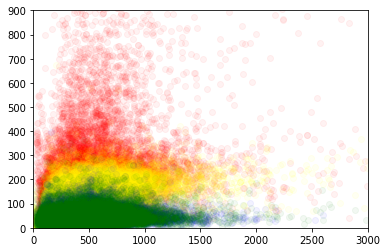

In [68]:
plt.scatter(NOZ.nr_tokens_text[:20000], NOZ.avgTimeOnPage[:20000], alpha =0.05, color = "red")
plt.scatter(bonn.nr_tokens_text[:20000], bonn.avgTimeOnPage[:20000], alpha =0.05, color = "yellow")

plt.scatter(SZ.nr_tokens_text[:20000], SZ.avgTimeOnPage[:20000], alpha =0.05, color = "blue")
plt.scatter(TV.nr_tokens_text[:20000], TV.avgTimeOnPage[:20000], alpha =0.05, color = "green")


plt.xlim(0, 3000)
plt.ylim(0, 900) # nur Aufenthaltsdauern bis 15 Minuten?



print(st.pearsonr(NOZ.nr_tokens_text, NOZ.avgTimeOnPage)) # warum ist hier so viel mehr Korrelation???
print(st.pearsonr(bonn.nr_tokens_text, bonn.avgTimeOnPage))

print(st.pearsonr(SZ.nr_tokens_text, SZ.avgTimeOnPage))
print(st.pearsonr(TV.nr_tokens_text, TV.avgTimeOnPage))


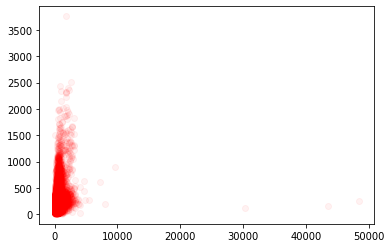

In [54]:
plt.scatter(NOZ.nr_tokens_text, NOZ.avgTimeOnPage, alpha =0.05, color = "red")

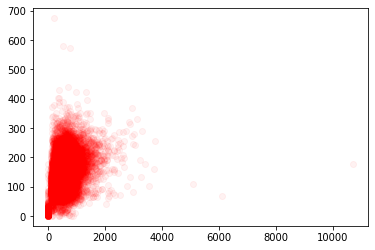

In [57]:
plt.scatter(bonn.nr_tokens_text, bonn.avgTimeOnPage, alpha =0.05, color = "red")

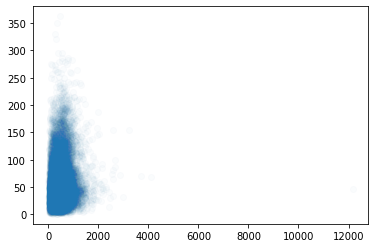

In [55]:
plt.scatter(TV.nr_tokens_text, TV.avgTimeOnPage, alpha =0.02)

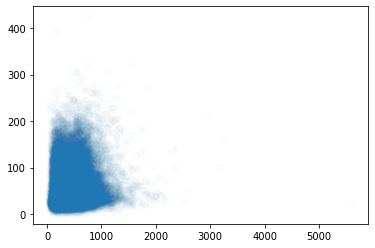

In [56]:
plt.scatter(SZ.nr_tokens_text, SZ.avgTimeOnPage, alpha =0.02)

In [72]:
#plt.scatter(SZ.avgTimeOnPage, SZ.avgTimeOnPagePerWordcount, alpha=0.02)

In [73]:
#plt.scatter(SZ.readTimeNum, SZ.avgTimeOnPage, alpha=0.02)

In [60]:
#plt.scatter(NOZ.nr_tokens_text, NOZ.avgTimeOnPagePerWordcount, alpha=0.02)
#plt.scatter(bonn.nr_tokens_text, bonn.avgTimeOnPagePerWordcount, alpha=0.02)

In [117]:
#SZ.sort_values('pagePath')
#SZ.sort_values('nr_tokens_text')
#NOZ.sort_values('avgTimeOnPage', ascending=False)

for n,ID in enumerate(NOZ.sort_values('avgTimeOnPage', ascending = False).index):
    print(ID)
    print(NOZ.loc[ID, "title"])
    print(NOZ.loc[ID, "titel_html"])
    print(NOZ.loc[ID, "article_text"][:500])
    print(NOZ.loc[ID, "nr_tokens_text"])
    print(NOZ.loc[ID, "avgTimeOnPage"])

    print("----")
    
    if n>10:
        break

406939
ich-war-schon-auf-dem-weg-zur-gaskammer
„Ich war schon auf dem Weg zur Gaskammer“
„Ich war schon auf dem Weg zur Gaskammer“ „Du wirst überleben und erzählen, was man mit uns gemacht hat.“ Mit diesen Worten verabschiedete sich Janette Korn 1943 von ihrer damals 19 Jahre alten Tochter Erna auf der Lagerstraße des Konzentrations- und Vernichtungslagers Auschwitz. „Es war einer der bittersten Momente meines Lebens“, sagt die heute 82-jährige Emsländerin. Ihre Mutter sah sie nie wieder. Dass die heutige Ehrenbürgerin der Gemeinde Lathen als Jüdin die Hölle von Auschwitz überlebte,
1806
3761.3629032258063
----
739925
jorg-thadeusz-schwarzer-anzug-rote-socken
Fiese Fragen an den Moderator: Jörg Thadeusz: Schwarzer Anzug, rote Socken
Fiese Fragen an den Moderator: Jörg Thadeusz: Schwarzer Anzug, rote Socken Berlin. Ein Gespräch mit RBB-Moderator Jörg Thadeusz ist höchst unterhaltsam - nicht nur im Fernsehen, sondern auch auf der Terrasse. Kostproben seines Humors: Es gibt Menschen, die 

In [118]:
SZ[SZ.nr_tokens_text < 50]

,pageviews,exits,entrances,bounces,timeOnPage,category,rubric,titelGA,text,text_ohne_einzug,titel,teaser,readTime,readTimeNum,date,titelAPAcrawling,prozentDpa,prozentVerlag,zeilen,pagePath,dpaGuid,article_text,avgTimeOnPage,nr_tokens_text,avgTimeOnPagePerWordcount,avgTimeOnPage_percentile,pageviews_percentile,avgTimeOnPagePerWordcount_percentile
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17695,352,133,144,4,11608,kultur,sz-kultur,redaktion-kultur,Gutenbergstr. 11 - 2366111 SaarbrückenTel.: (0...,NaN,Redaktion Kultur,Gutenbergstr. 11 - 2366111 SaarbrückenTel.: (0...,Eine Minute,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gutenbergstr. 11 - 23 66111 Saarbrücken Tel.: ...,53.004566,24,2.208524,62.636341,58.558503,99.941125
1183763,4308,1660,1760,55,120492,sz-spezial,internet,sz-app-kostenlos-zum-download,play.google.comitunes.de,NaN,SZ-App kostenlos zum Download,"Mobil über Neuigkeiten informiert zu sein, das...",Eine Minute,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mobil über Neuigkeiten informiert zu sein, das...",45.503021,33,1.378879,54.471368,94.764812,99.581681
1204827,144,54,52,1,3460,nachrichten,politik,bistum-beurlaubt-pfarrer-aus-weiskirchen,>,NaN,Bistum beurlaubt Pfarrer aus Weiskirchen,Trier/Weiskirchen Nach dem Vorwurf des sexuell...,Eine Minute,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trier/Weiskirchen Nach dem Vorwurf des sexuell...,38.444444,44,0.873737,43.688027,23.568418,98.041646
1303081,63,13,13,0,1865,saarland,saar-pfalz-kreis,radsport-david-ames-wird-bei-rennen-in-saargem...,In der Wertung der Juniorenklasse wurde Ames ...,NaN,Radsport: David Ames wird bei Rennen in Saarge...,Homburg Junioren-Radsportler David Ames von de...,Eine Minute,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Homburg Junioren-Radsportler David Ames von de...,37.300000,49,0.761224,41.599529,0.128594,97.310362
1330679,179,82,85,3,3027,politik,themen,schwinn-ist-neuer-buergermeister-von-saarwelli...,Die Wahlbeteiligung in Saarwellingen lag bei ...,NaN,Schwinn ist neuer Bürgermeister von Saarwellingen,Saarwellingen Der 57-jährige SPD-Politiker Man...,Eine Minute,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saarwellingen Der 57-jährige SPD-Politiker Man...,31.206186,40,0.780155,29.288547,34.226264,97.455999
1483208,92,38,36,3,2203,saarland,stwendel,peter-klaer-gewinnt-buergermeisterwahl-von-st-...,Der CDU-Kandidat Peter Klär wird neuer Bürgerm...,NaN,Peter Klär gewinnt Bürgermeisterwahl von St. W...,St. Wendel Der Nachfolger von Klaus Bouillon s...,Eine Minute,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,St. Wendel Der Nachfolger von Klaus Bouillon s...,40.796296,45,0.906584,47.710089,3.960089,98.258552
1557450,135,65,71,4,1846,saarland,saarbruecken,aus-fuer-das-puettlinger-traditions-cafe-kuehnen,Erst Mitte 2013 war das auch damals insolvent...,NaN,Aus für das Püttlinger Traditions-Cafè Kühnen,Püttlingen Das traditionsreiche Café Kühnen sa...,Eine Minute,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Püttlingen Das traditionsreiche Café Kühnen sa...,26.371429,46,0.573292,18.939018,20.336515,95.023550
1803054,135,72,71,1,1275,saarland,NaN,kontakt-und-oeffnungszeiten,Am Kesselwald 3,NaN,Kontakt und Öffnungszeiten,Dressler GmbH,Eine Minute,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dressler GmbH Am Kesselwald 3 66386 St. Ingber...,20.238095,35,0.578231,7.948066,20.336515,95.166088
4824200,109,55,51,2,3403,saarland,merzig-wadern,spende-hilft-bei-kapellen-sanierung,Bis zum 23. Juni ist die Ausstellung sonn- und...,NaN,Miniatur-Ausstellung endet am Sonntag,Theley Siegfried Koch lädt zum Besuch der Mini...,Eine Minute,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Theley Siegfried Koch lädt zum Besuch der Mini...,63.018519,38,1.658382,70.252851,9.863039,99.792390


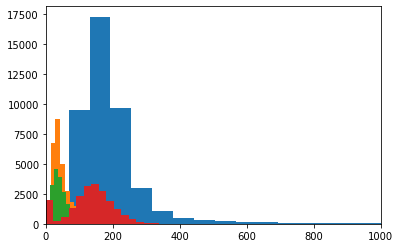

In [69]:
plt.hist(NOZ.avgTimeOnPage, 60)

plt.hist(SZ.avgTimeOnPage, 30)
plt.hist(TV.avgTimeOnPage, 30)
plt.hist(bonn.avgTimeOnPage, 30)



plt.xlim(0,1000)

plt.show()

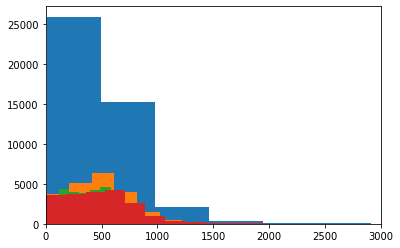

In [70]:
plt.hist(NOZ.nr_tokens_text, 100)
plt.hist(TV.nr_tokens_text, 60)
plt.hist(SZ.nr_tokens_text, 60)
plt.hist(bonn.nr_tokens_text, 60)




plt.xlim(0,3000)

plt.show()

In [122]:
#SZ.category.value_counts()
NOZ.category.value_counts()
#TV.category.value_counts()

lokales                                                                     20930
deutschland-und-welt                                                        10770
sport                                                                        2880
podcast                                                                        78
archiv                                                                         76
angebote                                                                       32
gut-zu-wissen                                                                  10
rubrikenmarkt                                                                   6
fussball                                                                        2
nozkompakt                                                                      2
stadt-osnabrueck                                                                1
leo-award. okales                                                               1
emsland-sued    

In [123]:
tmp = NOZ
#tmp = SZ
#tmp = TV

for c in tmp.category.value_counts().keys()[:8]: # nur die top 8 categories
    print(c)
    print(np.mean(tmp[tmp.category == c].nr_tokens_text))
    print(np.mean(tmp[tmp.category == c].avgTimeOnPage))
    print("---")

lokales
451.73726708074537
180.63031274943936
---
deutschland-und-welt
525.285329619313
223.29924120235714
---
sport
531.7069444444444
197.68451438915233
---
podcast
336.2307692307692
178.50180244956306
---
archiv
487.7105263157895
557.2488049182159
---
angebote
538.53125
193.1237219574177
---
gut-zu-wissen
654.6
189.74016836817654
---
rubrikenmarkt
498.0
338.7614233508824
---


In [25]:
old = pd.read_csv(utils.DATA / 'combined_textCrawling.tsv', sep='\t', index_col = "articleId") # mit dem hier sind die bisherigen gelaufen

In [51]:
old = old[old.txtExists == True]
old.shape

(3141, 66)

In [52]:
old.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,...,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,txtExists,textCrawling,publisher,city,textDpa_preprocessed,textPublisher_preprocessed,nr_tokens_dpa,nr_tokens_publisher,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49310591,151,40,63,29,14266,NaN,162.113636,58.278146,26.490066,19.205298,100,1,91,12,13,3,18,46,news,wirtschaft,ueberregional,2019-ist-erster-jahrgang-ohne-eiswein-in-deuts...,https://www.general-anzeiger-bonn.de/news/wirt...,200228-99-121639,24,30,10,dpacat:wi,2020-03-01 06:05:03,NaN,...,NaN,NaN,"dpasrv:bid__,__dpasrv:bdt",Agrar,Branchen,medtop:20000210,Vergeblich haben die Winzer in Deutschland auf...,Bodenheim (dpa/lrs) - Kein einziger Winzer in ...,Erster Jahrgang ohne Eiswein im Keller,NaN,4,NaN,461,wi,0,NewsML-G2,2020-04-21 19:33:11,1,ja,True,"""Aufgrund des milden Winters wurde in keinem d...",bonn,Bodenheim,Kein einziger Winzer in Deutschland hat in die...,"""Aufgrund des milden Winters wurde in keinem d...",463,197,0.822912,6.754735,88
49313841,1230,163,479,91,164408,NaN,218.918775,61.056911,13.252033,7.398374,100,1,524,31,15,2,19,67,ratgeber,fit-und-gesund,NaN,coronavirus-fordert-weltweit-mehr-als-3000-opf...,https://www.general-anzeiger-bonn.de/ratgeber/...,200302-99-147487,78,99,83,dpacat:vm,2020-03-02 04:15:04,NaN,...,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Wissenschaft__,__Krankheit__,__Gesundheit","Wissenschaft, Technik, Forschung__,__Krankheit...","dpasubject:106__,__medtop:20000446__,__dpasubj...",Während die Zahl der neuen Erkrankungen in Chi...,Peking/Berlin (dpa) - Die Zahl der Todesopfer ...,Coronavirus fordert weltweit mehr als 3000 Opfer,NaN,3,NaN,644,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,Schulschließungen und die Absage bestimmter Ve...,bonn,Peking/Berlin,Die Zahl der Todesopfer durch die Lungenkrankh...,Schulschließungen und die Absage bestimmter Ve...,662,1034,0.211720,2.806651,751
49315763,5387,2773,3047,1658,350596,NaN,149.827350,43.437906,51.475775,30.777798,100,1,1703,41,13,5,15,74,news,panorama,NaN,dicke-eisschicht-bedeckt-haeuser-in-hamburg-na...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-149319,17,96,51,dpacat:vm,2020-03-02 10:46:36,NaN,...,"CNN-Beitrag, Englisch__,__Bericht bei Fox News...",NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Wetter__,__Unwetter","Vermischtes__,__vm__,__Naturkatastrophe","medtop:17000000__,__medtop:20000157",NaN,Buffalo (dpa) - Tagelang wirbelte heftiger Win...,Szenen wie aus einem Märchen: Dicke Eisschicht...,NaN,4,NaN,209,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,Eine bis zu 90 Zentimeter dicke Eisschicht bed...,bonn,Buffalo,Tagelang wirbelte heftiger Wind das Wasser des...,Eine bis zu 90 Zentimeter dicke Eisschicht bed...,213,166,0.902574,8.813374,2340
49318053,4339,3089,2997,2317,255559,NaN,190.431446,30.928785,71.191519,53.399401,100,1,1668,39,14,13,13,79,news,panorama,NaN,polizei-ermittelt-nach-vermutetem-diebstahl-vo...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153809,15,100,54,dpacat:vm,2020-03-02 12:54:36,NaN,...,NaN,NaN,"dpasrv:bdt__,__dpasrv:bid","Krankheit__,__Gesundheit__,__Wissenschaft__,__...","Krankheit__,__Medizin, Gesundheit__,__Wissensc...","medtop:20000446__,__dpasubject:346__,__dpasubj...",NaN,Diepholz (dpa) - Die Polizei geht einem mutmaß...,Polizei ermittelt nach vermutetem Diebstahl vo...,NaN,4,NaN,107,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,Als Tatzeit werde Mittwoch oder Donnerstag ver...,bonn,Diepholz,Die Polizei g

In [53]:
SZ_old = old[old.publisher == "SZ"]
print(SZ_old.shape)
TV_old = old[old.publisher == "TV"]
print(TV_old.shape)

(676, 66)
(189, 66)


In [54]:
print(SZ.shape)
print(TV.shape)

(32272, 25)
(21484, 25)


In [55]:
print(len(set(SZ.index).intersection(set(SZ_old.index))))
print(len(set(TV.index).intersection(set(TV_old.index))))

676
174


In [59]:
SZ_old.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,...,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,txtExists,textCrawling,publisher,city,textDpa_preprocessed,textPublisher_preprocessed,nr_tokens_dpa,nr_tokens_publisher,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49204663,1087521,522197,552468,122389,45605960,NaN,85.236341,49.199326,48.017188,11.253944,100,1,220789,50,10,4,16,80,saarland,saarbruecken,NaN,sz-liveblog-alle-entwicklungen-zum-coronavirus...,https://www.saarbruecker-zeitung.de/saarland/s...,200301-99-140111,23,26,26,dpacat:vm,2020-03-01 11:31:31,NaN,...,RKI-Mitteilung,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Wissenschaft__,__Gesundheit__,__Krankheit","Wissenschaft, Technik, Forschung__,__Medizin, ...","dpasubject:106__,__dpasubject:346__,__medtop:2...",NaN,Berlin (dpa) - Bis Sonntagvormittag sind in De...,RKI: 117 Coronavirus-Nachweise in Deutschland,NaN,4,NaN,120,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,Die aktuellen Corona-Zahlen im Saarland: Lokal...,SZ,Berlin,Bis Sonntagvormittag sind in Deutschland nach ...,Die aktuellen Corona-Zahlen im Saarland: Lokal...,117,46,1.852964,3.705928,535053
49310799,1515,957,947,42,24578,NaN,43.271127,37.491749,63.168317,2.772277,100,1,609,32,7,10,14,63,saarland,blickzumnachbarn,NaN,trend-unter-bierbrauereien-bitburger-bringt-gl...,https://www.saarbruecker-zeitung.de/saarland/b...,200225-99-62718,77,99,76,dpacat:wi,2020-03-02 06:30:01,NaN,...,Verbraucherzentrale zu Markt der glutenfreien ...,NaN,"dpasrv:bid__,__dpasrv:bdt__,__dpasrv:rhs",Getränke,Konsumgüter,medtop:20000244,Gesundheitlich notwendig oder einfach nur tren...,Bitburg (dpa) - Lady Gaga tut es. Miley Cyrus ...,Nische mit Potenzial? Brauer setzen auf gluten...,NaN,4,NaN,670,wi,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,„Immer mehr Menschen müssen oder wollen in ihr...,SZ,Bitburg,Lady Gaga tut es. Miley Cyrus und Gwyneth Palt...,„Immer mehr Menschen müssen oder wollen in ihr...,685,615,0.070360,0.561963,568
49330855,140,78,74,0,3460,NaN,52.424242,47.142857,55.714286,0.000000,100,1,71,11,8,7,16,42,nachrichten,politik,inland,nachfolger-von-kardinal-marx-gesucht-offenes-r...,https://www.saarbruecker-zeitung.de/nachrichte...,200302-99-158217,19,84,20,dpacat:pl,2020-03-02 16:38:25,NaN,...,NaN,NaN,"dpasrv:bdt__,__dpasrv:bid",Kirche,"Religion, Weltanschauung__,__Religiöse Bauwerke",medtop:20000698,Die Deutsche Bischofskonferenz hat sich in Mai...,Mainz (dpa) - Die katholische Kirche will auch...,Kardinal Marx sieht Reformprozess der Kirche a...,NaN,4,NaN,489,pl,0,NewsML-G2,2020-04-21 19:33:11,1,ja,True,Als weitgehend offen gilt am Dienstag die Wahl...,SZ,Mainz,Die katholische Kirche will auch unter einem n...,Als weitgehend offen gilt am Dienstag die Wahl...,516,116,0.451933,2.759171,66
49331305,146,78,80,9,2712,NaN,41.090909,45.205479,53.424658,6.164384,100,1,82,12,7,6,16,41,nachrichten,panorama,NaN,aegyptens-hauptstadt-auto-hupen-als-geheimspra...,https://www.saarbruecker-zeitung.de/nachrichte...,200301-99-144607,60,84,58,dpacat:vm,2020-03-02 06:30:41,NaN,...,"Video Polizei Mumbai__,__Bericht India Today__...",NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Automobilindustrie__,__Verkehr__,__Gesellschaf...","Metall- und Technische Industrie__,__Wirtschaf...","medtop:20000296__,__dpasubject:232__,__medtop:...",Zu Stoßzeiten ist in Kairos Verkehr gefühlt al...,Kairo (dpa) - Wer im deutschen Autoverkehr auf...,«Ich liebe dich» bis «Fuck you»: Hupen als Geh...,NaN,4,NaN,591,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,T

In [81]:
SZ_old.loc[49331589].avgTimeOnPage

124.474747474747

In [82]:
SZ.loc[49331589].avgTimeOnPage

124.47474747474749

In [85]:
for nr, ID in enumerate(TV_old.index):
    if ID not in TV.index:
        print(ID)
        #print(TV_old.loc[ID, "txtExists"])
        print(TV_old.loc[ID, "pageviews"])


# irgendwie sind diese paar IDs aus dem alten TV-Datensatz nicht im neuen, aber das kann man vielleicht ignorieren

52709335
1271
52718965
873
52758789
2747
52780311
251
52845041
409
52845471
677
53060437
2108
53262105
1752
53265177
541
53280865
1695
53372529
1231
53423209
680
53463191
5830
53492217
116
53493347
537


In [58]:
TV_old.loc[52709335].textCrawling

'Durch die Schließung der Kinos Mitte März und die nur zögerliche Wiedereröffnung seit Mitte Mai verzeichneten alle Kinobetreiber massive Umsatzeinbrüche und befänden sich in einer teils dramatischen Liquiditätssituation. „Zahlreiche mittelständische und familiengeführte Filmtheaterunternehmen sehen deshalb ihr Lebenswerk bedroht“, hieß es weiter. In einem offenen Brief an Kulturstaatsministerin Monika Grütters (CDU) fordern sie deshalb wirtschaftliche Hilfen sowie einen Kinogipfel. „Ohne die Unterstützung der Bundesregierung wird es in Deutschland bald keine Filme, keine Besucher und keine Kinos mehr geben“, heißt es in dem Schreiben. Viele Arbeitsplätze seien bedroht. Zudem seien die Folgen für das kulturelle Leben und die Belebung der Innenstädte irreversibel.  In Bitburg klafft diese Lücke im kulturellen Leben der Eifelstadt jetzt schon. Der Brief wurde von 68 Unternehmen unterzeichnet, die nach eigenen Angaben deutschlandweit für rund 1300 Leinwände stehen und damit einen Marktant

In [ ]:
## was ab hier kommt ist nicht mehr wichtig, siehe das Notebook crawling_parsing_html

In [121]:
import requests
from bs4 import BeautifulSoup

In [140]:
root_url = 'https://www.saarbruecker-zeitung.de/'
#ID = 50253669
#ID = 50104385
#ID = 52889133
ID = 48382763
url = root_url + str(ID)
print(url)

https://www.saarbruecker-zeitung.de/48382763


In [141]:
r = requests.get(url)
data = r.text
soup = BeautifulSoup(data, 'html.parser')

In [142]:
#soup

In [143]:
#soup.p

In [144]:
trial = soup.find_all("p",{'class':['park-article__intro park-article__content', 'text', 'text_ohne_einzug']}) #, 'class':'text_ohne_einzug'})


In [145]:
trial

[<p class="park-article__intro park-article__content">
 <em class="park-article__dateline">Saarbrücken</em>      Höchststand von 36 Verstorbenen im vergangenen Jahr. Land will Hilfe und Vorbeugung verbessern.
     </p>,
 <p class="text_ohne_einzug"> Angesichts der Rekordzahl von 36 Drogentoten im vergangenen Jahr im Saarland will das Saarland seine Hilfs- und Präventionsmaßnahmen für Drogenabhängige verstärken. Mittlerweile seien auch immer mehr ältere Menschen betroffen. Das hat der Landesdrogenbeauftragte, Gesundheitsstaatsekretär Stephan Kolling (CDU), am Donnerstag nach einer Sondersitzung des im Dezember neu gebildeten Expertenbeirats Drogen angekündigt. So sollen in Saarbrücken künftig mehr „Streetworker“ eingesetzt werden, um Konsumenten frühzeitig zu erkennen. Auch in den Landkreisen würden die Bemühungen zur Suchthilfe intensiviert, hieß es. Insgesamt will das Land laut Kolling seinen Etat für die Sucht- und Drogenvorbeugung in diesem Jahr um 200 000 auf 1,5 Millionen Euro auf

In [146]:
ps = soup.find_all('p')
# print the content of all <p> tags
for p in ps:
    #print(p)
    print("------------")
    #print(p.name)
    print(p.text)
    #print(p.tag)

------------

Saarbrücken      Höchststand von 36 Verstorbenen im vergangenen Jahr. Land will Hilfe und Vorbeugung verbessern.
    
------------
Von Udo Lorenz
------------
 Angesichts der Rekordzahl von 36 Drogentoten im vergangenen Jahr im Saarland will das Saarland seine Hilfs- und Präventionsmaßnahmen für Drogenabhängige verstärken. Mittlerweile seien auch immer mehr ältere Menschen betroffen. Das hat der Landesdrogenbeauftragte, Gesundheitsstaatsekretär Stephan Kolling (CDU), am Donnerstag nach einer Sondersitzung des im Dezember neu gebildeten Expertenbeirats Drogen angekündigt. So sollen in Saarbrücken künftig mehr „Streetworker“ eingesetzt werden, um Konsumenten frühzeitig zu erkennen. Auch in den Landkreisen würden die Bemühungen zur Suchthilfe intensiviert, hieß es. Insgesamt will das Land laut Kolling seinen Etat für die Sucht- und Drogenvorbeugung in diesem Jahr um 200 000 auf 1,5 Millionen Euro aufstocken, plus 90 000 Euro für zwei dem Drogenhilfezentrum in der Saarbrücker

In [147]:
text_content = '\n'.join(item.text for item in trial)

In [148]:
print(text_content)


Saarbrücken      Höchststand von 36 Verstorbenen im vergangenen Jahr. Land will Hilfe und Vorbeugung verbessern.
    
 Angesichts der Rekordzahl von 36 Drogentoten im vergangenen Jahr im Saarland will das Saarland seine Hilfs- und Präventionsmaßnahmen für Drogenabhängige verstärken. Mittlerweile seien auch immer mehr ältere Menschen betroffen. Das hat der Landesdrogenbeauftragte, Gesundheitsstaatsekretär Stephan Kolling (CDU), am Donnerstag nach einer Sondersitzung des im Dezember neu gebildeten Expertenbeirats Drogen angekündigt. So sollen in Saarbrücken künftig mehr „Streetworker“ eingesetzt werden, um Konsumenten frühzeitig zu erkennen. Auch in den Landkreisen würden die Bemühungen zur Suchthilfe intensiviert, hieß es. Insgesamt will das Land laut Kolling seinen Etat für die Sucht- und Drogenvorbeugung in diesem Jahr um 200 000 auf 1,5 Millionen Euro aufstocken, plus 90 000 Euro für zwei dem Drogenhilfezentrum in der Saarbrücker Brauerstraße angegliederte Sozialarbeiter („Streetwor

In [152]:
text_content = text_content.replace("\n", " ")

In [153]:
print(text_content)

 Saarbrücken      Höchststand von 36 Verstorbenen im vergangenen Jahr. Land will Hilfe und Vorbeugung verbessern.       Angesichts der Rekordzahl von 36 Drogentoten im vergangenen Jahr im Saarland will das Saarland seine Hilfs- und Präventionsmaßnahmen für Drogenabhängige verstärken. Mittlerweile seien auch immer mehr ältere Menschen betroffen. Das hat der Landesdrogenbeauftragte, Gesundheitsstaatsekretär Stephan Kolling (CDU), am Donnerstag nach einer Sondersitzung des im Dezember neu gebildeten Expertenbeirats Drogen angekündigt. So sollen in Saarbrücken künftig mehr „Streetworker“ eingesetzt werden, um Konsumenten frühzeitig zu erkennen. Auch in den Landkreisen würden die Bemühungen zur Suchthilfe intensiviert, hieß es. Insgesamt will das Land laut Kolling seinen Etat für die Sucht- und Drogenvorbeugung in diesem Jahr um 200 000 auf 1,5 Millionen Euro aufstocken, plus 90 000 Euro für zwei dem Drogenhilfezentrum in der Saarbrücker Brauerstraße angegliederte Sozialarbeiter („Streetwor